In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo 

from skglm.datafits import Huber
from skglm.penalties import MCPenalty, SCAD
from skglm.solvers import AndersonCD

from sklearn.metrics import accuracy_score

## aesthetic evaluation dataset

#### load dataset

In [27]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']

# get data from author = eduard.bonci
aesthetic_evaluation_data_eduard = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'eduard.bonci']
aesthetic_evaluation_data_eduard_objective = aesthetic_evaluation_data_eduard['Objective Evaluation']
aesthetic_evaluation_data_eduard = aesthetic_evaluation_data_eduard.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_eduard_X = aesthetic_evaluation_data_eduard.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_eduard_y = aesthetic_evaluation_data_eduard['Subjective Evaluation']

# get data from author = cmavioso
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'cmavioso']
aesthetic_evaluation_data_cmavioso_objective = aesthetic_evaluation_data_cmavioso['Objective Evaluation']
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data_cmavioso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_cmavioso_X = aesthetic_evaluation_data_cmavioso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_cmavioso_y = aesthetic_evaluation_data_cmavioso['Subjective Evaluation']

# get data from author = mariajoaocardoso
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'mariajoaocardoso']
aesthetic_evaluation_data_mariajoaocardoso_objective = aesthetic_evaluation_data_mariajoaocardoso['Objective Evaluation']
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data_mariajoaocardoso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_mariajoaocardoso_X = aesthetic_evaluation_data_mariajoaocardoso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_mariajoaocardoso_y = aesthetic_evaluation_data_mariajoaocardoso['Subjective Evaluation']

# get all data
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [28]:
# number of observations
print(f"Number of observations: {len(aesthetic_evaluation_data)}")

# number of features
print(f"Number of features: {len(aesthetic_evaluation_data.columns)}")

# num of of obs for eduard.bonci
print(f"Number of observations for eduard.bonci: {len(aesthetic_evaluation_data_eduard)}")

# num of of obs for cmavioso
print(f"Number of observations for cmavioso: {len(aesthetic_evaluation_data_cmavioso)}")

# num of of obs for mariajoaocardoso
print(f"Number of observations for mariajoaocardoso: {len(aesthetic_evaluation_data_mariajoaocardoso)}")

Number of observations: 1358
Number of features: 23
Number of observations for eduard.bonci: 494
Number of observations for cmavioso: 237
Number of observations for mariajoaocardoso: 627


In [29]:
# distribution of the target variable
print(aesthetic_evaluation_y.value_counts())

# for eduard.bonci
print("\neduard.bonci target variable distribution:  ", aesthetic_evaluation_data_eduard_y.value_counts())

# for cmavioso
print("\ncmavioso target variable distribution:  ", aesthetic_evaluation_data_cmavioso_y.value_counts())

# for mariajoaocardoso
print("\nmariajoaocardoso target variable distribution:  ", aesthetic_evaluation_data_mariajoaocardoso_y.value_counts())

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

eduard.bonci target variable distribution:   Subjective Evaluation
Good         231
Fair         135
Excellent    106
Poor          22
Name: count, dtype: int64

cmavioso target variable distribution:   Subjective Evaluation
Good         108
Excellent     81
Fair          36
Poor          12
Name: count, dtype: int64

mariajoaocardoso target variable distribution:   Subjective Evaluation
Good         256
Fair         182
Excellent    121
Poor          68
Name: count, dtype: int64


In [30]:
# show proportion of each class
aesthetic_evaluation_y.value_counts(normalize=True)

Subjective Evaluation
Good         0.438144
Fair         0.259941
Excellent    0.226804
Poor         0.075110
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Distribution of Subjective Evaluation')

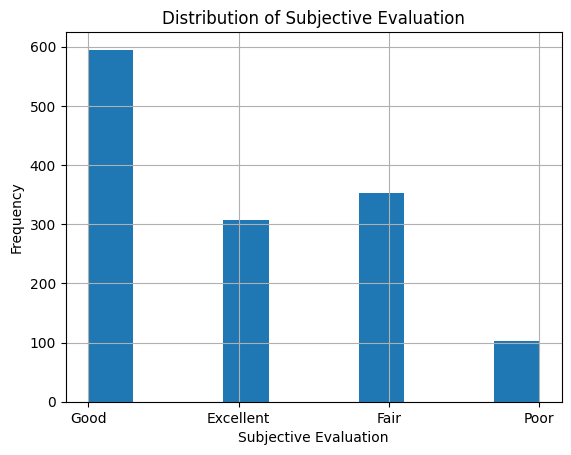

In [31]:
aesthetic_evaluation_y.hist()
plt.xlabel('Subjective Evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Subjective Evaluation')

In [32]:
# accuracy of 'objective evaluation' relative to target
acc = accuracy_score(aesthetic_evaluation_y, aesthetic_evaluation_objective)
print(f'Accuracy of objective evaluation: {acc}')

# accuracy of 'objective evaluation' relative to target for eduard.bonci
acc_eduard = accuracy_score(aesthetic_evaluation_data_eduard_y, aesthetic_evaluation_data_eduard_objective)
print(f'Accuracy of objective evaluation for eduard.bonci: {acc_eduard}')   

# accuracy of 'objective evaluation' relative to target for cmavioso
acc_cmavioso = accuracy_score(aesthetic_evaluation_data_cmavioso_y, aesthetic_evaluation_data_cmavioso_objective)
print(f'Accuracy of objective evaluation for cmavioso: {acc_cmavioso}') 

# accuracy of 'objective evaluation' relative to target for mariajoaocardoso
acc_mariajoaocardoso = accuracy_score(aesthetic_evaluation_data_mariajoaocardoso_y, aesthetic_evaluation_data_mariajoaocardoso_objective)
print(f'Accuracy of objective evaluation for mariajoaocardoso: {acc_mariajoaocardoso}') 


Accuracy of objective evaluation: 0.5876288659793815
Accuracy of objective evaluation for eduard.bonci: 0.5404858299595142
Accuracy of objective evaluation for cmavioso: 0.679324894514768
Accuracy of objective evaluation for mariajoaocardoso: 0.5901116427432217


In [33]:
# get categorical columns
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")

# do a mapping for the ordinal target variable
mapping = {4: 'Poor', 3: 'Fair', 2: 'Good', 1: 'Excellent'}

K = 4  # number of classes

Categorical columns: []


### all features

#### CAIM & 1ook

Execution time: 17.468174934387207 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 ... 0 0 0]
     True Value  Prediction
0             3           3
1             3           3
2             1           2
3             2           3
4             2           2
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           2
339           1           1

[340 rows x 2 columns]
accuracy:  0.5558823529411765
precision:  0.5706203913046952
recall:  0.5558823529411765
f1 score:  0.5441157580506667
balanced accuracy:  0.4815597582750344
logistic loss:  0.0521921852784083
mse:  0.46176470588235297
number of far off predictions:  13
number of features:  112
number of non-zero weights:  70
model size (non-zero weights / all weights):  0.625


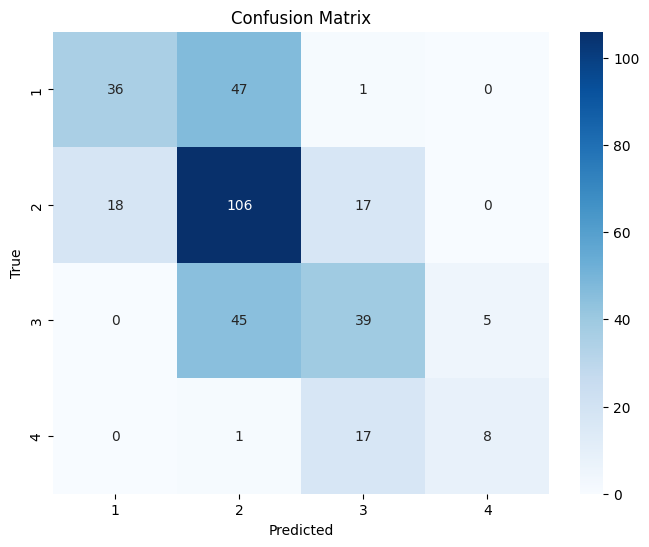

accuracy for class 1: 0.429
accuracy for class 2: 0.752
accuracy for class 3: 0.438
accuracy for class 4: 0.308

Evaluating the model on the train set...
accuracy on train set:  0.6444007858546169
precision on train set:  0.6555894206872255
recall on train set:  0.6444007858546169
f1 score on train set:  0.6344230979549299
balanced accuracy on train set:  0.6058267100972294
logistic loss on train set:  0.04236249119767979
mse on train set:  0.4037328094302554

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value    [0.601883875460406, 3.997025532141979[ -0.162955
1       BRA Value    [3.997025532141979, 5.918237298308635[  0.115207
2       BRA Value   [5.918237298308635, 24.075530326533293[ -0.030238
3       LBC Value  [0.0004087089954772, 0.4172018007463239[ -0.775422
4       LBC Value   [0.4172018007463239, 2.079932905328359[ -0.097873
..            ...                                       ...       ...
63    cEMDb Value  [0.689876

In [34]:
start_time = time.time()

scorecard = Scorecard()
alpha = 0.99
aesthetic_caim_1ook_ml_model, aesthetic_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params={'C': 1/alpha, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 17.64057207107544 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 ... 0 0 0]
     True Value  Prediction
0             3           3
1             3           3
2             1           2
3             2           3
4             2           2
..          ...         ...
335           2           3
336           2           2
337           1           2
338           1           2
339           1           1

[340 rows x 2 columns]
accuracy:  0.538235294117647
precision:  0.5520544389687392
recall:  0.538235294117647
f1 score:  0.5331786200033817
balanced accuracy:  0.4830747535594535
logistic loss:  0.05345496248540939
mse:  0.4970588235294118
number of far off predictions:  15
number of features:  112
number of non-zero weights:  107
model size (non-zero weights / all weights):  0.9553571428571429


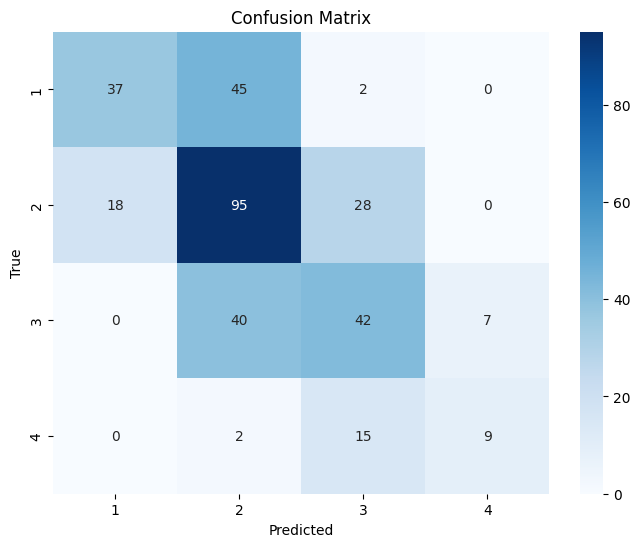

accuracy for class 1: 0.440
accuracy for class 2: 0.674
accuracy for class 3: 0.472
accuracy for class 4: 0.346

Evaluating the model on the train set...
accuracy on train set:  0.6453831041257367
precision on train set:  0.6513495395607495
recall on train set:  0.6453831041257367
f1 score on train set:  0.6388618747894947
balanced accuracy on train set:  0.6139601309164983
logistic loss on train set:  0.044527271654624105
mse on train set:  0.41453831041257366

Scorecard table:
           Feature                                       Bin    Points
0        BRA Value   [0.1623383287101974, 0.601883875460406[ -0.086358
1        BRA Value    [0.601883875460406, 3.997025532141979[ -0.033819
2        BRA Value    [3.997025532141979, 5.918237298308635[ -0.033305
3        BRA Value   [5.918237298308635, 24.075530326533293[ -0.131790
4        BRA Value                 [24.075530326533293, inf[  0.285271
..             ...                                       ...       ...
100  cEMDLab Value 

In [35]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_mm_model, aesthetic_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params={'C': 4},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

ola
Execution time: 17.00382900238037 seconds

Evaluating the model on the test set...
test predictions:  [ 1.09654627  0.65049591  0.39082583 ...  0.58356676  0.1375164
 -0.12215368]
     True Value  Prediction
0             3           3
1             3           3
2             1           2
3             2           2
4             2           2
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           2
339           1           2

[340 rows x 2 columns]
accuracy:  0.5
precision:  0.40258169934640525
recall:  0.5
f1 score:  0.40155106818846953
balanced accuracy:  0.3853210798286103
logistic loss:  0.035343903097749305
mse:  0.5705882352941176
number of far off predictions:  11
number of features:  112
number of non-zero weights:  9
model size (non-zero weights / all weights):  0.08035714285714286


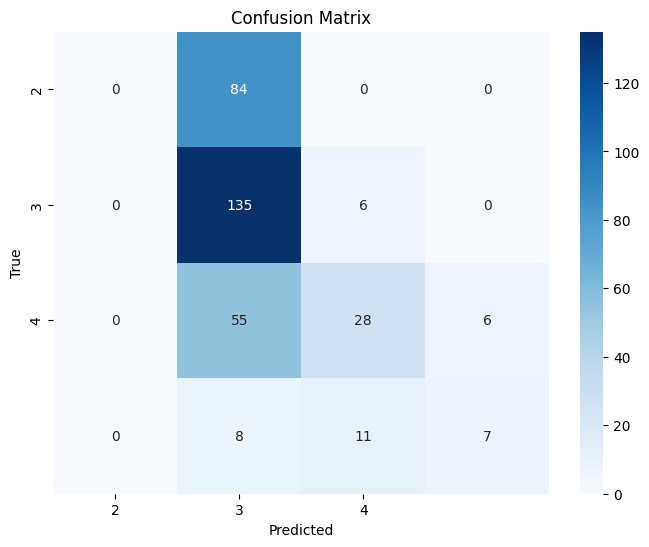

accuracy for class 1: 0.000
accuracy for class 2: 0.957
accuracy for class 3: 0.315
accuracy for class 4: 0.269

Evaluating the model on the train set...
accuracy on train set:  0.5412573673870335
precision on train set:  0.43536337134362163
recall on train set:  0.5412573673870335
f1 score on train set:  0.4536669540369532
balanced accuracy on train set:  0.412307927407626
logistic loss on train set:  0.032546846928676966
mse on train set:  0.49410609037328096

Scorecard table:
      Feature                                       Bin    Points
0   LBC Value  [0.0004087089954772, 0.4172018007463239[ -0.144808
1   BCE Value    [0.002408900783522, 1.786720539932413[ -0.170268
2   BCD Value    [3.502484549081236, 7.274922745301265[  0.131313
3   BCD Value   [7.274922745301265, 28.071833628579306[  0.346518
4  pLBC Value   [0.0754687169258525, 0.162537795701451[  0.136684
5  pUNR Value  [0.0039560541289312, 0.1208068027695054[ -0.100174
6  pBOD Value  [0.1100602840161415, 0.3284043688800893

In [36]:
start_time = time.time()

huber = Huber(delta=1.0)
mcp_penalty = MCPenalty(alpha=1e-2, gamma=3)
anderson_cd = AndersonCD()

scorecard = Scorecard()
aesthetic_caim_1ook_beyondl1_model, aesthetic_caim_1ook_beyondl1_weights = scorecard.fit(
    aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
    thresholds_method='CAIM',
    encoding_method='1_OUT_OF_K',
    model_method='BEYOND_L1',
    params={'datafit': huber, 'penalty': mcp_penalty, 'solver': anderson_cd},
    use_sbc=True,
    K=K,
    mapping=mapping
)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 17.841622829437256 seconds

Evaluating the model on the test set...
test predictions:  [ 1.13131808  0.68534559  0.42601356 ...  0.52728568  0.08131319
 -0.17801884]
     True Value  Prediction
0             3           3
1             3           2
2             1           2
3             2           3
4             2           2
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           2
339           1           2

[340 rows x 2 columns]
accuracy:  0.5176470588235295
precision:  0.5765589315574138
recall:  0.5176470588235295
f1 score:  0.45912098292882186
balanced accuracy:  0.4112658050770649
logistic loss:  0.03577641213761625
mse:  0.5529411764705883
number of far off predictions:  10
number of features:  112
number of non-zero weights:  112
model size (non-zero weights / all weights):  1.0


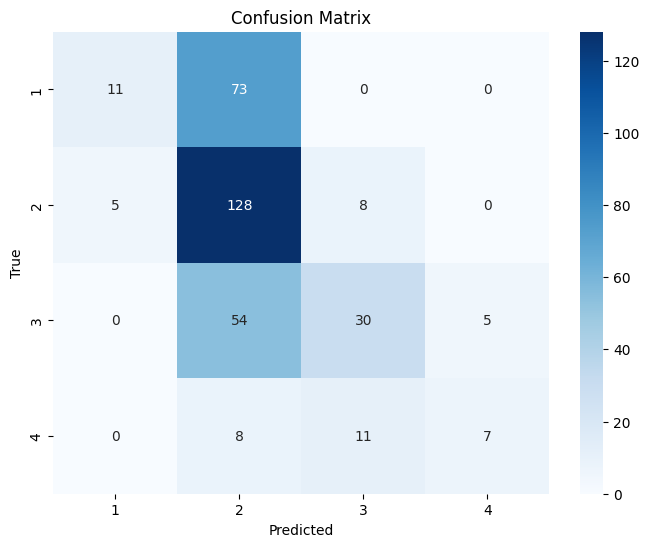

accuracy for class 1: 0.131
accuracy for class 2: 0.908
accuracy for class 3: 0.337
accuracy for class 4: 0.269

Evaluating the model on the train set...
accuracy on train set:  0.600196463654224
precision on train set:  0.6634797039919417
recall on train set:  0.600196463654224
f1 score on train set:  0.5475202996085817
balanced accuracy on train set:  0.5275694476855937
logistic loss on train set:  0.0363949382779289
mse on train set:  0.4292730844793713

Scorecard table:
           Feature                                       Bin    Points
0        BRA Value   [0.1623383287101974, 0.601883875460406[  0.066681
1        BRA Value    [0.601883875460406, 3.997025532141979[  0.020924
2        BRA Value    [3.997025532141979, 5.918237298308635[  0.043652
3        BRA Value   [5.918237298308635, 24.075530326533293[  0.016601
4        BRA Value                 [24.075530326533293, inf[  0.086160
..             ...                                       ...       ...
105  cEMDLab Value  [0.0

In [37]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_adaptivelasso_model, aesthetic_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params={'alpha': 1e-10},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

Execution time: 17.19550609588623 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 ... 0 0 0]
     True Value  Prediction
0             3           3
1             3           3
2             1           2
3             2           3
4             2           2
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           2
339           1           1

[340 rows x 2 columns]
accuracy:  0.5558823529411765
precision:  0.5708061842334542
recall:  0.5558823529411765
f1 score:  0.5436649063521551
balanced accuracy:  0.48716301329557365
logistic loss:  0.05508081190672792
mse:  0.47058823529411764
number of far off predictions:  14
number of features:  112
number of non-zero weights:  95
model size (non-zero weights / all weights):  0.8482142857142857


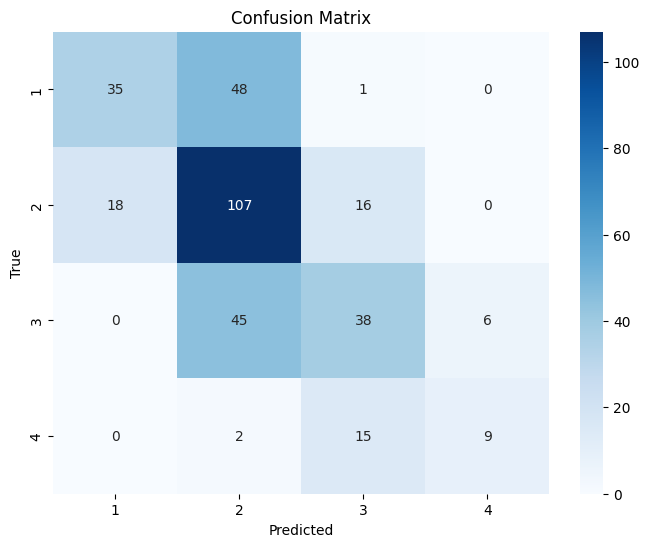

accuracy for class 1: 0.417
accuracy for class 2: 0.759
accuracy for class 3: 0.427
accuracy for class 4: 0.346

Evaluating the model on the train set...
accuracy on train set:  0.6463654223968566
precision on train set:  0.6596185622623645
recall on train set:  0.6463654223968566
f1 score on train set:  0.636147087722079
balanced accuracy on train set:  0.6065317227791144
logistic loss on train set:  0.04210395562183503
mse on train set:  0.40471512770137524

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value   [0.1623383287101974, 0.601883875460406[ -0.040864
1       BRA Value    [0.601883875460406, 3.997025532141979[ -0.171164
2       BRA Value    [3.997025532141979, 5.918237298308635[  0.222503
3       BRA Value   [5.918237298308635, 24.075530326533293[ -0.176140
4       LBC Value  [0.0004087089954772, 0.4172018007463239[ -0.040864
..            ...                                       ...       ...
88  cEMDLab Value  [0.001195

In [39]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_ml_model, aesthetic_caim_diffcod_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1/0.99, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 18.18358087539673 seconds

Evaluating the model on the test set...
test predictions:  [1 1 1 ... 0 0 0]
     True Value  Prediction
0             3           4
1             3           3
2             1           2
3             2           3
4             2           2
..          ...         ...
335           2           3
336           2           2
337           1           2
338           1           2
339           1           1

[340 rows x 2 columns]
accuracy:  0.5441176470588235
precision:  0.5558469773462115
recall:  0.5441176470588235
f1 score:  0.5382193781116749
balanced accuracy:  0.4866208528502337
logistic loss:  0.05345496248540939
mse:  0.49117647058823527
number of far off predictions:  15
number of features:  112
number of non-zero weights:  107
model size (non-zero weights / all weights):  0.9553571428571429


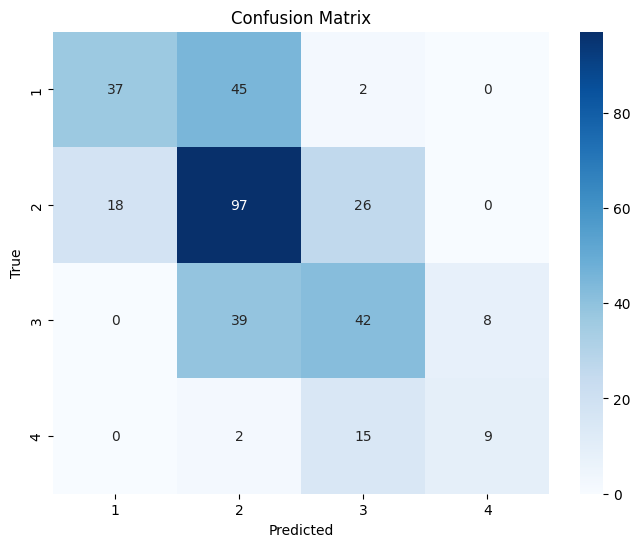

accuracy for class 1: 0.440
accuracy for class 2: 0.688
accuracy for class 3: 0.472
accuracy for class 4: 0.346

Evaluating the model on the train set...
accuracy on train set:  0.6493123772102161
precision on train set:  0.6569556783849693
recall on train set:  0.6493123772102161
f1 score on train set:  0.6427417022713698
balanced accuracy on train set:  0.6161627740883044
logistic loss on train set:  0.04484126380284447
mse on train set:  0.4106090373280943

Scorecard table:
           Feature                                       Bin        Points
0        BRA Value   [0.1623383287101974, 0.601883875460406[  3.672618e-13
1        BRA Value    [0.601883875460406, 3.997025532141979[  5.898835e-02
2        BRA Value    [3.997025532141979, 5.918237298308635[ -3.526965e-05
3        BRA Value   [5.918237298308635, 24.075530326533293[ -9.164284e-02
4        BRA Value                 [24.075530326533293, inf[  2.505760e-01
..             ...                                       ...        

In [40]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_mm_model, aesthetic_caim_diffcod_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 4},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

ola
Execution time: 18.428040027618408 seconds

Evaluating the model on the test set...
test predictions:  [ 1.18070127  0.73470846  0.47496465 ...  0.61254142  0.16654861
 -0.0931952 ]
     True Value  Prediction
0             3           3
1             3           3
2             1           2
3             2           2
4             2           2
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           2
339           1           2

[340 rows x 2 columns]
accuracy:  0.47352941176470587
precision:  0.3605222950424189
recall:  0.47352941176470587
f1 score:  0.38288061762935155
balanced accuracy:  0.3567867804360752
logistic loss:  0.03701125153272032
mse:  0.5882352941176471
number of far off predictions:  10
number of features:  112
number of non-zero weights:  9
model size (non-zero weights / all weights):  0.08035714285714286


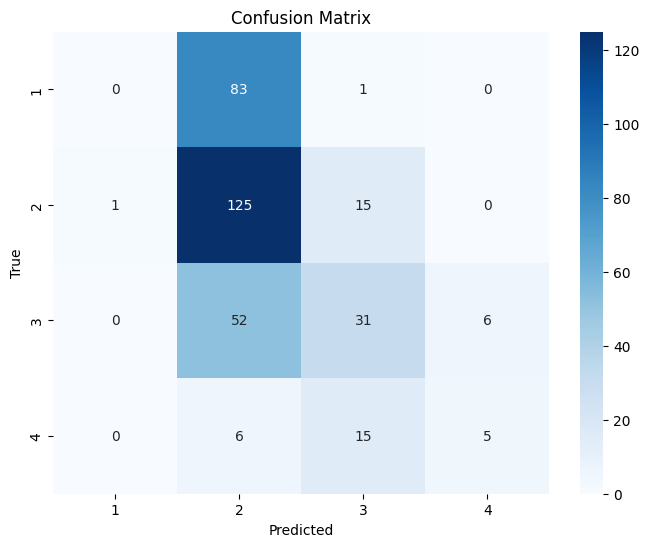

accuracy for class 1: 0.000
accuracy for class 2: 0.887
accuracy for class 3: 0.348
accuracy for class 4: 0.192

Evaluating the model on the train set...
accuracy on train set:  0.550098231827112
precision on train set:  0.44386555062072697
recall on train set:  0.550098231827112
f1 score on train set:  0.4650514255518566
balanced accuracy on train set:  0.41423480105951704
logistic loss on train set:  0.032062296621551654
mse on train set:  0.4764243614931238

Scorecard table:
       Feature                                       Bin    Points
0    LBC Value    [2.079932905328359, 3.924168105752813[  0.150101
1   pLBC Value  [0.0140286071627897, 0.0754687169258525[  0.146255
2   pUNR Value  [0.1208068027695054, 0.2477451980450633[  0.129576
3   pBCE Value   [0.376402851897656, 1.9451569659865504[  0.161652
4   pBCD Value  [0.0770201202759082, 0.1754310362984176[  0.142228
5   pBOD Value  [0.3284043688800893, 0.4528625023229256[  0.090880
6  cEMDL Value  [0.0813564658164978, 0.147004803

In [41]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_beyondl1_model, aesthetic_caim_diffcod_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [42]:
start_time = time.time()

scorecard = Scorecard()

aesthetic_caim_diffcod_adaptivelasso_model, aesthetic_caim_diffcod_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.00046415888336127724},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

RuntimeError: minimize 0.00016371971185330714 @ quad_over_lin([[1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 1.00 0.00]
 ...
 [1.00 1.00 ... 1.00 0.00]
 [1.00 1.00 ... 0.00 1.00]] @ var5671 + -[1. 1. 0. ... 1. 0. 0.], 1.0) + norm1(param5673 @ var5671) is infeasible.

#### Inf Bins & 1ook

Execution time: 385.68901777267456 seconds

Evaluating the model on the test set...
test predictions:  [1 0 0 ... 1 0 0]
     True Value  Prediction
0             3           2
1             3           2
2             1           2
3             2           2
4             2           2
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           2
339           1           2

[340 rows x 2 columns]
accuracy:  0.45
precision:  0.3064088841316564
recall:  0.45
f1 score:  0.3246889746889747
balanced accuracy:  0.28888756076181366
logistic loss:  0.03909385226646454
mse:  0.6647058823529411
number of far off predictions:  6
number of features:  22376
number of non-zero weights:  22376
model size (non-zero weights / all weights):  1.0


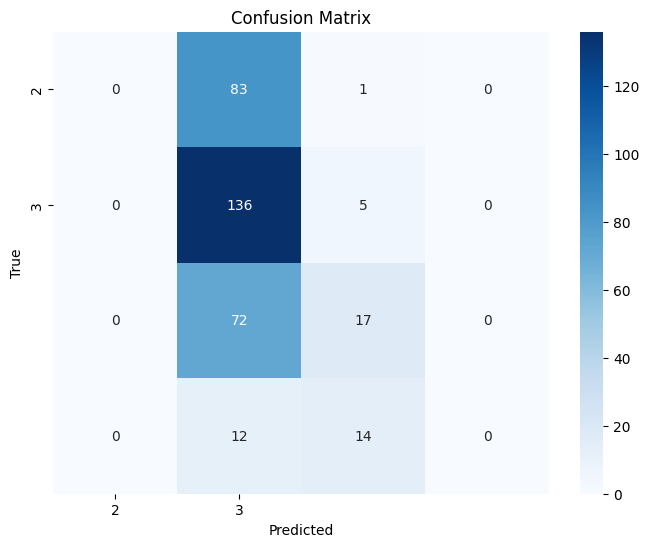

accuracy for class 1: 0.000
accuracy for class 2: 0.965
accuracy for class 3: 0.191
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.04938558847699036
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[ -0.691842
1          BRA Value    [0.189619931322902, 0.20154489666341896[ -0.082431
2          BRA Value  [0.20154489666341896, 0.20882918670067196[ -0.691831
3          BRA Value  [0.20882918670067196, 0.21511673901980122[  1.084149
4          BRA Value  [0.21511673901980122, 0.23356299924095925[  1.084151
...              ...                                         ...       ...
22369  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[ -0.082435
22370  c

In [43]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_ml_model, aesthetic_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params={'C': 1000.0, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 18.233279943466187 seconds

Evaluating the model on the test set...
test predictions:  [1 0 0 ... 1 0 0]
     True Value  Prediction
0             3           2
1             3           2
2             1           2
3             2           2
4             2           2
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           2
339           1           2

[340 rows x 2 columns]
accuracy:  0.45294117647058824
precision:  0.30818989492040105
recall:  0.45294117647058824
f1 score:  0.32882494343891405
balanced accuracy:  0.2916965495258586
logistic loss:  0.03909385226646454
mse:  0.6529411764705882
number of far off predictions:  6
number of features:  22376
number of non-zero weights:  22376
model size (non-zero weights / all weights):  1.0


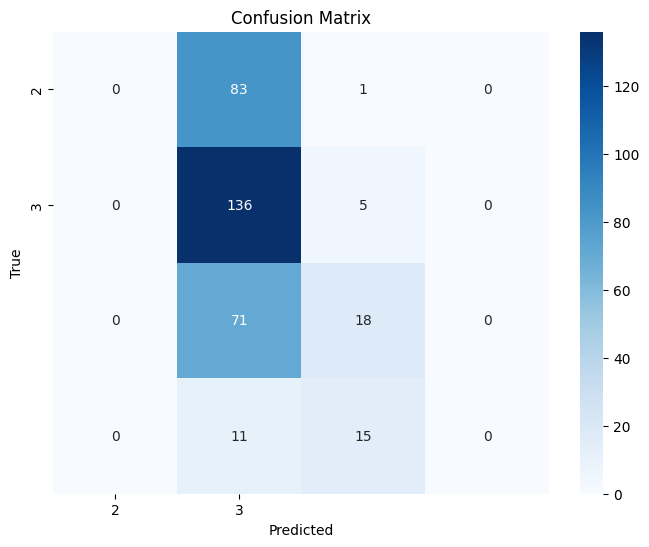

accuracy for class 1: 0.000
accuracy for class 2: 0.965
accuracy for class 3: 0.202
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.04938558847699036
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[ -0.108025
1          BRA Value    [0.189619931322902, 0.20154489666341896[ -0.017121
2          BRA Value  [0.20154489666341896, 0.20882918670067196[ -0.108025
3          BRA Value  [0.20882918670067196, 0.21511673901980122[  0.164726
4          BRA Value  [0.21511673901980122, 0.23356299924095925[  0.164730
...              ...                                         ...       ...
22369  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[ -0.017103
22370  c

In [44]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_mm_model, aesthetic_infbins_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params={'C': 16},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

ola
Execution time: 1.427077054977417 seconds

Evaluating the model on the test set...
test predictions:  [0.77996071 0.33398821 0.07465619 ... 0.77996071 0.33398821 0.07465619]
     True Value  Prediction
0             3           2
1             3           2
2             1           2
3             2           2
4             2           2
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           2
339           1           2

[340 rows x 2 columns]
accuracy:  0.4147058823529412
precision:  0.1719809688581315
recall:  0.4147058823529412
f1 score:  0.2431331784272961
balanced accuracy:  0.25
logistic loss:  0.04169895993114847
mse:  0.8147058823529412
number of far off predictions:  4
number of features:  22376
number of non-zero weights:  2
model size (non-zero weights / all weights):  8.93814801573114e-05


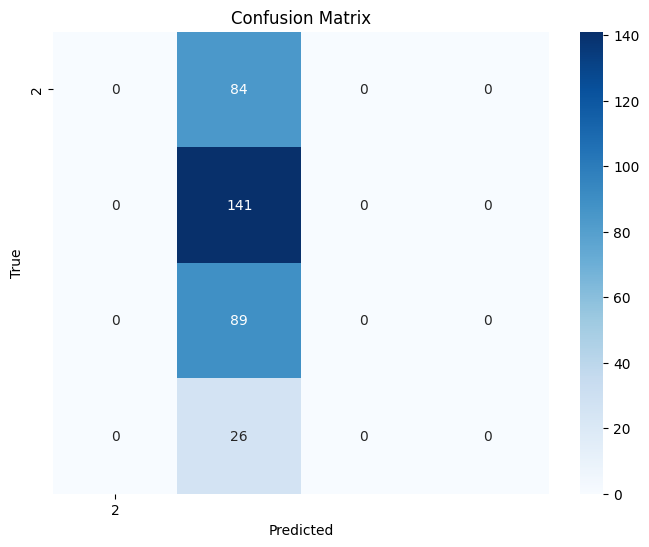

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.44597249508840864
precision on train set:  0.19889146637538066
recall on train set:  0.44597249508840864
f1 score on train set:  0.2750971640898607
balanced accuracy on train set:  0.25
logistic loss on train set:  0.03838317661382172
mse on train set:  0.7779960707269156

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []

SBC columns weights:
               Feature    Weight
22374  featsbcol1-bin1 -0.445972
22375  featsbcol2-bin1 -0.705305


In [45]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_beyondl1_model, aesthetic_infbins_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 57.747703075408936 seconds

Evaluating the model on the test set...
test predictions:  [0.86860749 0.42263499 0.16330297 ... 0.73224385 0.28627136 0.02693933]
     True Value  Prediction
0             3           2
1             3           2
2             1           2
3             2           2
4             2           2
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           2
339           1           2

[340 rows x 2 columns]
accuracy:  0.4264705882352941
precision:  0.2782286520818631
recall:  0.4264705882352941
f1 score:  0.27377783692662583
balanced accuracy:  0.26227189417483465
logistic loss:  0.04130710386164648
mse:  0.7411764705882353
number of far off predictions:  4
number of features:  22376
number of non-zero weights:  22376
model size (non-zero weights / all weights):  1.0


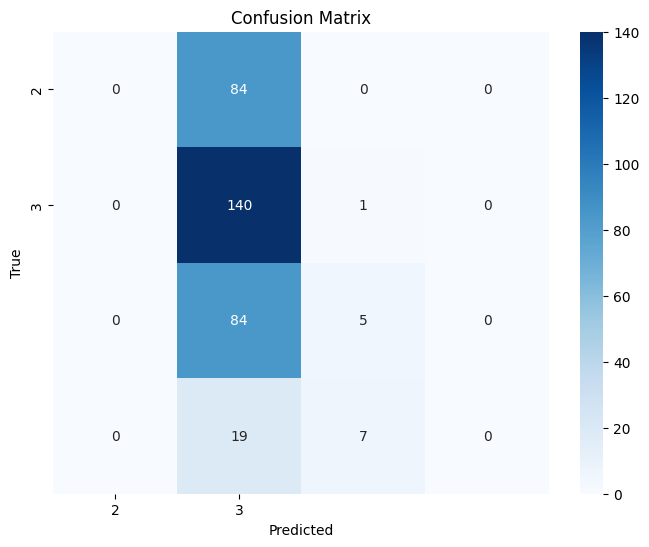

accuracy for class 1: 0.000
accuracy for class 2: 0.993
accuracy for class 3: 0.056
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.04938558847699036
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.017444
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.032595
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.017444
3          BRA Value  [0.20882918670067196, 0.21511673901980122[  0.062898
4          BRA Value  [0.21511673901980122, 0.23356299924095925[  0.062898
...              ...                                         ...       ...
22369  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.032595
22370  c

In [46]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_adaptivelasso_model, aesthetic_infbins_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params={'alpha': 1e-10},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

Execution time: 1156.211497783661 seconds

Evaluating the model on the test set...
test predictions:  [1 1 1 ... 0 0 0]
     True Value  Prediction
0             3           4
1             3           2
2             1           3
3             2           3
4             2           3
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           3
339           1           1

[340 rows x 2 columns]
accuracy:  0.47352941176470587
precision:  0.47233283071424337
recall:  0.47352941176470587
f1 score:  0.47266880989512255
balanced accuracy:  0.45050692494213884
logistic loss:  0.061020998371743476
mse:  0.7294117647058823
number of far off predictions:  16
number of features:  22376
number of non-zero weights:  22376
model size (non-zero weights / all weights):  1.0


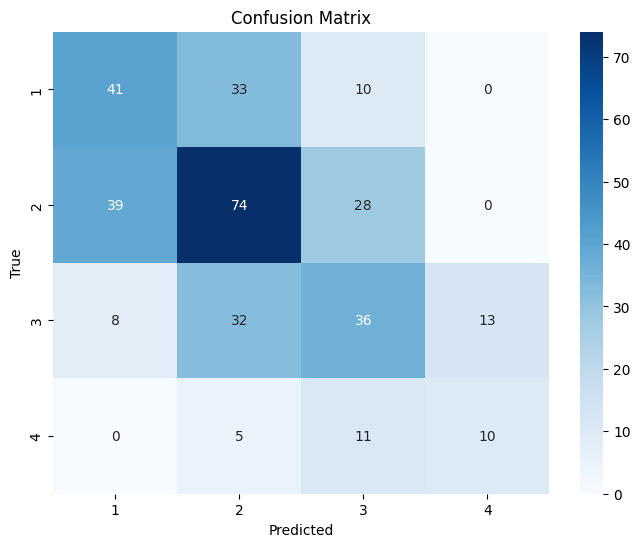

accuracy for class 1: 0.488
accuracy for class 2: 0.525
accuracy for class 3: 0.404
accuracy for class 4: 0.385

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.04938558847699036
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[ -0.012905
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.006201
2          BRA Value  [0.20154489666341896, 0.20882918670067196[ -0.028443
3          BRA Value  [0.20882918670067196, 0.21511673901980122[  0.015057
4          BRA Value  [0.21511673901980122, 0.23356299924095925[  0.004227
...              ...                                         ...       ...
22369  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[ -0.038191
22370  c

In [47]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_ml_model, aesthetic_infbins_diffcod_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1000.0, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 19.460856199264526 seconds

Evaluating the model on the test set...
test predictions:  [1 1 1 ... 0 0 0]
     True Value  Prediction
0             3           4
1             3           2
2             1           3
3             2           3
4             2           3
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           3
339           1           1

[340 rows x 2 columns]
accuracy:  0.47352941176470587
precision:  0.47309184070247623
recall:  0.47352941176470587
f1 score:  0.4716902365105084
balanced accuracy:  0.43398624644142214
logistic loss:  0.05379834060583122
mse:  0.7470588235294118
number of far off predictions:  16
number of features:  22376
number of non-zero weights:  22373
model size (non-zero weights / all weights):  0.999865927779764


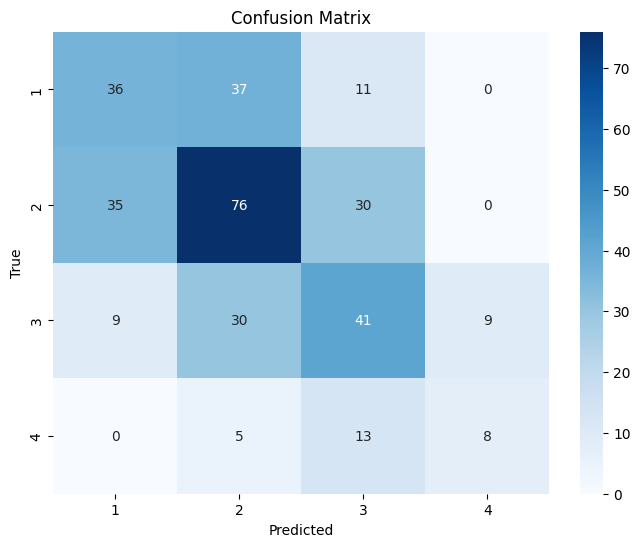

accuracy for class 1: 0.429
accuracy for class 2: 0.539
accuracy for class 3: 0.461
accuracy for class 4: 0.308

Evaluating the model on the train set...
accuracy on train set:  0.9980353634577603
precision on train set:  0.9980375223990154
recall on train set:  0.9980353634577603
f1 score on train set:  0.9980326510773354
balanced accuracy on train set:  0.9957635566188198
logistic loss on train set:  0.049385742763827525
mse on train set:  0.0019646365422396855

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.003991
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.009738
2          BRA Value  [0.20154489666341896, 0.20882918670067196[ -0.006053
3          BRA Value  [0.20882918670067196, 0.21511673901980122[  0.009432
4          BRA Value  [0.21511673901980122, 0.23356299924095925[  0.005785
...              ...                                         ...

In [48]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_mm_model, aesthetic_infbins_diffcod_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.03125},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

ola
Execution time: 2.847344160079956 seconds

Evaluating the model on the test set...
test predictions:  [ 1.10627498  0.66025623  0.40069071 ...  0.55747259  0.11145384
 -0.14811168]
     True Value  Prediction
0             3           3
1             3           2
2             1           2
3             2           2
4             2           2
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           2
339           1           2

[340 rows x 2 columns]
accuracy:  0.5352941176470588
precision:  0.566955604241151
recall:  0.5352941176470588
f1 score:  0.5020689241333767
balanced accuracy:  0.42426654547142234
logistic loss:  0.05089007329611996
mse:  0.5441176470588235
number of far off predictions:  12
number of features:  22376
number of non-zero weights:  11
model size (non-zero weights / all weights):  0.0004915981408652127


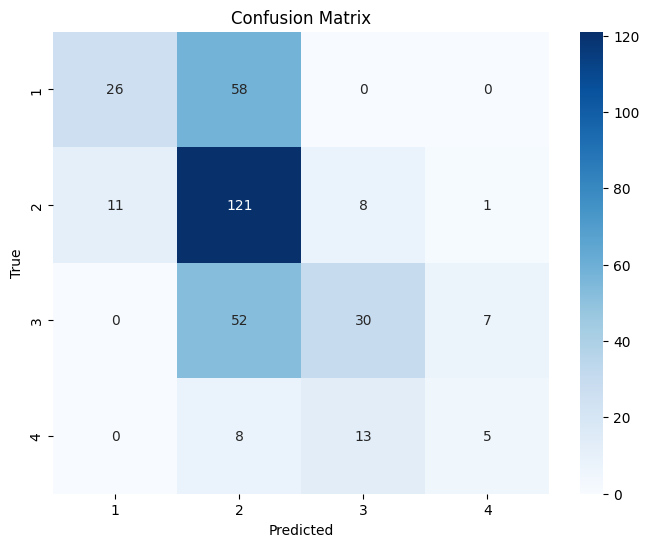

accuracy for class 1: 0.310
accuracy for class 2: 0.858
accuracy for class 3: 0.337
accuracy for class 4: 0.192

Evaluating the model on the train set...
accuracy on train set:  0.5726915520628684
precision on train set:  0.5989341884473722
recall on train set:  0.5726915520628684
f1 score on train set:  0.5334637619455885
balanced accuracy on train set:  0.46299560882833835
logistic loss on train set:  0.039889871576513025
mse on train set:  0.462671905697446

Scorecard table:
         Feature                                           Bin    Points
0      LBC Value    [0.00062661112159155, 0.00176186416421245[  0.336573
1      LBC Value      [1.4532499477191012, 1.4549174762375603[  0.068811
2      UNR Value       [1.4323540853832433, 1.434493807117947[  0.088353
3     pLBC Value  [0.018638797725677503, 0.018716084506775553[  0.107654
4     pLBC Value    [0.09797929506130015, 0.09821862083990104[  0.192292
5     pBCE Value      [0.3071291720186229, 0.3076130430410502[  0.132216
6     

In [49]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_beyondl1_model, aesthetic_infbins_diffcod_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params={'datafit': Huber(delta=1.0), 'penalty': MCPenalty(alpha=1e-2, gamma=3), 'solver': AndersonCD()},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.49229691876750703
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.49229691876750703
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.49229691876750703
testing parameters: {'alpha': 1e-06}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.49229691876750703
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.4962039988409157
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.0
testing parameters: {'alpha': 0.01}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.0
testing parameters: {'alpha': 0.21544346900318778}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.050980392156862744
testing parameters: {'alpha': 4.641588833612772}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.2200328407224959
testing parameters: {'alpha': 100.0}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.2200328407224959
best parameters:  {'alpha': 2.1544346900318823e-05}
best score:  0.4962039988409157


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 12467.626455068588 seconds

Evaluating the model on the test set...
test predictions:  [ 1.23489956  0.78892706  0.52959504 ...  0.3984692  -0.04750329
 -0.30683532]
     True Value  Prediction
0             3           4
1             3           2
2             1           2
3             2           3
4             2           2
..          ...         ...
335           2           2
336           2           2
337           1           2
338           1           3
339           1           1

[340 rows x 2 columns]
accuracy:  0.49117647058823527
precision:  0.48851276282445943
recall:  0.49117647058823527
f1 score:  0.47827489724653643
balanced accuracy:  0.42247899224052704
logistic loss:  0.048384363207130965
mse:  0.6852941176470588
number of far off predictions:  14
number of features:  22376
number of non-zero weights:  22376
model size (non-zero weights / all weights):  1.0


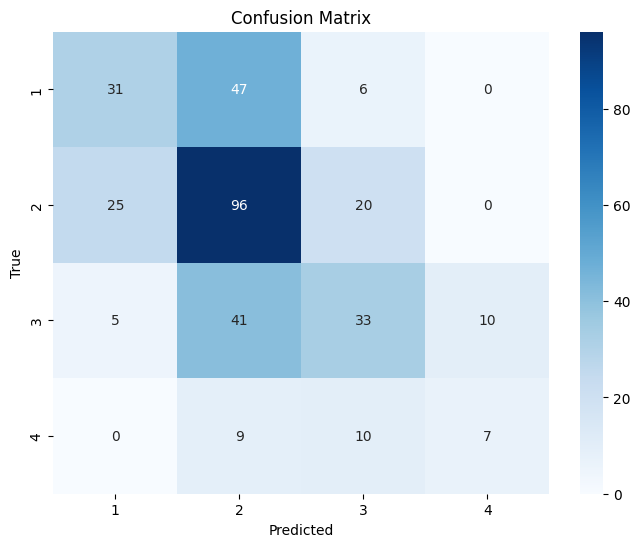

accuracy for class 1: 0.369
accuracy for class 2: 0.681
accuracy for class 3: 0.371
accuracy for class 4: 0.269

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.04938558847699036
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin        Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  1.476270e-04
1          BRA Value    [0.189619931322902, 0.20154489666341896[  3.100140e-03
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  2.448203e-08
3          BRA Value  [0.20882918670067196, 0.21511673901980122[  3.876126e-03
4          BRA Value  [0.21511673901980122, 0.23356299924095925[  2.346565e-03
...              ...                                         ...           ...
22369  cEMDLab Value    [0.7650779384374097, 0.78914290

In [50]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_adaptivelasso_model, aesthetic_infbins_diffcod_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None, #{'alpha': 1e-08},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

### select features by hand

In [51]:
aesthetic_evaluation_X = aesthetic_evaluation_X[['pLBC Value', 'pBCE Value', 'cX2b Value', 'pUNR Value']]

#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5835941273060948
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5845793489809716
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5826137351492321
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5786921665217811
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5786921665217811
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5786921665217811
testing parameters: {'C': 1.010101010101

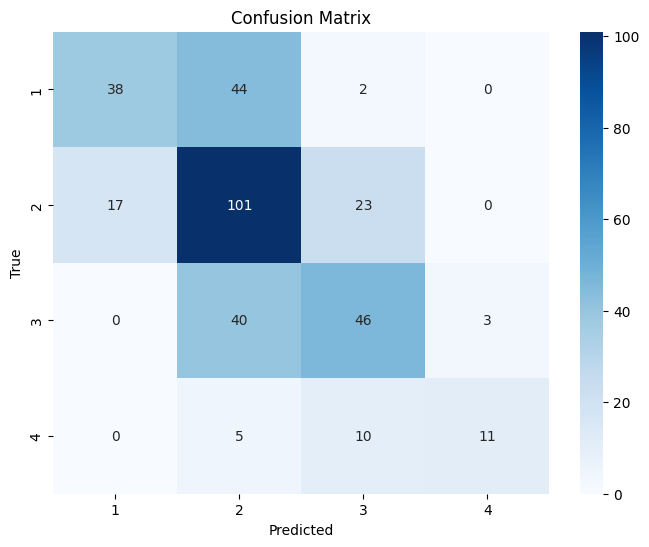

accuracy for class 1: 0.452
accuracy for class 2: 0.716
accuracy for class 3: 0.517
accuracy for class 4: 0.423

Evaluating the model on the train set...
accuracy on train set:  0.6041257367387033
precision on train set:  0.6098902317505183
recall on train set:  0.6041257367387033
f1 score on train set:  0.5910082456545694
balanced accuracy on train set:  0.5381388508942561
logistic loss on train set:  0.04384064539955893
mse on train set:  0.4675834970530452

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.0140286071627897[ -1.420350
1   pLBC Value      [0.0140286071627897, 0.0754687169258525[ -0.020815
2   pLBC Value       [0.0754687169258525, 0.162537795701451[  1.919432
3   pLBC Value       [0.162537795701451, 0.3166823979957318[  4.162856
4   pLBC Value                     [0.3166823979957318, inf[  6.382089
5   pBCE Value      [0.0002450886198942, 0.3034985174100497[  0.121891
6   pBCE Value       

In [52]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_ml_model, aesthetic_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2200328407224959
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2720757268424611
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3399063073505264
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4882691007437458
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.482372259248527
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4804114749348015
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5049744035545253
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5472520042499759
testing parameters: {'C': 0.25}
  fold  1
  f

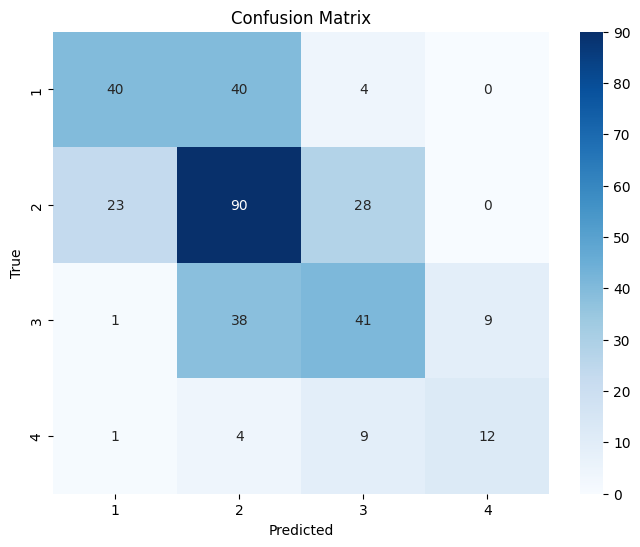

accuracy for class 1: 0.476
accuracy for class 2: 0.638
accuracy for class 3: 0.461
accuracy for class 4: 0.462

Evaluating the model on the train set...
accuracy on train set:  0.5972495088408645
precision on train set:  0.5958557909527938
recall on train set:  0.5972495088408645
f1 score on train set:  0.5908827295604026
balanced accuracy on train set:  0.5647339934487801
logistic loss on train set:  0.044937397784127316
mse on train set:  0.48330058939096265

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.0140286071627897[ -3.598932
1   pLBC Value      [0.0140286071627897, 0.0754687169258525[ -1.599361
2   pLBC Value       [0.0754687169258525, 0.162537795701451[  0.400111
3   pLBC Value       [0.162537795701451, 0.3166823979957318[  2.399118
4   pLBC Value                     [0.3166823979957318, inf[  2.399064
5   pBCE Value      [0.0002450886198942, 0.3034985174100497[ -1.199500
6   pBCE Value     

In [53]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_mm_model, aesthetic_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None, #{'C': 8, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

ola
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b0f5750>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x17ae6cd90>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17a8e9290>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5275717183425094
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b0f5750>, 'penalty': <skglm.penalties.separable.SCAD object at 0x17ae6f690>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17a8e9290>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5334540712836858
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x17b0f5750>, 'penalty': <skglm.penalties.separable.SCAD object at 0x17ae6f690>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17a8e9290>}
best score:  0.5334540712836858
Execution time: 22.940855026245117 seconds

Evaluating the model on the test set...
test predictions:  [ 1.0

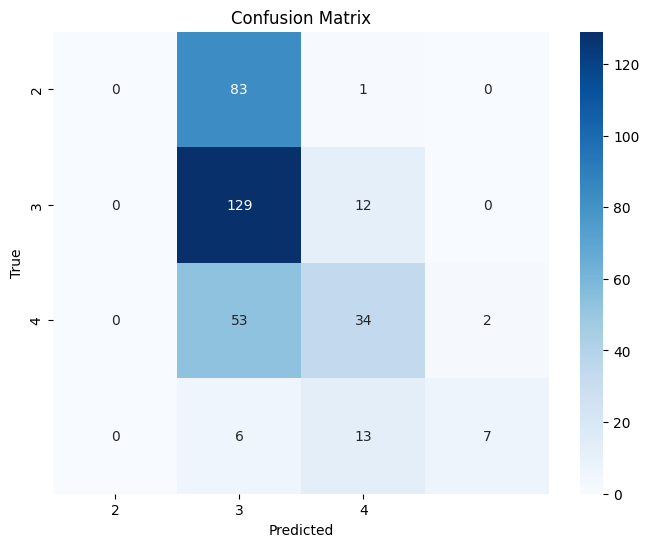

accuracy for class 1: 0.000
accuracy for class 2: 0.915
accuracy for class 3: 0.382
accuracy for class 4: 0.269


KeyError: nan

In [54]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_beyondl1_model, aesthetic_caim_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5344296339225345
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5344296339225345
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5344296339225345
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5344296339225345
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5344296339225345
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
AdaptiveLasso infeasible: minimize 0.00020475020475020476 @ quad_over_lin([[0.00 1.00 ... 0.00 0.00]
 [0.00 1.00 ... 1.00 0.00]
 ...
 [1.00 0.00 ... 1.00 0.00]
 [1.00 0.00 ... 0.00 1.00]] @ var9181 + -[1. 1. 0. ... 1. 0. 0.], 1.0) + norm1(param9183 @ var9181) is infeasible.
  fold  2
A

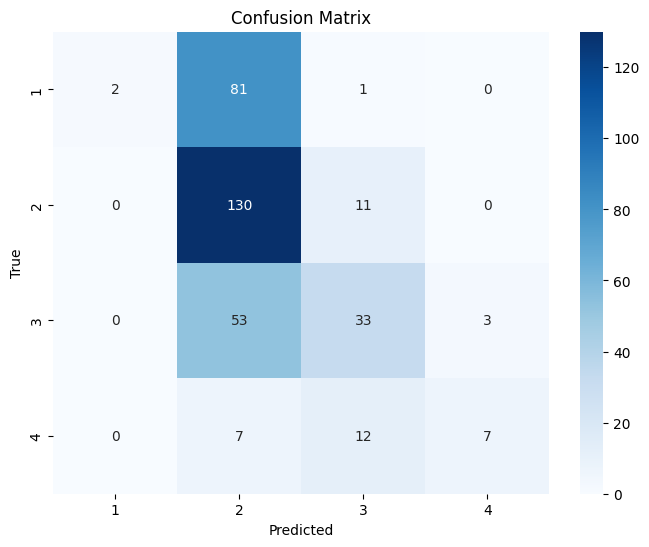

accuracy for class 1: 0.024
accuracy for class 2: 0.922
accuracy for class 3: 0.371
accuracy for class 4: 0.269

Evaluating the model on the train set...
accuracy on train set:  0.5442043222003929
precision on train set:  0.4458835288084733
recall on train set:  0.5442043222003929
f1 score on train set:  0.4602188350207352
balanced accuracy on train set:  0.4354741040125343
logistic loss on train set:  0.03299392144038728
mse on train set:  0.49705304518664045

Scorecard table:
       Feature                                           Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.0140286071627897[ -0.026218
1   pLBC Value      [0.0140286071627897, 0.0754687169258525[  0.122485
2   pLBC Value       [0.0754687169258525, 0.162537795701451[  0.335031
3   pLBC Value       [0.162537795701451, 0.3166823979957318[  0.504287
4   pLBC Value                     [0.3166823979957318, inf[  0.532893
5   pBCE Value      [0.0002450886198942, 0.3034985174100497[  0.178089
6   pBCE Value      

In [55]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_adaptivelasso_model, aesthetic_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None, #{'alpha': 0.003593813663804626},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5835892977880807
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5845745194629576
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5835989568241089
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5806577803535207
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5816381725103834
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5816381725103834
testing parameters: {'C': 1.010101010101

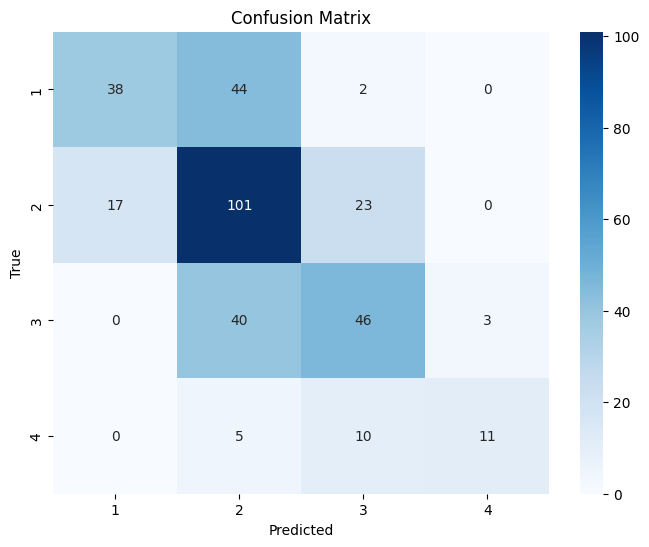

accuracy for class 1: 0.452
accuracy for class 2: 0.716
accuracy for class 3: 0.517
accuracy for class 4: 0.423

Evaluating the model on the train set...
accuracy on train set:  0.6041257367387033
precision on train set:  0.6098902317505183
recall on train set:  0.6041257367387033
f1 score on train set:  0.5910082456545694
balanced accuracy on train set:  0.5381388508942561
logistic loss on train set:  0.04384064539955893
mse on train set:  0.4675834970530452

Scorecard table:
       Feature                                       Bin    Points
0   pLBC Value  [0.0140286071627897, 0.0754687169258525[  1.371327
1   pLBC Value   [0.0754687169258525, 0.162537795701451[  1.897066
2   pLBC Value   [0.162537795701451, 0.3166823979957318[  2.101948
3   pBCE Value   [0.3034985174100497, 0.358048255463711[  0.540482
4   pBCE Value    [0.358048255463711, 0.376402851897656[  0.160064
5   pBCE Value   [0.376402851897656, 1.9451569659865504[  0.869688
6   cX2b Value   [0.019452191889286, 0.0285949725

In [56]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_ml_model, aesthetic_caim_diffcod_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None, #{'C': 1.0, 'class_weight': None},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2200328407224959
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.28486429054380374
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3438133874239351
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.518767507002801
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4892446633825944
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5089008016999903
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5354534917415242
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5580604655655366
testing parameters: {'C': 0.25}
  fold  1
  

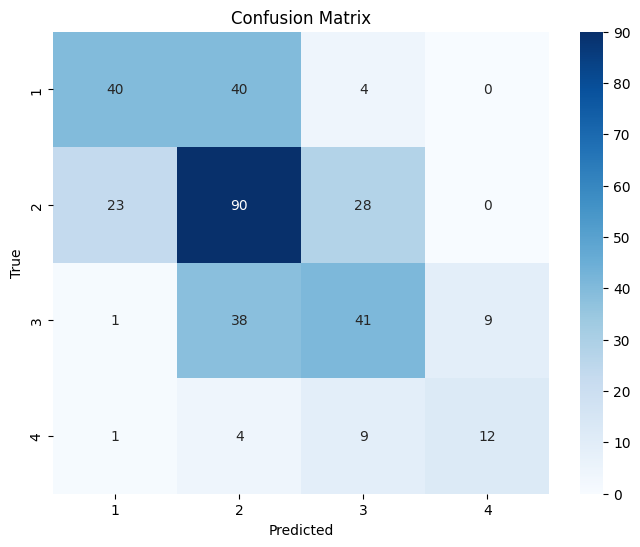

accuracy for class 1: 0.476
accuracy for class 2: 0.638
accuracy for class 3: 0.461
accuracy for class 4: 0.462

Evaluating the model on the train set...
accuracy on train set:  0.5943025540275049
precision on train set:  0.5930413084373914
recall on train set:  0.5943025540275049
f1 score on train set:  0.5877806219575703
balanced accuracy on train set:  0.561893084357871
logistic loss on train set:  0.0451641814179675
mse on train set:  0.4862475442043222

Scorecard table:
       Feature                                           Bin        Points
0   pLBC Value  [2.2773158381800327e-05, 0.0140286071627897[  5.329071e-14
1   pLBC Value      [0.0140286071627897, 0.0754687169258525[  1.999141e+00
2   pLBC Value       [0.0754687169258525, 0.162537795701451[  1.998979e+00
3   pLBC Value       [0.162537795701451, 0.3166823979957318[  1.749704e+00
4   pLBC Value                     [0.3166823979957318, inf[  4.490066e-04
5   pBCE Value      [0.0002450886198942, 0.3034985174100497[  5.329071

In [57]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_mm_model, aesthetic_caim_diffcod_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None, #{'C': 16, 'class_weight': None},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

ola
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b7ee9d0>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x10b665450>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1095cd810>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.524620882835893
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17b7ee9d0>, 'penalty': <skglm.penalties.separable.SCAD object at 0x17b78b550>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1095cd810>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5275958659325799
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x17b7ee9d0>, 'penalty': <skglm.penalties.separable.SCAD object at 0x17b78b550>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1095cd810>}
best score:  0.5275958659325799
Execution time: 25.183162927627563 seconds

Evaluating the model on the test set...
test predictions:  [ 1.03

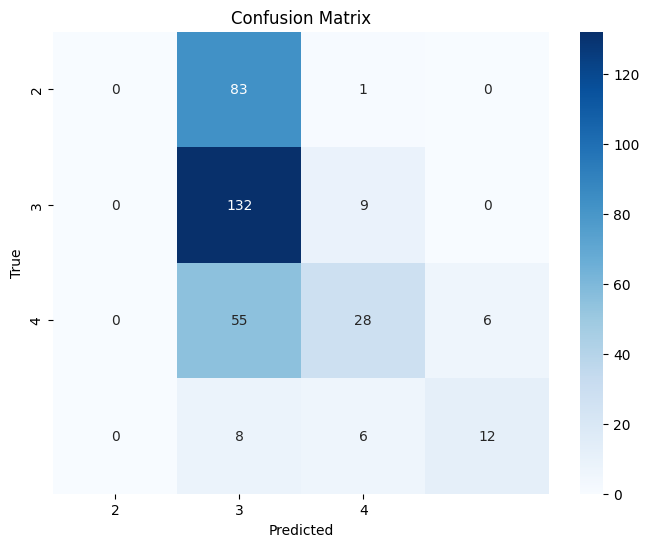

accuracy for class 1: 0.000
accuracy for class 2: 0.936
accuracy for class 3: 0.315
accuracy for class 4: 0.462

Evaluating the model on the train set...
accuracy on train set:  0.5442043222003929
precision on train set:  0.4424210333910367
recall on train set:  0.5442043222003929
f1 score on train set:  0.45611523370027146
balanced accuracy on train set:  0.4498900874031293
logistic loss on train set:  0.03301247253775723
mse on train set:  0.5029469548133595

Scorecard table:
      Feature                                       Bin    Points
0  pLBC Value  [0.0140286071627897, 0.0754687169258525[  0.147852
1  pLBC Value   [0.0754687169258525, 0.162537795701451[  0.211556
2  pLBC Value   [0.162537795701451, 0.3166823979957318[  0.228997
3  pBCE Value  [0.0002450886198942, 0.3034985174100497[  0.169871
4  pBCE Value   [0.3034985174100497, 0.358048255463711[  0.063324
5  pBCE Value   [0.376402851897656, 1.9451569659865504[  0.112168
6  cX2b Value  [0.0285949725657701, 0.3334223330020904[

In [58]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_beyondl1_model, aesthetic_caim_diffcod_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5354100260793972
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5354100260793972
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5354100260793972
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5354100260793972
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5354100260793972
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5393364242248624
testing parameters: {'alpha': 0.01}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.535443832705496
testing parameters: {'alpha': 0.21544346900318778}
  fold  1
  fold  2
  fold  3
  fold  4
  fo

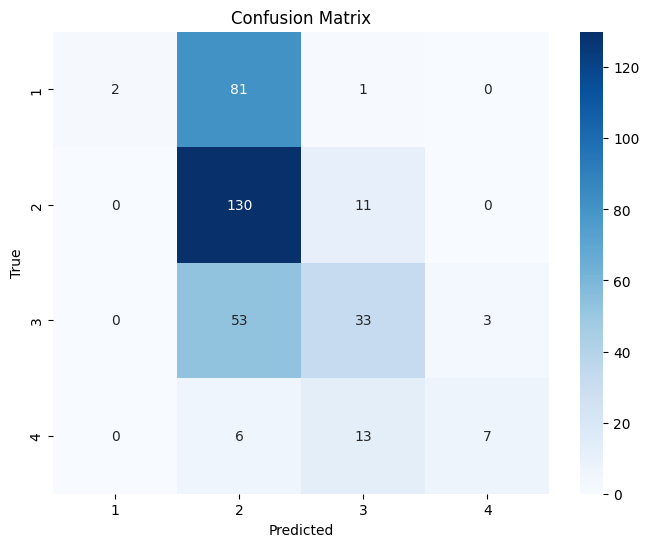

accuracy for class 1: 0.024
accuracy for class 2: 0.922
accuracy for class 3: 0.371
accuracy for class 4: 0.269

Evaluating the model on the train set...
accuracy on train set:  0.5432220039292731
precision on train set:  0.4449755364565935
recall on train set:  0.5432220039292731
f1 score on train set:  0.45906063618360066
balanced accuracy on train set:  0.43452713431556467
logistic loss on train set:  0.03309700125547837
mse on train set:  0.49803536345776034

Scorecard table:
       Feature                                           Bin        Points
0   pLBC Value  [2.2773158381800327e-05, 0.0140286071627897[  1.175471e-01
1   pLBC Value      [0.0140286071627897, 0.0754687169258525[  1.477558e-01
2   pLBC Value       [0.0754687169258525, 0.162537795701451[  2.113970e-01
3   pLBC Value       [0.162537795701451, 0.3166823979957318[  1.655754e-01
4   pLBC Value                     [0.3166823979957318, inf[  6.753851e-13
5   pBCE Value      [0.0002450886198942, 0.3034985174100497[  1.1

In [59]:
start_time = time.time()

scorecard = Scorecard()

aesthetic_caim_diffcod_adaptivelasso_model, aesthetic_caim_diffcod_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None, #{'alpha': 1e-08},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4675842750893461
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4626485076789336
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4577610354486622
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4371486525644741
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4430261759876365
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.445040084999517
testing parameters: {'C': 1.0101010101010

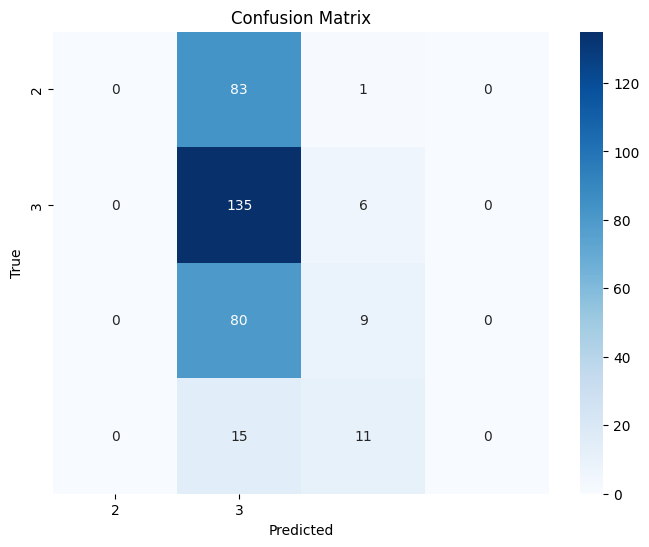

accuracy for class 1: 0.000
accuracy for class 2: 0.957
accuracy for class 3: 0.101
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.44597249508840864
precision on train set:  0.21493791164558124
recall on train set:  0.44597249508840864
f1 score on train set:  0.2900738005302829
balanced accuracy on train set:  0.25
logistic loss on train set:  0.03646490534164411
mse on train set:  0.5540275049115914

Scorecard table:
         Feature                                             Bin    Points
0     pLBC Value  [3.2239679535846356e-05, 7.14503313927462e-05[  0.150257
1     pLBC Value        [0.00019454810607185, 0.000259873127544[  0.641390
2     pLBC Value     [0.000259873127544, 0.00027741600466875003[  0.641364
3     pLBC Value     [0.00027741600466875003, 0.000369098864304[  0.641494
4     pLBC Value         [0.000369098864304, 0.0004629256417507[  0.641295
...          ...                                             ...       ...
2248

In [60]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_ml_model, aesthetic_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None, #{'C': 10.0, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2200328407224959
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2200328407224959
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2200328407224959
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.44601564763836576
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.44601564763836576
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.44601564763836576
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.44601564763836576
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.44601564763836576
testing parameters: {'C': 0.25}
  fold 

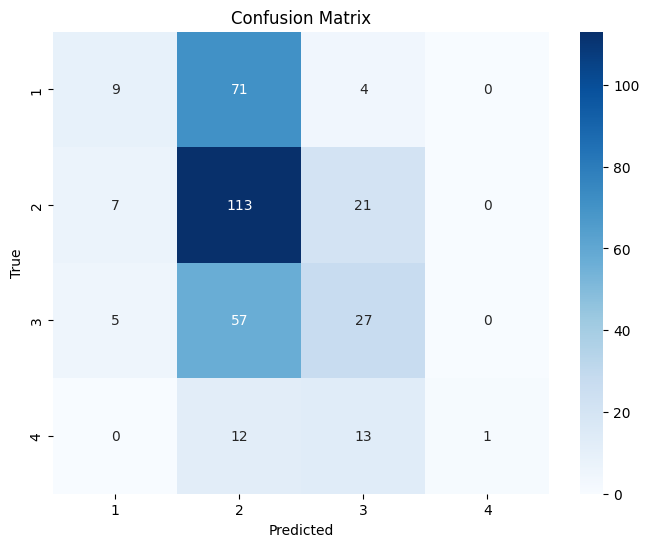

accuracy for class 1: 0.107
accuracy for class 2: 0.801
accuracy for class 3: 0.303
accuracy for class 4: 0.038

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.04938558847699036
mse on train set:  0.0

Scorecard table:
         Feature                                             Bin    Points
0     pLBC Value  [3.2239679535846356e-05, 7.14503313927462e-05[  0.405952
1     pLBC Value  [7.14503313927462e-05, 0.00011612788529674999[ -0.093939
2     pLBC Value   [0.00011612788529674999, 0.00019454810607185[ -0.094028
3     pLBC Value        [0.00019454810607185, 0.000259873127544[  0.905778
4     pLBC Value     [0.000259873127544, 0.00027741600466875003[  0.905769
...          ...                                             ...       ...
4063  pUNR Value        [0.5453701567805891, 0.6071746191272416[  0.905848
4064  pU

In [61]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_mm_model, aesthetic_infbins_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,#{'C': 4, 'class_weight': 'balanced'},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

ola
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x10f492950>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x1093bb250>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1093b9a50>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.44601564763836576
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x10f492950>, 'penalty': <skglm.penalties.separable.SCAD object at 0x1093ba850>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1093b9a50>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.44601564763836576
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x10f492950>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x1093bb250>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1093b9a50>}
best score:  0.44601564763836576
Execution time: 6.90873384475708 seconds

Evaluating the model on the test set...
test predictions: 

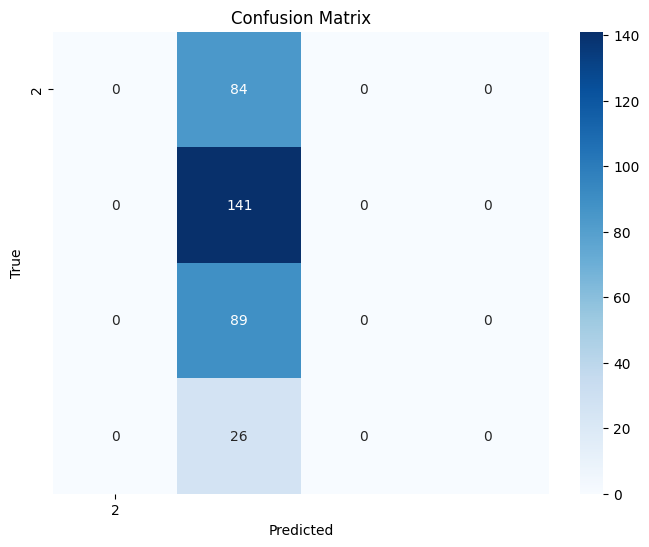

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.44597249508840864
precision on train set:  0.19889146637538066
recall on train set:  0.44597249508840864
f1 score on train set:  0.2750971640898607
balanced accuracy on train set:  0.25
logistic loss on train set:  0.03838317661382172
mse on train set:  0.7779960707269156

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []

SBC columns weights:
              Feature    Weight
4068  featsbcol1-bin1 -0.445972
4069  featsbcol2-bin1 -0.705305


In [62]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_beyondl1_model, aesthetic_infbins_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.46857915580025117
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.46857915580025117
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.46857915580025117
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.46857915580025117
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.46857915580025117
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30453008789722785
testing parameters: {'alpha': 0.01}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2200328407224959
testing parameters: {'alpha': 0.21544346900318778}
  fold  1
  fold  2
  fold  3
  fold 

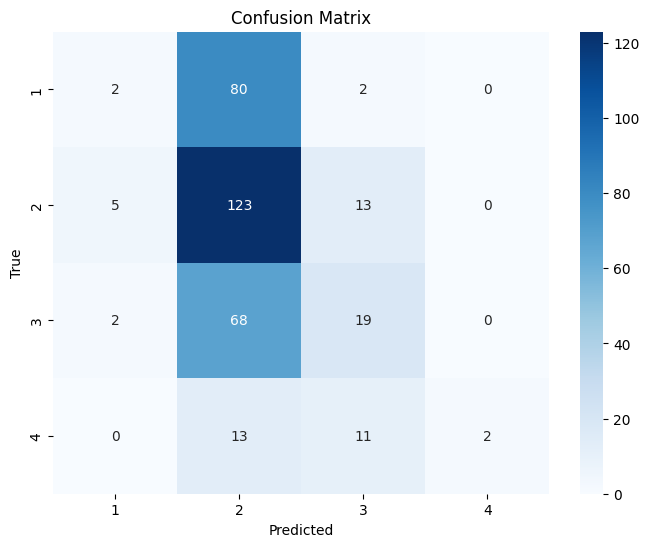

accuracy for class 1: 0.024
accuracy for class 2: 0.872
accuracy for class 3: 0.213
accuracy for class 4: 0.077

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.04938558847699036
mse on train set:  0.0

Scorecard table:
         Feature                                             Bin    Points
0     pLBC Value  [3.2239679535846356e-05, 7.14503313927462e-05[  0.262606
1     pLBC Value  [7.14503313927462e-05, 0.00011612788529674999[  0.179273
2     pLBC Value   [0.00011612788529674999, 0.00019454810607185[  0.179273
3     pLBC Value        [0.00019454810607185, 0.000259873127544[  0.345940
4     pLBC Value     [0.000259873127544, 0.00027741600466875003[  0.345940
...          ...                                             ...       ...
4063  pUNR Value        [0.5453701567805891, 0.6071746191272416[  0.345940
4064  pU

In [63]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_adaptivelasso_model, aesthetic_infbins_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None, #{'alpha': 0.0002782559402207126},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.45593547763933157
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4775620593064812
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.47165555877523424
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5001352265043948
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5187723365208152
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5413358446827006
testing parameters: {'C': 1.0101010101

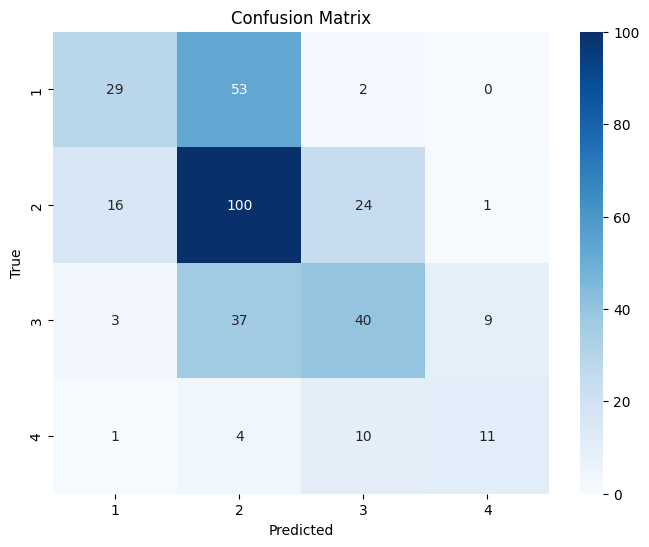

accuracy for class 1: 0.345
accuracy for class 2: 0.709
accuracy for class 3: 0.449
accuracy for class 4: 0.423

Evaluating the model on the train set...
accuracy on train set:  0.7328094302554028
precision on train set:  0.7474619187507036
recall on train set:  0.7328094302554028
f1 score on train set:  0.7277723264658261
balanced accuracy on train set:  0.6804459445946665
logistic loss on train set:  0.04484804207110161
mse on train set:  0.2730844793713163

Scorecard table:
         Feature                                            Bin    Points
0     pLBC Value  [0.00011612788529674999, 0.00019454810607185[ -0.029255
1     pLBC Value       [0.00019454810607185, 0.000259873127544[ -0.093210
2     pLBC Value       [0.0004999498313318, 0.0006578564859266[ -0.060043
3     pLBC Value      [0.0006578564859266, 0.00079939245220915[ -0.027721
4     pLBC Value        [0.00079939245220915, 0.00083380976639[ -0.230535
...          ...                                            ...       ...


In [64]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_ml_model, aesthetic_infbins_diffcod_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30057954216169225
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3222061238288419
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.37721433400946586
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5374432531633343
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5609968125181106
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5423452139476479
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5403699410798802
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5188013136288998
testing parameters: {'C': 0.25}
  fold  1


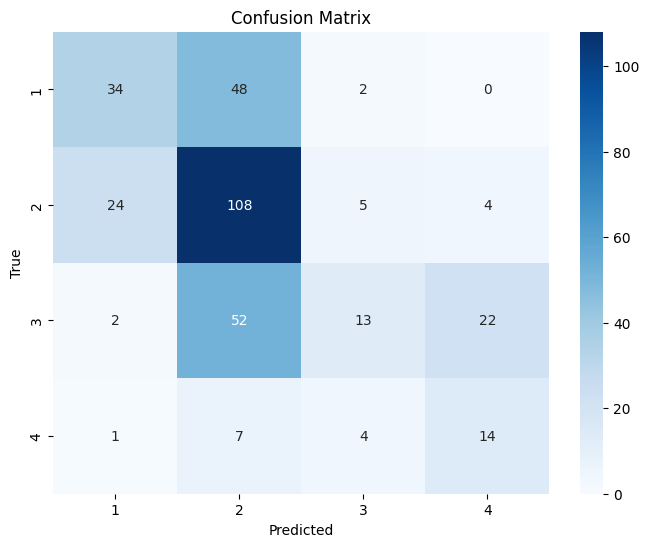

accuracy for class 1: 0.405
accuracy for class 2: 0.766
accuracy for class 3: 0.146
accuracy for class 4: 0.538

Evaluating the model on the train set...
accuracy on train set:  0.6512770137524558
precision on train set:  0.7058045303072433
recall on train set:  0.6512770137524558
f1 score on train set:  0.613319868260016
balanced accuracy on train set:  0.6364349860810417
logistic loss on train set:  0.048141511487984644
mse on train set:  0.3781925343811395

Scorecard table:
         Feature                                             Bin    Points
0     pLBC Value  [3.2239679535846356e-05, 7.14503313927462e-05[  0.015625
1     pLBC Value  [7.14503313927462e-05, 0.00011612788529674999[ -0.009972
2     pLBC Value   [0.00011612788529674999, 0.00019454810607185[ -0.025597
3     pLBC Value        [0.00019454810607185, 0.000259873127544[ -0.032136
4     pLBC Value     [0.000259873127544, 0.00027741600466875003[ -0.016511
...          ...                                             ...    

In [65]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_mm_model, aesthetic_infbins_diffcod_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None, #{'C': 0.0625, 'class_weight': 'balanced'},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

ola
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17afb0ed0>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x10b1c0450>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x10b1c2010>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5344730995846614
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x17afb0ed0>, 'penalty': <skglm.penalties.separable.SCAD object at 0x10b1c2bd0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x10b1c2010>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5384043272481407
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x17afb0ed0>, 'penalty': <skglm.penalties.separable.SCAD object at 0x10b1c2bd0>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x10b1c2010>}
best score:  0.5384043272481407
Execution time: 6.935462713241577 seconds

Evaluating the model on the test set...
test predictions:  [ 1.13

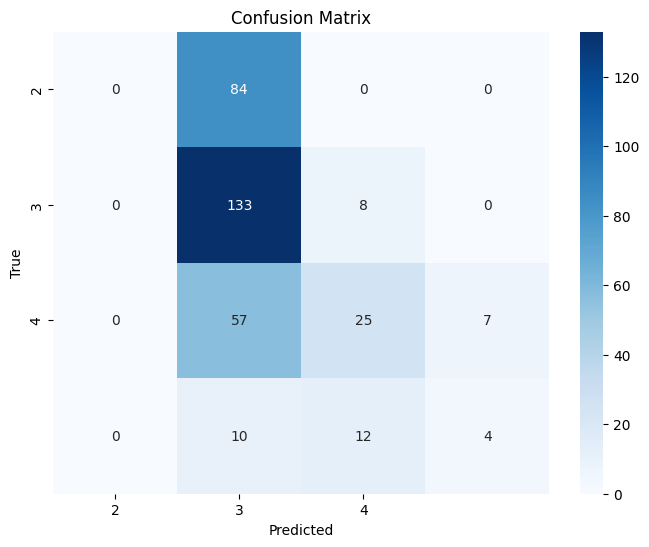

accuracy for class 1: 0.000
accuracy for class 2: 0.943
accuracy for class 3: 0.281
accuracy for class 4: 0.154

Evaluating the model on the train set...
accuracy on train set:  0.5392927308447937
precision on train set:  0.43988982495108503
recall on train set:  0.5392927308447937
f1 score on train set:  0.4449884643778047
balanced accuracy on train set:  0.40252315937019156
logistic loss on train set:  0.03337710859165746
mse on train set:  0.4901768172888016

Scorecard table:
      Feature                                          Bin    Points
0  pLBC Value   [0.01781367015070065, 0.01801385514656025[  0.122817
1  pLBC Value  [0.057837659780970746, 0.05802983515760765[  0.099414
2  pLBC Value   [0.09722116103280096, 0.09733999626155809[  0.270325
3  pBCE Value    [0.28258652294894016, 0.2831657305410271[  0.134611
4  cX2b Value  [0.0036388389999046497, 0.0036515177926048[  0.153070
5  cX2b Value     [0.1455161795020103, 0.1459278911352157[  0.001363
6  pUNR Value   [0.07813648960824

In [66]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_beyondl1_model, aesthetic_infbins_diffcod_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4686612576064909
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4686612576064909
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4686612576064909
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4686612576064909
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4706268714382304
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
AdaptiveLasso infeasible: minimize 0.00020475020475020476 @ quad_over_lin([[1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 1.00 0.00]
 ...
 [1.00 1.00 ... 1.00 0.00]
 [1.00 1.00 ... 0.00 1.00]] @ var16066 + -[1. 1. 0. ... 1. 0. 0.], 1.0) + norm1(param16068 @ var16066) is infeasible.
  fold  

/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


  mean score: 0.2200328407224959
testing parameters: {'alpha': 4.641588833612772}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2200328407224959
testing parameters: {'alpha': 100.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2200328407224959
best parameters:  {'alpha': 2.1544346900318823e-05}
best score:  0.4706268714382304
Execution time: 3613.5379481315613 seconds

Evaluating the model on the test set...
test predictions:  [ 0.9766938   0.53072131  0.27138928 ...  0.5040812   0.0581087
 -0.20122332]
     True Value  Prediction
0             3           3
1             3           2
2             1           2
3             2           3
4             2           2
..          ...         ...
335           2           3
336           2           2
337           1           2
338           1           2
339           1           2

[340 rows x 2 columns]
accuracy:  0.4823529411764706
precision:  0.4860208527855586
recall:  0.4823529411764706
f

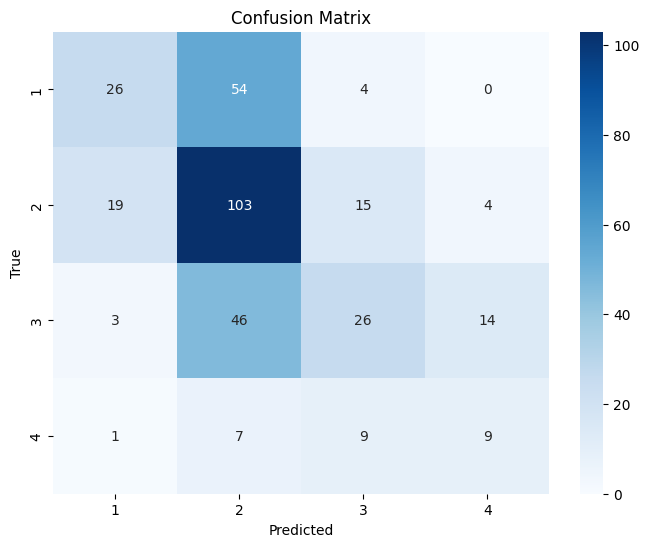

accuracy for class 1: 0.310
accuracy for class 2: 0.730
accuracy for class 3: 0.292
accuracy for class 4: 0.346

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.04938558847699036
mse on train set:  0.0

Scorecard table:
         Feature                                             Bin    Points
0     pLBC Value  [3.2239679535846356e-05, 7.14503313927462e-05[  0.109446
1     pLBC Value  [7.14503313927462e-05, 0.00011612788529674999[  0.038753
2     pLBC Value   [0.00011612788529674999, 0.00019454810607185[ -0.032500
3     pLBC Value        [0.00019454810607185, 0.000259873127544[ -0.005938
4     pLBC Value     [0.000259873127544, 0.00027741600466875003[  0.034326
...          ...                                             ...       ...
4063  pUNR Value        [0.5453701567805891, 0.6071746191272416[  0.062561
4064  pU

In [67]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_adaptivelasso_model, aesthetic_infbins_diffcod_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None, #{'alpha': 1e-08},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## aesthetic evaluation - cmavioso

#### load dataset

In [68]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']

# get data from author = cmavioso
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'cmavioso']
aesthetic_evaluation_data_cmavioso_objective = aesthetic_evaluation_data_cmavioso['Objective Evaluation']
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data_cmavioso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_cmavioso_X = aesthetic_evaluation_data_cmavioso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_cmavioso_y = aesthetic_evaluation_data_cmavioso['Subjective Evaluation']

aesthetic_evaluation_data_cmavioso.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
191,Fair,3.230112,2.621613,0.129300,2.750914,2.650489,27.764303,70.434258,0.154914,0.111813,...,0.170367,0.432197,0.091925,0.022541,0.148024,0.075360,1.536156,0.085017,0.479079,0.193861
211,Excellent,1.623488,0.061330,0.444349,0.383019,1.035294,3.397046,79.705810,0.079565,0.002832,...,0.019840,0.465520,0.014945,0.033902,0.023078,0.004610,0.228967,0.078385,0.062195,0.027221
213,Good,3.990942,0.485167,0.503200,0.988367,2.610970,74.659366,127.703185,0.131264,0.017337,...,0.248912,0.425759,0.236860,0.048242,0.154148,0.210669,3.494328,0.213126,1.704026,0.526204
215,Good,3.722984,0.963986,0.072948,1.036934,1.415178,39.963683,54.495397,0.145328,0.036005,...,0.169951,0.231748,0.138631,0.028689,0.062934,0.081737,1.033011,0.104326,0.213321,0.156273
218,Excellent,0.535671,0.404757,0.510822,0.106065,2.104842,30.368044,58.971882,0.021603,0.014809,...,0.113466,0.220341,0.124781,0.054135,0.008063,0.042476,0.694389,0.176624,0.042199,0.091022


In [69]:
# select features by hand
aesthetic_evaluation_data_cmavioso_X = aesthetic_evaluation_data_cmavioso_X[['pLBC Value', 'pBCE Value', 'cX2b Value', 'pUNR Value']]

In [70]:
print(f"Number of features: {len(aesthetic_evaluation_data_cmavioso.columns)}")

print(f"Number of observations for cmavioso: {len(aesthetic_evaluation_data_cmavioso)}")

print("\ncmavioso target variable distribution:  ", aesthetic_evaluation_data_cmavioso_y.value_counts())

acc_cmavioso = accuracy_score(aesthetic_evaluation_data_cmavioso_y, aesthetic_evaluation_data_cmavioso_objective)
print(f'Accuracy of objective evaluation for cmavioso: {acc_cmavioso}') 


Number of features: 23
Number of observations for cmavioso: 237

cmavioso target variable distribution:   Subjective Evaluation
Good         108
Excellent     81
Fair          36
Poor          12
Name: count, dtype: int64
Accuracy of objective evaluation for cmavioso: 0.679324894514768


In [71]:
# get categorical columns
categorical_columns = aesthetic_evaluation_data_cmavioso_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_data_cmavioso_X[col] = aesthetic_evaluation_data_cmavioso_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_data_cmavioso_X[col].unique()}")

# do a mapping for the ordinal target variable
mapping = {4: 'Poor', 3: 'Fair', 2: 'Good', 1: 'Excellent'}

K = 4  # number of classes

Categorical columns: []


#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6103174603174604
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.616031746031746
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.616031746031746
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.616031746031746
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6217460317460317
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6106349206349206
testing parameters: {'C': 1.010101010101010

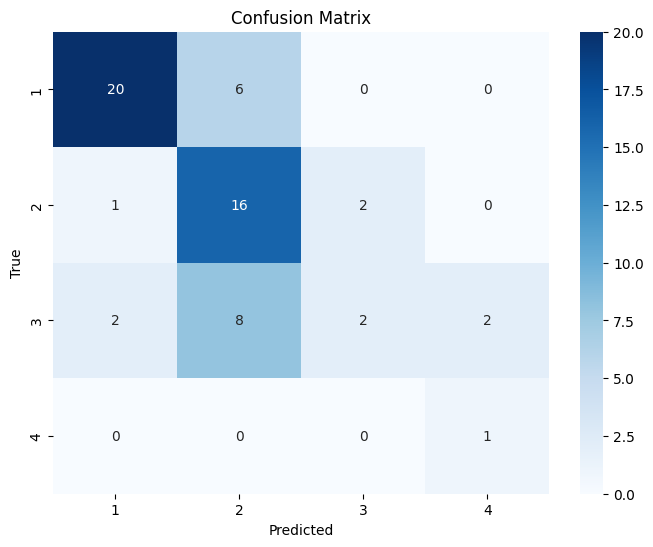

accuracy for class 1: 0.769
accuracy for class 2: 0.842
accuracy for class 3: 0.143
accuracy for class 4: 1.000

Evaluating the model on the train set...
accuracy on train set:  0.711864406779661
precision on train set:  0.7229036029883488
recall on train set:  0.711864406779661
f1 score on train set:  0.7027792556740802
balanced accuracy on train set:  0.5850102145045966
logistic loss on train set:  nan
mse on train set:  0.3389830508474576

Scorecard table:
       Feature                                          Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.017184871752215[ -2.760967
1   pLBC Value     [0.0993852234928652, 0.1356957706625177[  1.716500
2   pLBC Value     [0.1356957706625177, 0.3087053362016711[  2.988145
3   pBCE Value     [0.0008385739212827, 0.0048510800817259[ -0.263412
4   pBCE Value     [0.0048510800817259, 0.0161156525190024[ -0.847274
5   pBCE Value     [0.0161156525190024, 0.3542441933765806[  0.747399
6   pBCE Value     [0.3542441933765806, 1.4011

In [72]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_caim_1ook_ml_model, aesthetic_cmavioso_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None, #{'C': 2.5, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30999999999999994
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30999999999999994
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30999999999999994
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30999999999999994
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30999999999999994
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3777777777777777
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6046031746031746
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5931746031746032
testing parameters: {'C': 0.25}
  fold 

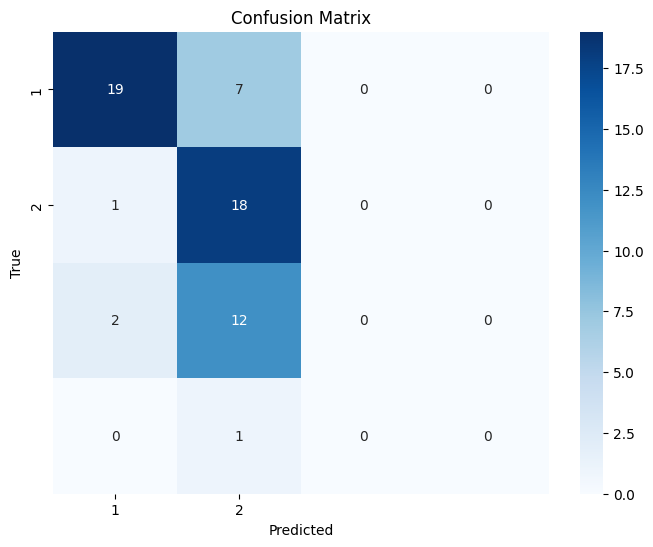

accuracy for class 1: 0.731
accuracy for class 2: 0.947
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.632768361581921
precision on train set:  0.5569679849340867
recall on train set:  0.632768361581921
f1 score on train set:  0.5602919424844208
balanced accuracy on train set:  0.3632277834525025
logistic loss on train set:  nan
mse on train set:  0.5536723163841808

Scorecard table:
       Feature                                          Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.017184871752215[ -1.176727
1   pLBC Value      [0.017184871752215, 0.0993852234928652[  0.240588
2   pLBC Value     [0.0993852234928652, 0.1356957706625177[  0.348351
3   pLBC Value     [0.1356957706625177, 0.3087053362016711[  0.544063
4   pLBC Value                    [0.3087053362016711, inf[  0.043724
5   pBCE Value     [0.0008385739212827, 0.0048510800817259[ -0.105801
6   pBCE Value     [0.0048510800817259, 0.0161

In [73]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_caim_1ook_mm_model, aesthetic_cmavioso_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None, #{'C': 0.25, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

ola
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x1092552d0>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x17b1cf850>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1093b9290>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5941269841269842
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x1092552d0>, 'penalty': <skglm.penalties.separable.SCAD object at 0x10b6af190>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1093b9290>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6163492063492063
best parameters:  {'datafit': <skglm.datafits.single_task.Huber object at 0x1092552d0>, 'penalty': <skglm.penalties.separable.SCAD object at 0x10b6af190>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x1093b9290>}
best score:  0.6163492063492063
Execution time: 1.1067030429840088 seconds

Evaluating the model on the test set...
test predictions:  [ 7.1

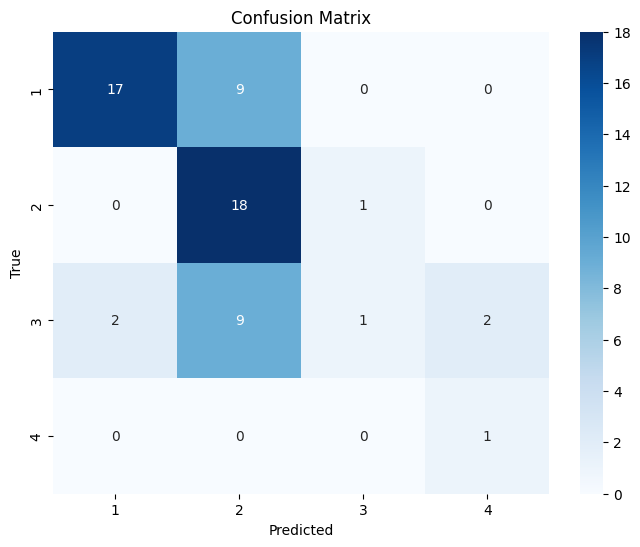

accuracy for class 1: 0.654
accuracy for class 2: 0.947
accuracy for class 3: 0.071
accuracy for class 4: 1.000

Evaluating the model on the train set...
accuracy on train set:  0.6892655367231638
precision on train set:  0.7210178250777384
recall on train set:  0.6892655367231638
f1 score on train set:  0.6653312234550173
balanced accuracy on train set:  0.5291368743615934
logistic loss on train set:  nan
mse on train set:  0.3785310734463277

Scorecard table:
       Feature                                          Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.017184871752215[ -0.217332
1   pLBC Value     [0.0993852234928652, 0.1356957706625177[  0.214936
2   pLBC Value     [0.1356957706625177, 0.3087053362016711[  0.363751
3   pBCE Value     [0.0161156525190024, 0.3542441933765806[  0.132072
4   pBCE Value     [0.3542441933765806, 1.4011041290620987[  0.320337
5   cX2b Value        [0.00365925533697, 0.019452191889286[  0.082739
6   cX2b Value     [0.0305269956588745, 0.06

In [74]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_caim_1ook_beyondl1_model, aesthetic_cmavioso_caim_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-10}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6163492063492063
testing parameters: {'alpha': 2.1544346900318866e-09}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6163492063492063
testing parameters: {'alpha': 4.641588833612773e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6163492063492063
testing parameters: {'alpha': 1e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6163492063492063
testing parameters: {'alpha': 2.1544346900318823e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6163492063492063
testing parameters: {'alpha': 0.00046415888336127724}
  fold  1
AdaptiveLasso infeasible: minimize 0.001182033096926714 @ quad_over_lin([[0.00 1.00 ... 0.00 0.00]
 [0.00 1.00 ... 1.00 0.00]
 ...
 [0.00 1.00 ... 1.00 0.00]
 [0.00 1.00 ... 0.00 1.00]] @ var18361 + -[1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 

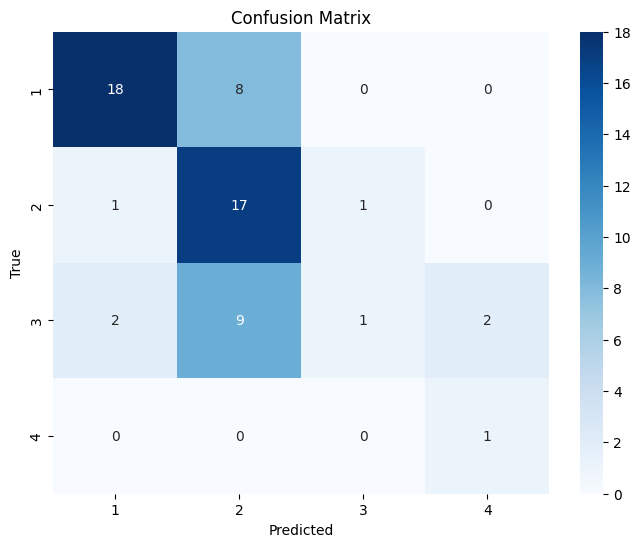

accuracy for class 1: 0.692
accuracy for class 2: 0.895
accuracy for class 3: 0.071
accuracy for class 4: 1.000

Evaluating the model on the train set...
accuracy on train set:  0.6949152542372882
precision on train set:  0.7182315487400233
recall on train set:  0.6949152542372882
f1 score on train set:  0.6734552157481045
balanced accuracy on train set:  0.5354187946884575
logistic loss on train set:  nan
mse on train set:  0.3728813559322034

Scorecard table:
       Feature                                          Bin    Points
0   pLBC Value  [2.2773158381800327e-05, 0.017184871752215[ -0.082594
1   pLBC Value      [0.017184871752215, 0.0993852234928652[  0.127413
2   pLBC Value     [0.0993852234928652, 0.1356957706625177[  0.332879
3   pLBC Value     [0.1356957706625177, 0.3087053362016711[  0.487237
4   pLBC Value                    [0.3087053362016711, inf[  0.101254
5   pBCE Value     [0.0008385739212827, 0.0048510800817259[  0.027485
6   pBCE Value     [0.0048510800817259, 0.01

In [75]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_caim_1ook_adaptivelasso_model, aesthetic_cmavioso_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None, #{'alpha': 0.003593813663804626},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6103174603174604
testing parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6103174603174604
testing parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.616031746031746
testing parameters: {'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6217460317460317
testing parameters: {'C': 1.6666666666666667, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6160317460317459
testing parameters: {'C': 1.1111111111111112, 'penalty': 'l1', 'solver': 'liblinear'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6103174603174603
testing parameters: {'C': 1.0101010101010

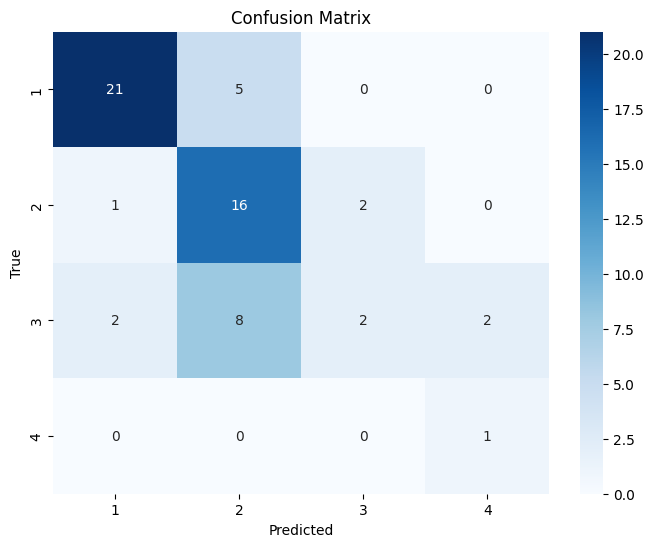

accuracy for class 1: 0.808
accuracy for class 2: 0.842
accuracy for class 3: 0.143
accuracy for class 4: 1.000

Evaluating the model on the train set...
accuracy on train set:  0.711864406779661
precision on train set:  0.7183909728512763
recall on train set:  0.711864406779661
f1 score on train set:  0.702875803720868
balanced accuracy on train set:  0.5781920326864147
logistic loss on train set:  nan
mse on train set:  0.3389830508474576

Scorecard table:
       Feature                                       Bin    Points
0   pLBC Value   [0.017184871752215, 0.0993852234928652[  2.691587
1   pLBC Value  [0.0993852234928652, 0.1356957706625177[  1.776118
2   pLBC Value  [0.1356957706625177, 0.3087053362016711[  0.894128
3   pLBC Value                 [0.3087053362016711, inf[ -1.617906
4   pBCE Value  [0.0161156525190024, 0.3542441933765806[  1.529696
5   pBCE Value  [0.3542441933765806, 1.4011041290620987[  1.607939
6   cX2b Value   [0.019452191889286, 0.0305269956588745[ -0.808547
7

In [76]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_caim_diff_ml_model, aesthetic_cmavioso_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='ML',
                 params=None, #{'C': 2.5, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30999999999999994
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30999999999999994
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30999999999999994
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30999999999999994
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3212698412698412
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.38317460317460317
testing parameters: {'C': 0.0625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6044444444444445
testing parameters: {'C': 0.125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5987301587301588
testing parameters: {'C': 0.25}
  fold 

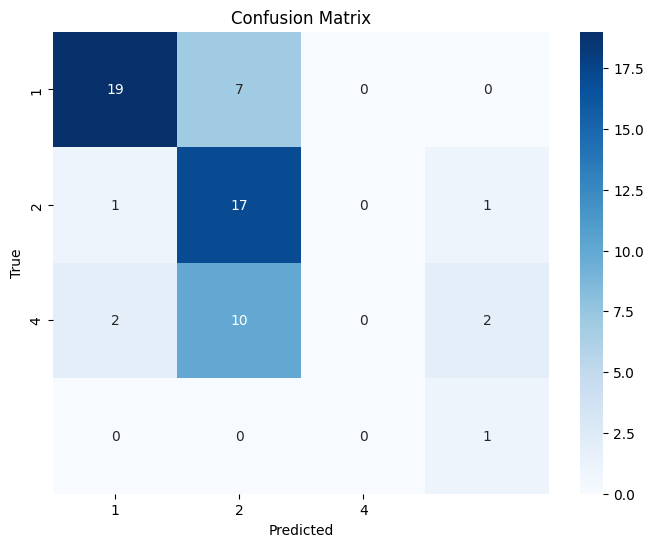

accuracy for class 1: 0.731
accuracy for class 2: 0.895
accuracy for class 3: 0.000
accuracy for class 4: 1.000

Evaluating the model on the train set...
accuracy on train set:  0.655367231638418
precision on train set:  0.6073237078886797
recall on train set:  0.655367231638418
f1 score on train set:  0.6014426957223568
balanced accuracy on train set:  0.47405515832482126
logistic loss on train set:  nan
mse on train set:  0.4632768361581921

Scorecard table:
       Feature                                          Bin        Points
0   pLBC Value  [2.2773158381800327e-05, 0.017184871752215[  8.881784e-16
1   pLBC Value      [0.017184871752215, 0.0993852234928652[  2.000000e+00
2   pLBC Value     [0.0993852234928652, 0.1356957706625177[  4.870520e-01
3   pLBC Value     [0.1356957706625177, 0.3087053362016711[  1.025864e+00
4   pLBC Value                    [0.3087053362016711, inf[ -2.757685e-01
5   pBCE Value     [0.0008385739212827, 0.0048510800817259[  8.881784e-16
6   pBCE Value   

In [77]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_caim_diff_mm_model, aesthetic_cmavioso_caim_diff_mm_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='MM',
                 params=None,#{'C': 0.5, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


In [78]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_caim_diff_beyondl1_model, aesthetic_cmavioso_caim_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


ola
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x1779ce490>, 'penalty': <skglm.penalties.separable.MCPenalty object at 0x109223550>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17aa5cdd0>}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6219047619047618
testing parameters: {'datafit': <skglm.datafits.single_task.Huber object at 0x1779ce490>, 'penalty': <skglm.penalties.separable.SCAD object at 0x17aa5d850>, 'solver': <skglm.solvers.anderson_cd.AndersonCD object at 0x17aa5cdd0>}
  fold  1
  fold  2
  fold  3
  fold  4
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/mafaldacosta/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/wk/c98ddbnx3pd7fpdy174bcjmr0000gn/T/ipykernel_25821/2530310356.py", line 4, in <module>
    aesthetic_cmavioso_caim_diff_beyondl1_model, aesthetic_cmavioso_caim_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                                                                                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mafaldacosta/Documents/opt-ordinal-scorecards/scorecard.py", line 128, in fit
    elif model_method == "BEYOND_L1": self.beyond_l1()
                                      ^^^^^^^^^^^^^^^^
  File "/Users/mafaldacosta/Documents/opt-ordinal-sc

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5638297872340424
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5638297872340424
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5638297872340424
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5638297872340424
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
AdaptiveLasso infeasible: minimize 0.0004432624113475177 @ quad_over_lin([[1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 1.00 0.00]
 ...
 [1.00 1.00 ... 1.00 0.00]
 [1.00 1.00 ... 0.00 1.00]] @ var7831 + -[1. 1. 0. ... 1. 1. 0.], 1.0) + norm1(param7833 @ var7831) is infeasible.
  fold  3
  fold  4
  fold  5
  mean score: 0.4468085106382979
testing parameters: {'alpha': 0.003593813663804626}
  fold 

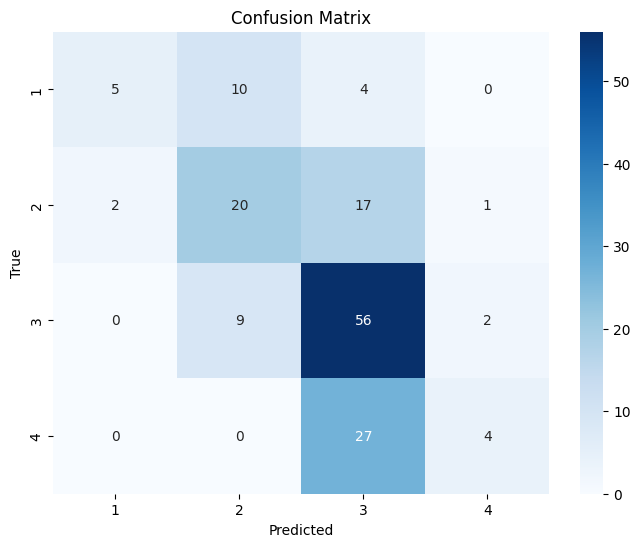

accuracy for class 1: 0.263
accuracy for class 2: 0.500
accuracy for class 3: 0.836
accuracy for class 4: 0.129

Evaluating the model on the train set...
accuracy on train set:  0.6553191489361702
precision on train set:  0.7101001802307891
recall on train set:  0.6553191489361702
f1 score on train set:  0.6279308584496935
balanced accuracy on train set:  0.5981359053793662
logistic loss on train set:  0.01505062649821998
mse on train set:  0.3574468085106383

Scorecard table:
           Feature                                       Bin        Points
0        BRA Value  [0.1023505717256087, 0.5855899119784602[  8.830783e-02
1        BRA Value  [0.5855899119784602, 3.3868195393092537[  7.987903e-21
2        BRA Value   [3.3868195393092537, 6.001724858006494[  4.351984e-20
3        BRA Value   [6.001724858006494, 24.075530326533293[  2.347915e-19
4        BRA Value                 [24.075530326533293, inf[  4.281585e-21
..             ...                                       ...        

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_caim_diff_adaptivelasso_model, aesthetic_cmavioso_caim_diff_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='ADAPTIVE_LASSO',
                 params=None, #{'alpha': 0.003593813663804626},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.48936170212765956
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.48723404255319147
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4829787234042554
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.48085106382978726
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.46808510638297873
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5021276595744681
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.451063829787234
testing p

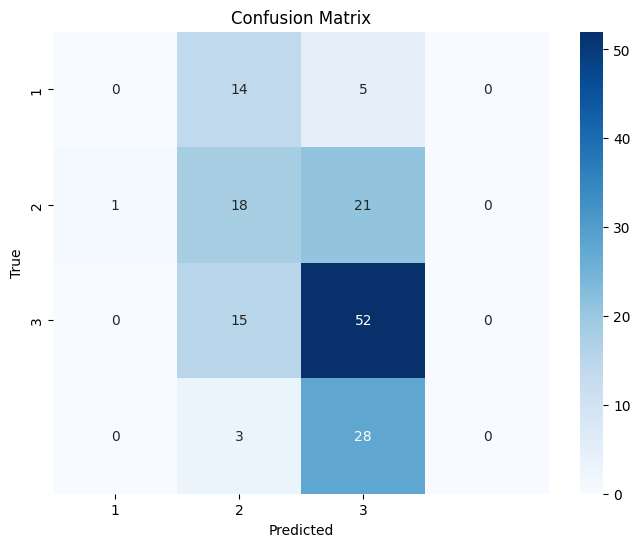

accuracy for class 1: 0.000
accuracy for class 2: 0.450
accuracy for class 3: 0.776
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.018559391050957417
mse on train set:  0.0

Scorecard table:
            Feature                                        Bin    Points
0         BRA Value  [0.3107575880267366, 0.32186438324311417[  0.063145
1         BRA Value  [0.33380354583410704, 0.3640572276620645[ -0.048212
2         BRA Value  [0.48549921773194515, 0.5352024592342317[  0.002673
3         BRA Value   [0.5526533705017165, 0.5671751922000701[  0.014776
4         BRA Value   [0.5773645017271535, 0.5824289071993816[  0.975433
...             ...                                        ...       ...
5835  cEMDLab Value   [0.5160786385865728, 0.5254261800611874[  0.000015
5836  cEMDLab Value   [

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_infbins_1ook_ml_model, aesthetic_cmavioso_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None, #{'C': 10.0, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.13404255319148933
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.19148936170212766
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.13404255319148933
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.19148936170212766
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.40212765957446817
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2702127659574468
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  

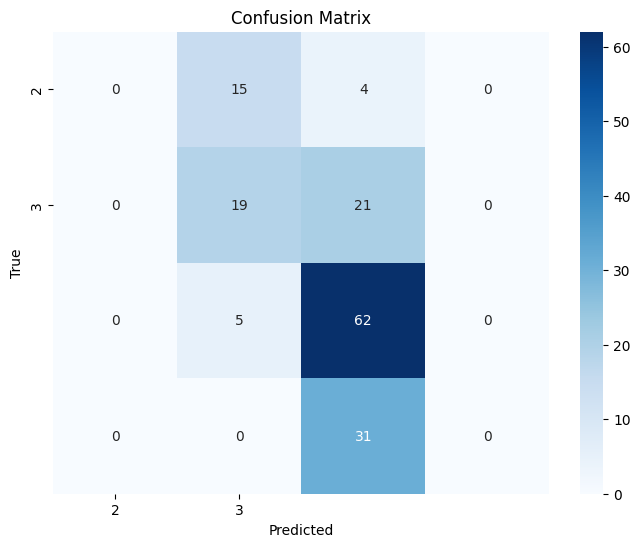

accuracy for class 1: 0.000
accuracy for class 2: 0.475
accuracy for class 3: 0.925
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.018559391050957417
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value  [0.13273382145639526, 0.23406307365458873[  0.029005
1          BRA Value   [0.23406307365458873, 0.3107575880267366[  0.029005
2          BRA Value   [0.3107575880267366, 0.32186438324311417[  0.119896
3          BRA Value  [0.32186438324311417, 0.33380354583410704[  0.029015
4          BRA Value   [0.33380354583410704, 0.3640572276620645[ -0.061898
...              ...                                         ...       ...
10313  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.029002
10314  

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_infbins_1ook_mm_model, aesthetic_cmavioso_infbins_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None, #{'C': 0.25, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


Execution time: 0.1720731258392334 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             3           3
1             2           3
2             4           3
3             3           3
4             2           3
..          ...         ...
152           4           3
153           3           3
154           4           3
155           3           3
156           3           3

[157 rows x 2 columns]
accuracy:  0.4267515923566879
precision:  0.18211692157896872
recall:  0.4267515923566879
f1 score:  0.2552888989990901
balanced accuracy:  0.25
logistic loss:  0.0007114729267250941
mse:  0.9363057324840764
number of far off predictions:  0
number of features:  10320
number of non-zero weights:  2
model size (non-zero weights / all weights):  0.0001937984496124031


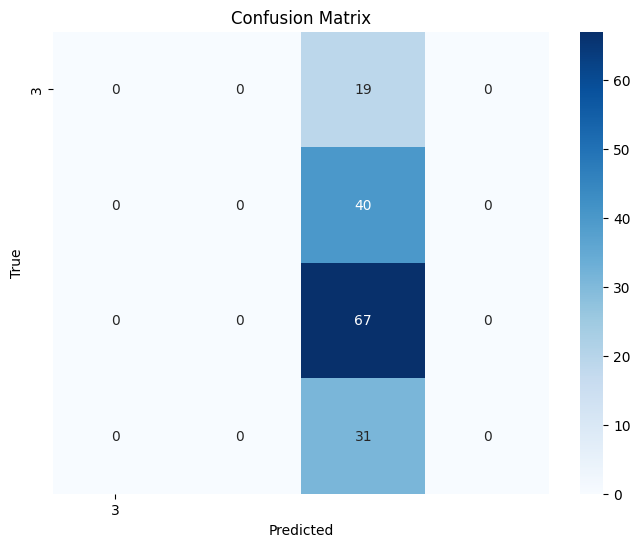

accuracy for class 1: 0.000
accuracy for class 2: 0.000
accuracy for class 3: 1.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.4021276595744681
precision on train set:  0.1617066545948393
recall on train set:  0.4021276595744681
f1 score on train set:  0.23065896103057504
balanced accuracy on train set:  0.25
logistic loss on train set:  0.005899580930750794
mse on train set:  0.9106382978723404

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []

SBC columns weights:
               Feature    Weight
10318  featsbcol1-bin1 -0.302128
10319  featsbcol2-bin1 -0.704255


In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_infbins_1ook_beyondl1_model, aesthetic_cmavioso_infbins_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 12.703982830047607 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             3           3
1             2           2
2             4           3
3             3           3
4             2           3
..          ...         ...
152           4           3
153           3           3
154           4           3
155           3           3
156           3           3

[157 rows x 2 columns]
accuracy:  0.5222929936305732
precision:  0.365249035983708
recall:  0.5222929936305732
f1 score:  0.4046194428360033
balanced accuracy:  0.34375
logistic loss:  0.0007114729267250941
mse:  0.6305732484076433
number of far off predictions:  0
number of features:  10320
number of non-zero weights:  10320
model size (non-zero weights / all weights):  1.0


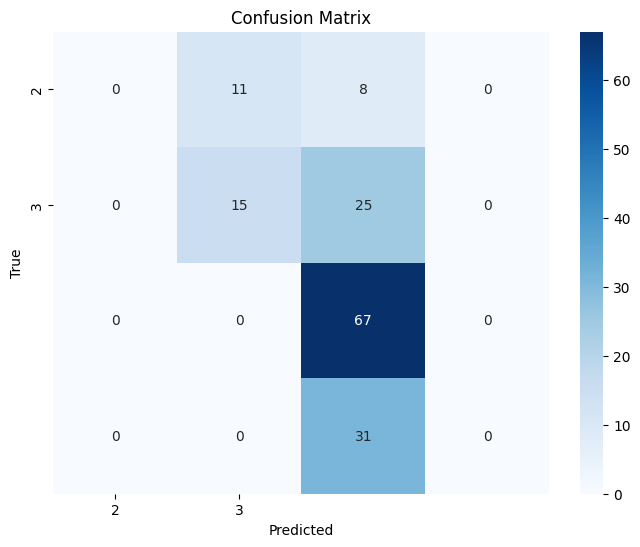

accuracy for class 1: 0.000
accuracy for class 2: 0.375
accuracy for class 3: 1.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.018559391050957417
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value  [0.13273382145639526, 0.23406307365458873[  0.045551
1          BRA Value   [0.23406307365458873, 0.3107575880267366[  0.045551
2          BRA Value   [0.3107575880267366, 0.32186438324311417[  0.060703
3          BRA Value  [0.32186438324311417, 0.33380354583410704[  0.045551
4          BRA Value   [0.33380354583410704, 0.3640572276620645[  0.030400
...              ...                                         ...       ...
10313  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.045551
10314  

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_infbins_1ook_adaptivelasso_model, aesthetic_cmavioso_infbins_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None, #{'alpha': 1e-08},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_infbins_diffcoding_ml_model, aesthetic_cmavioso_infbins_diffcoding_ml_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='ML',
                 params=None, #{'C': 10.0, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_infbins_diffcoding_mm_model, aesthetic_cmavioso_infbins_diffcoding_mm_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='MM',
                 params=None, #{'C': 10.0, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_infbins_diffcoding_beyondl1_model, aesthetic_cmavioso_infbins_diffcoding_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='BEYOND_L1',
                 params=None, #{'C': 10.0, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_cmavioso_infbins_diffcoding_adaptivelasso_model, aesthetic_cmavioso_infbins_diffcoding_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_cmavioso_X, aesthetic_evaluation_data_cmavioso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='ADAPTIVE_LASSO',
                 params=None, #{'C': 10.0, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


## wine quality dataset
model wine quality, score between 0 and 10, based on physicochemical tests

https://archive.ics.uci.edu/dataset/186/wine+quality

https://archive.ics.uci.edu/dataset/109/wine ???

#### load dataset

Number of observations: 178
Number of features: 13
Number of target classes: 3
class
2    71
1    59
3    48
Name: count, dtype: int64


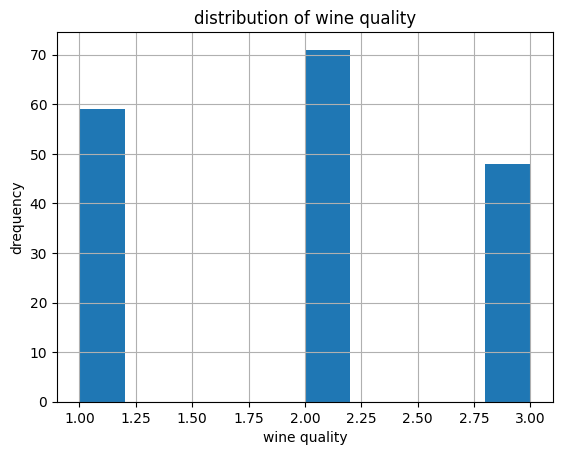

In [ ]:
# fetch dataset 
wine_quality_data = fetch_ucirepo(id=186) 
#wine_quality_data = fetch_ucirepo(id=109) 

# data (as pandas dataframes) 
wine_quality_X = wine_quality_data.data.features 
wine_quality_y = wine_quality_data.data.targets 
  
# metadata 
#print(wine_quality_data.metadata) 
  
# variable information 
#print(wine_quality_data.variables) 

wine_quality_y = pd.Series(wine_quality_y['class'], name='class')
wine_quality_y.value_counts()
wine_quality_y.hist()
plt.xlabel('wine quality')
plt.ylabel('drequency')
plt.title('distribution of wine quality')


# num of observations
num_observations = len(wine_quality_X)
print(f'Number of observations: {num_observations}')

# num of features
num_features = len(wine_quality_X.columns)
print(f'Number of features: {num_features}')

# number of target classes
num_classes = len(wine_quality_y.unique())
print(f'Number of target classes: {num_classes}')

# distribution of target variable
print(wine_quality_y.value_counts())

Number of observations: 6497
Number of features: 11
Number of target classes: 7
quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


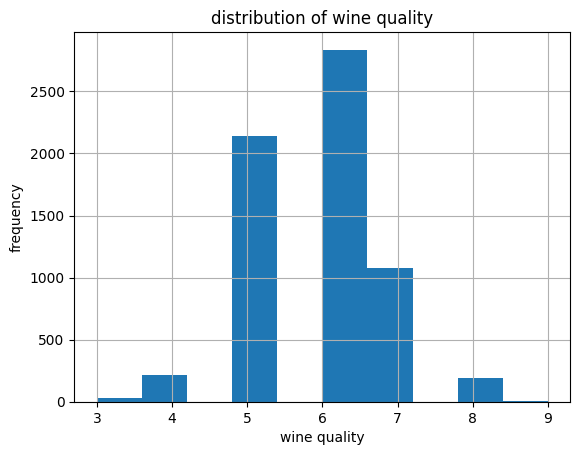

In [ ]:
# fetch dataset 
wine_quality_data = fetch_ucirepo(id=186) 
#wine_quality_data = fetch_ucirepo(id=109) 

# data (as pandas dataframes) 
wine_quality_X = wine_quality_data.data.features 
wine_quality_y = wine_quality_data.data.targets 
  
# metadata 
#print(wine_quality_data.metadata) 
  
# variable information 
#print(wine_quality_data.variables) 

wine_quality_y = pd.Series(wine_quality_y['quality'], name='quality')
wine_quality_y.value_counts()
wine_quality_y.hist()
plt.xlabel('wine quality')
plt.ylabel('frequency')
plt.title('distribution of wine quality')


# num of observations
num_observations = len(wine_quality_X)
print(f'Number of observations: {num_observations}')

# num of features
num_features = len(wine_quality_X.columns)
print(f'Number of features: {num_features}')

# number of target classes
num_classes = len(wine_quality_y.unique())
print(f'Number of target classes: {num_classes}')

# distribution of target variable
print(wine_quality_y.value_counts())

In [ ]:
wine_quality_y = wine_quality_y.map({3: 1, 4: 1, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3})

In [ ]:
categorical_columns = wine_quality_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    wine_quality_X[col] = wine_quality_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {wine_quality_X[col].unique()}")

K = 3  # number of classes

Categorical columns: []


#### CAIM & 1ook

Execution time: 0.08862829208374023 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1]
    True Value  Prediction
0            1           1
1            1           1
2            3           3
3            1           1
4            2           2
5            1           1
6            2           2
7            3           3
8            2           1
9            3           3
10           1           1
11           3           3
12           1           1
13           2           3
14           1           1
15           2           1
16           2           2
17           2           2
18           1           1
19           2           1
20           1           1
21           2           1
22           2           3
23           3           3
24           3           3
25        

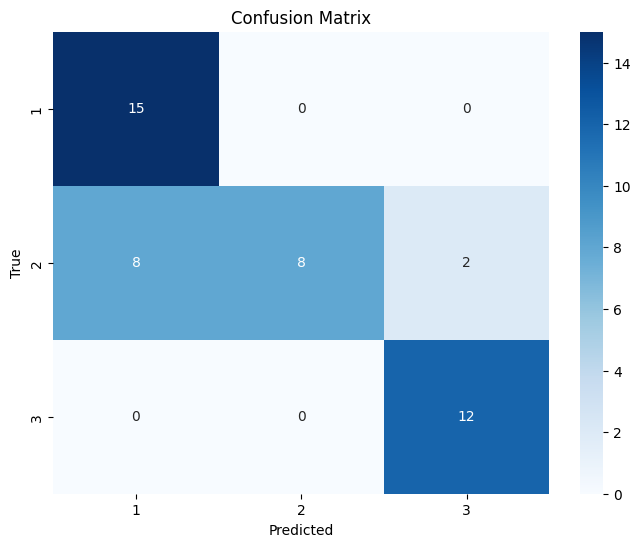

accuracy for class 1: 1.000
accuracy for class 2: 0.444
accuracy for class 3: 1.000

Evaluating the model on the train set...
accuracy on train set:  0.8571428571428571
precision on train set:  0.8858801138183806
recall on train set:  0.8571428571428571
f1 score on train set:  0.8495690996274993
balanced accuracy on train set:  0.880503144654088
logistic loss on train set:  0.12082686115204816
mse on train set:  0.14285714285714285

Scorecard table:
            Feature    Weight
0  featAlcohol-bin1  0.000000
1  featAlcohol-bin2  0.000000
2  featAlcohol-bin3 -0.041346
3  featAlcohol-bin4  0.000000
              Feature    Weight
4  featMalicacid-bin1  0.000000
5  featMalicacid-bin2 -0.266297
6  featMalicacid-bin3  0.148246
7  featMalicacid-bin4  0.000000
         Feature  Weight
8   featAsh-bin1     0.0
9   featAsh-bin2     0.0
10  featAsh-bin3     0.0
11  featAsh-bin4     0.0
                       Feature    Weight
12  featAlcalinity_of_ash-bin1 -0.264114
13  featAlcalinity_of_ash-bin

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_ml_model, wine_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None, #{'C': 1.0101010101010102, 'class_weight': 'balanced'},
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2934472934472934
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.33048433048433046
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6404558404558405
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5931623931623932
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6555555555555556
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6247863247863249
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  

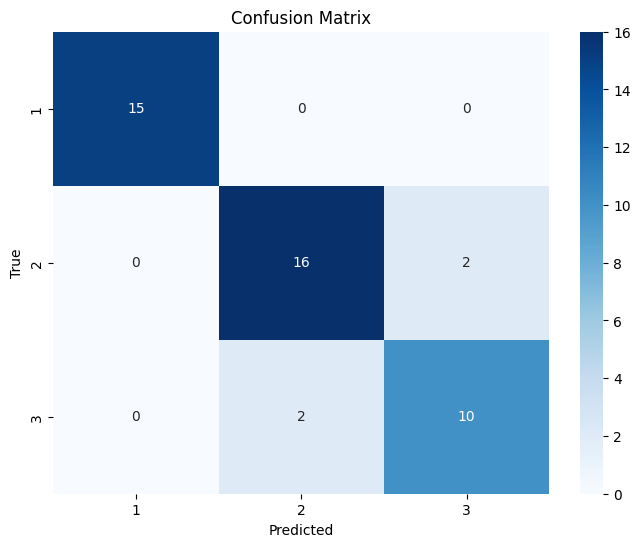

accuracy for class 1: 1.000
accuracy for class 2: 0.889
accuracy for class 3: 0.833

Evaluating the model on the train set...
accuracy on train set:  0.9774436090225563
precision on train set:  0.978090469087699
recall on train set:  0.9774436090225563
f1 score on train set:  0.9774961968895077
balanced accuracy on train set:  0.9798456260720411
logistic loss on train set:  0.1092648176484237
mse on train set:  0.022556390977443608

Scorecard table:
            Feature    Weight
0  featAlcohol-bin1 -0.202653
1  featAlcohol-bin2  0.591021
2  featAlcohol-bin3 -0.388368
3  featAlcohol-bin4  0.000000
              Feature    Weight
4  featMalicacid-bin1  0.173002
5  featMalicacid-bin2 -0.307034
6  featMalicacid-bin3  0.251153
7  featMalicacid-bin4 -0.117121
         Feature    Weight
8   featAsh-bin1 -0.070489
9   featAsh-bin2 -0.195335
10  featAsh-bin3  0.164093
11  featAsh-bin4  0.101731
                       Feature    Weight
12  featAlcalinity_of_ash-bin1 -0.802367
13  featAlcalinity_

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_mm_model, wine_caim_1ook_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.7309839725494385 seconds

Evaluating the model on the test set...
test predictions:  [ 0.25945611 -0.13901714  0.32447541 -0.07399784  1.1700302   0.77155695
  0.37614965 -0.0223236   0.760972    0.36249875  0.26171656 -0.13675669
  0.72062723  0.32215398  1.09011112  0.69163787  0.51220067  0.11372743
  0.98230493  0.58383168  0.26171656 -0.13675669  1.07290693  0.67443368
  0.32447541 -0.07399784  0.90008144  0.50160819  0.24837151 -0.15010174
  0.4897866   0.09131335  0.760972    0.36249875  0.77230148  0.37382823
  0.25945611 -0.13901714  0.55254545  0.1540722   0.24837151 -0.15010174
  0.48752615  0.0890529   1.06036261  0.66188936  1.27783639  0.87936314
  1.25542232  0.85694907  1.27783639  0.87936314  0.69821316  0.29973991
  0.56387492  0.16540167  0.69821316  0.29973991  0.26171656 -0.13675669
  0.19669726 -0.20177599  0.4897866   0.09131335  1.09011112  0.69163787
  0.26171656 -0.13675669  0.24837151 -0.15010174  0.19669726 -0.20177599
  0.96980331  0.57133

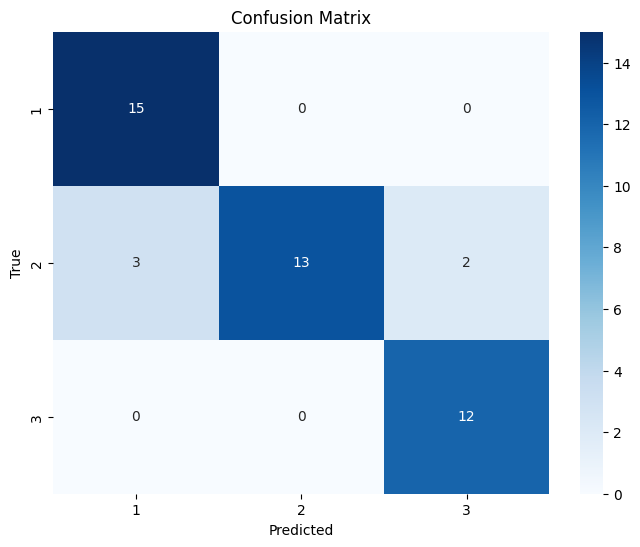

accuracy for class 1: 1.000
accuracy for class 2: 0.722
accuracy for class 3: 1.000

Evaluating the model on the train set...
accuracy on train set:  0.9323308270676691
precision on train set:  0.9365814597203792
recall on train set:  0.9323308270676691
f1 score on train set:  0.9315565206906464
balanced accuracy on train set:  0.9421097770154375
logistic loss on train set:  0.11417209959391976
mse on train set:  0.06766917293233082

Scorecard table:
            Feature  Weight
0  featAlcohol-bin1     0.0
1  featAlcohol-bin2     0.0
2  featAlcohol-bin3     0.0
3  featAlcohol-bin4     0.0
              Feature    Weight
4  featMalicacid-bin1  0.000000
5  featMalicacid-bin2 -0.062759
6  featMalicacid-bin3  0.000000
7  featMalicacid-bin4  0.000000
         Feature  Weight
8   featAsh-bin1     0.0
9   featAsh-bin2     0.0
10  featAsh-bin3     0.0
11  featAsh-bin4     0.0
                       Feature    Weight
12  featAlcalinity_of_ash-bin1  0.000000
13  featAlcalinity_of_ash-bin2  0.0650

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_beyondl1_model, wine_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
AdaptiveLasso infeasible: minimize 6.415191172696946e-05 @ quad_over_lin([[0.00 1.00 ... 0.00 0.00]
 [0.00 1.00 ... 0.00 1.00]
 ...
 [0.00 1.00 ... 0.00 0.00]
 [0.00 1.00 ... 0.00 1.00]] @ var14671 + -[1. 0. 1. ... 0. 1. 0.], 1.0) + norm1(param14673 @ var14671) is infeasible.
  fold  2
  fold  3
  fold  4
AdaptiveLasso infeasible: minimize 6.413545407901488e-05 @ quad_over_lin([[0.00 1.00 ... 0.00 0.00]

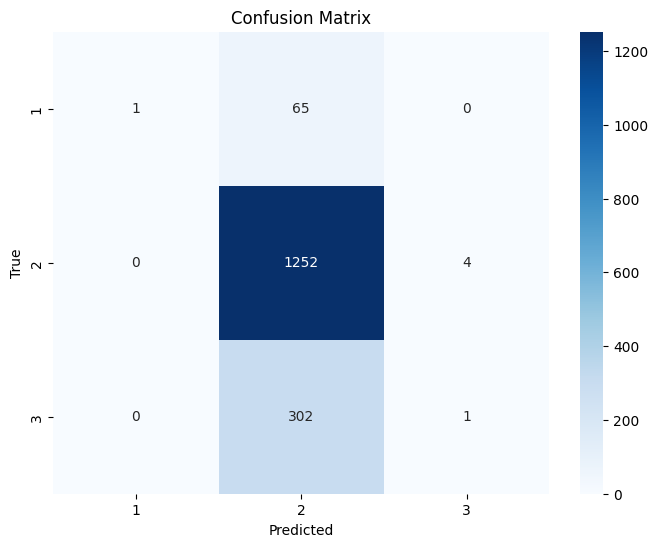

accuracy for class 1: 0.015
accuracy for class 2: 0.997
accuracy for class 3: 0.003

Evaluating the model on the train set...
accuracy on train set:  0.7645730706075534
precision on train set:  0.7758183898062169
recall on train set:  0.7645730706075534
f1 score on train set:  0.6647653110701118
balanced accuracy on train set:  0.33925334860416206
logistic loss on train set:  0.01946043379710117
mse on train set:  0.23542692939244664

Scorecard table:
                 Feature                 Bin    Points
0          fixed_acidity          [3.8, 5.6[  0.060553
1          fixed_acidity          [5.6, 7.4[  0.048468
2          fixed_acidity         [7.4, 15.6[  0.044429
3          fixed_acidity         [15.6, inf[  0.128501
4       volatile_acidity       [0.08, 0.115[  0.330601
5       volatile_acidity       [0.115, 0.19[  0.187976
6       volatile_acidity        [0.19, 1.58[  0.135856
7       volatile_acidity         [1.58, inf[ -0.370245
8            citric_acid         [0.0, 0.26[  0.0

In [ ]:
start_time = time.time()

scorecard = Scorecard()   
wine_caim_1ook_adaptivelasso_model, wine_caim_1ook_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7740095824777549
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7748309377138947
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.77380424366872
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7746255989048597
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7740095824777549
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7742151318906967
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7742147106828832
testing parame

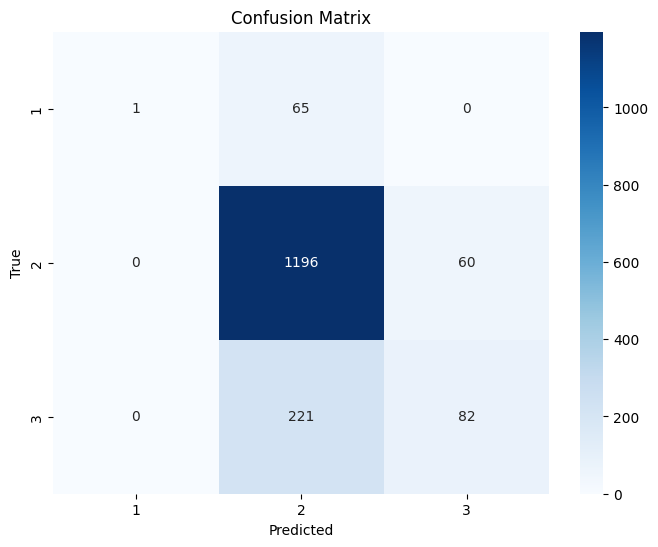

accuracy for class 1: 0.015
accuracy for class 2: 0.952
accuracy for class 3: 0.271

Evaluating the model on the train set...
accuracy on train set:  0.7799671592775042
precision on train set:  0.7643434057194585
recall on train set:  0.7799671592775042
f1 score on train set:  0.737431462244286
balanced accuracy on train set:  0.41038463399859704
logistic loss on train set:  0.01788863499693147
mse on train set:  0.22126436781609196

Scorecard table:
                 Feature                 Bin    Points
0          fixed_acidity          [3.8, 5.6[  0.988836
1          fixed_acidity          [5.6, 7.4[ -0.210283
2          fixed_acidity         [7.4, 15.6[ -0.057703
3          fixed_acidity         [15.6, inf[  0.595719
4       volatile_acidity       [0.08, 0.115[  0.290067
5       volatile_acidity       [0.115, 0.19[ -1.284804
6       volatile_acidity        [0.19, 1.58[ -0.612830
7       volatile_acidity         [1.58, inf[ -9.813006
8            citric_acid         [0.0, 0.26[  0.19

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_ml_model, wine_caim_diffcod_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

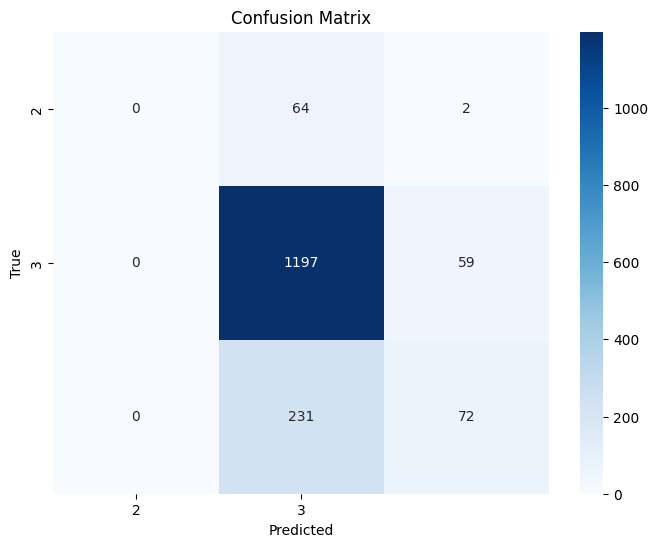

accuracy for class 1: 0.000
accuracy for class 2: 0.953
accuracy for class 3: 0.238

Evaluating the model on the train set...
accuracy on train set:  0.7748357963875205
precision on train set:  0.7185131474502372
recall on train set:  0.7748357963875205
f1 score on train set:  0.726809066988052
balanced accuracy on train set:  0.3950209480931326
logistic loss on train set:  0.018188430734627187
mse on train set:  0.22824302134646962

Scorecard table:
                 Feature                 Bin        Points
0          fixed_acidity          [3.8, 5.6[  2.742251e-14
1          fixed_acidity          [5.6, 7.4[  1.616017e-04
2          fixed_acidity         [7.4, 15.6[  2.508656e-05
3       volatile_acidity       [0.08, 0.115[  2.742251e-14
4       volatile_acidity       [0.115, 0.19[ -1.875000e-01
5       volatile_acidity        [0.19, 1.58[  1.010174e-05
6       volatile_acidity         [1.58, inf[ -6.250000e-02
7            citric_acid         [0.0, 0.26[  2.742251e-14
8            c

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_mm_model, wine_caim_diffcod_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 7.612917900085449 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              3           2
1              2           2
2              3           2
3              2           2
4              2           2
...          ...         ...
1620           2           2
1621           3           2
1622           3           2
1623           1           2
1624           2           2

[1625 rows x 2 columns]
accuracy:  0.7729230769230769
precision:  0.5974100828402368
recall:  0.7729230769230769
f1 score:  0.6739266814407392
balanced accuracy:  0.3333333333333333
logistic loss:  0.020088561028637097
mse:  0.22707692307692307
number of far off predictions:  0
number of features:  45
number of non-zero weights:  7
model size (non-zero weights / all weights):  0.15555555555555556


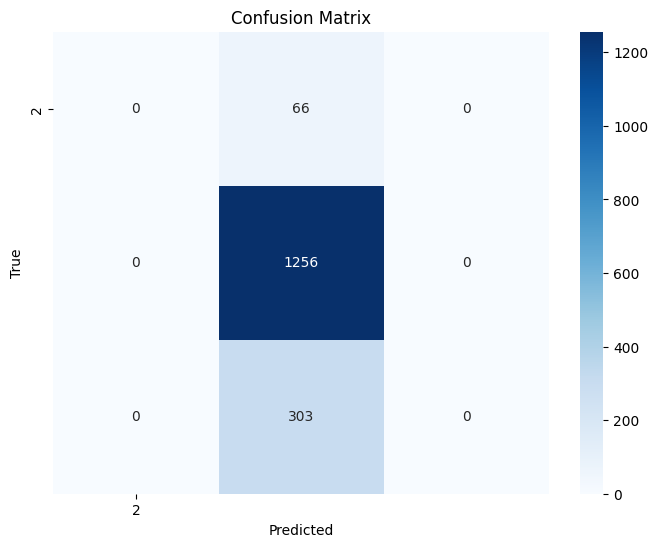

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.763136288998358
precision on train set:  0.5823769955861853
recall on train set:  0.763136288998358
f1 score on train set:  0.6606148364367626
balanced accuracy on train set:  0.3333333333333333
logistic loss on train set:  0.019486284664797838
mse on train set:  0.23686371100164202

Scorecard table:
               Feature                 Bin    Points
0          citric_acid         [0.26, 0.4[  0.054952
1            chlorides      [0.039, 0.611[ -0.034064
2  free_sulfur_dioxide         [1.0, 27.0[  0.928435
3  free_sulfur_dioxide        [27.0, 49.0[  0.047460
4              density  [0.99202, 1.03898[ -0.043164
5              alcohol        [10.8, 12.5[  0.116152

SBC columns weights:
            Feature    Weight
44  featsbcol1-bin1 -0.763489


In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_beyondl1_model, wine_caim_diffcod_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
AdaptiveLasso infeasible: minimize 6.413545407901488e-05 @ quad_over_lin([[1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 0.00 1.00]
 ...
 [1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 0.00 1.00]] @ var17101 + -[1. 0. 1. ... 0. 1. 0.], 1.0) + norm1(param17103 @ var17101) is infeasible.
  fold  5
  mean score: 0.6134388458905913
testing parameters: {'alpha': 0.003593813663804626}
  fo

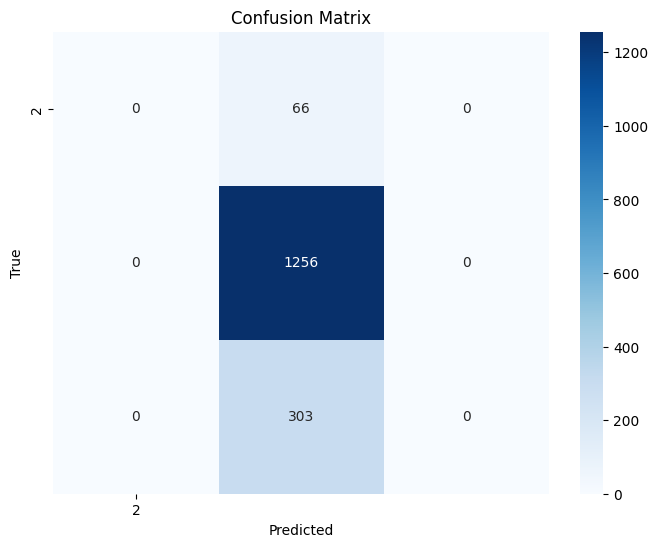

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.763136288998358
precision on train set:  0.5823769955861853
recall on train set:  0.763136288998358
f1 score on train set:  0.6606148364367626
balanced accuracy on train set:  0.3333333333333333
logistic loss on train set:  0.019486284664797838
mse on train set:  0.23686371100164202

Scorecard table:
                 Feature                 Bin        Points
0          fixed_acidity          [3.8, 5.6[  8.219514e-02
1          fixed_acidity          [5.6, 7.4[ -2.393077e-19
2          fixed_acidity         [7.4, 15.6[  3.888534e-20
3          fixed_acidity         [15.6, inf[  8.293043e-22
4       volatile_acidity       [0.08, 0.115[  8.221342e-02
5       volatile_acidity       [0.115, 0.19[ -2.735761e-20
6       volatile_acidity        [0.19, 1.58[ -9.307733e-20
7       volatile_acidity         [1.58, inf[ -3.503849e-22
8            ci

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_adaptivelasso_model, wine_caim_diffcod_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6769274996051177
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6709775180329596
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6826761438424682
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6839073342810509
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7292674143105354
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7268031379982098
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7736010108987521
testing para

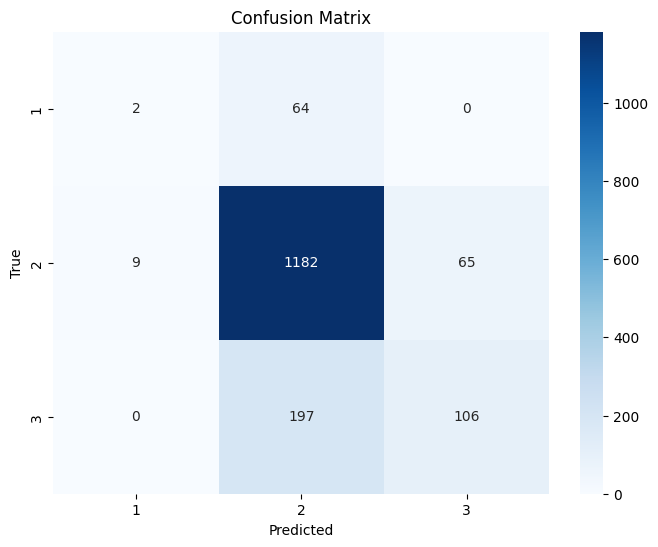

accuracy for class 1: 0.030
accuracy for class 2: 0.941
accuracy for class 3: 0.350

Evaluating the model on the train set...
accuracy on train set:  0.8460591133004927
precision on train set:  0.8521695814639205
recall on train set:  0.8460591133004927
f1 score on train set:  0.8190363818627014
balanced accuracy on train set:  0.5146686561944814
logistic loss on train set:  0.01845655343642461
mse on train set:  0.1539408866995074
Execution time: 66.90707612037659 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_ml_model, wine_infbins_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS', 
                    encoding_method='1_OUT_OF_K',
                    model_method='ML',
                    params=None,
                    use_sbc=True,
                    K=K,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

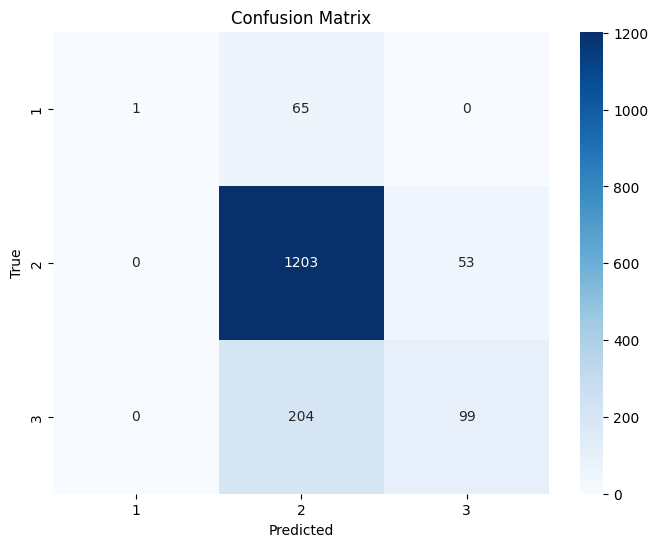

accuracy for class 1: 0.015
accuracy for class 2: 0.958
accuracy for class 3: 0.327

Evaluating the model on the train set...
accuracy on train set:  0.8456486042692939
precision on train set:  0.8594841387392044
recall on train set:  0.8456486042692939
f1 score on train set:  0.8162326232891317
balanced accuracy on train set:  0.5061659816516869
logistic loss on train set:  0.01836008039063468
mse on train set:  0.15435139573070608
Execution time: 3856.37624001503 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_mm_model, wine_infbins_1ook_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='MM',
                    params=None
                    use_sbc=True,
                    K=K,
                    mapping=mapping)
scorecard.evaluate()   

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


Evaluating the model on the test set...
      True Value  Prediction
0              3           2
1              2           2
2              3           2
3              2           2
4              2           2
...          ...         ...
1620           2           2
1621           3           2
1622           3           2
1623           1           2
1624           2           2

[1625 rows x 2 columns]
accuracy:  0.7729230769230769
precision:  0.5974100828402368
recall:  0.7729230769230769
f1 score:  0.6739266814407392
balanced accuracy:  0.3333333333333333
logistic loss:  0.020088561028637097
mse:  0.22707692307692307
number of far off predictions:  0
number of features:  2475
number of non-zero weights:  1
model size (non-zero weights / all weights):  0.00040404040404040404


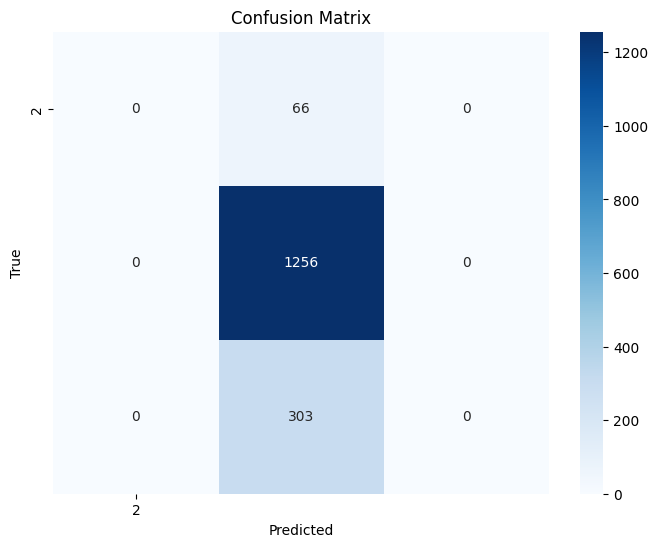

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.763136288998358
precision on train set:  0.5823769955861853
recall on train set:  0.763136288998358
f1 score on train set:  0.6606148364367626
balanced accuracy on train set:  0.3333333333333333
logistic loss on train set:  0.019486284664797838
mse on train set:  0.23686371100164202
Execution time: 0.9144971370697021 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_beyondl1_model, wine_infbins_1ook_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='BEYOND_L1',
                    params=None,
                    use_sbc=True,
                    K=K,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7124384773337545
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7122331385247196
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7122331385247196
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
AdaptiveLasso infeasible: minimize 6.415191172696946e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 1.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 1.00]] @ var19036 + -[1. 0. 1. ... 0. 1. 0.], 1.0) + norm1(param19038 @ var19036) is infeasible.
  fold  2
AdaptiveLasso infeasible: minimize 6.415191172696946e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 1.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 1.00]] @ var19081 + -[1. 0. 1. ... 0. 1. 0.], 1.0) + norm1(param19083 @ var

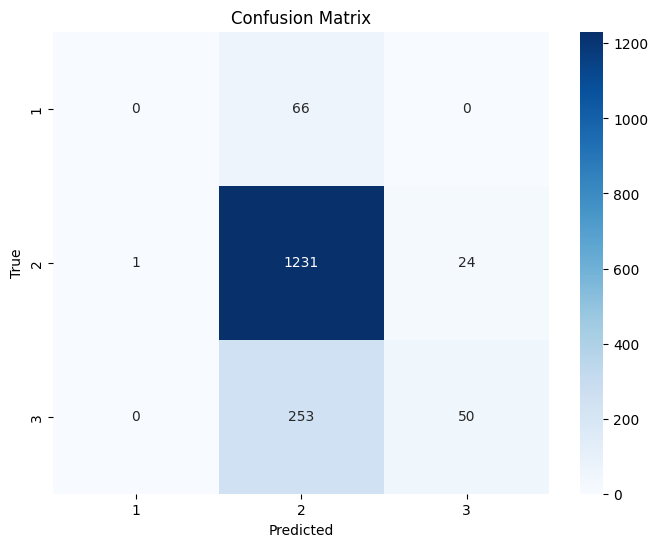

accuracy for class 1: 0.000
accuracy for class 2: 0.980
accuracy for class 3: 0.165

Evaluating the model on the train set...
accuracy on train set:  0.7980295566502463
precision on train set:  0.807718094448521
recall on train set:  0.7980295566502463
f1 score on train set:  0.7390662804305022
balanced accuracy on train set:  0.40487004556661804
logistic loss on train set:  0.01900725531758552
mse on train set:  0.2019704433497537
Execution time: 123.0759220123291 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_adaptivelasso_model, wine_infbins_1ook_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='ADAPTIVE_LASSO',
                    params=None,
                    use_sbc=True,
                    K=K,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

Execution time: 0.4167361259460449 seconds

Evaluating the model on the test set...
test predictions:  [0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1]
    True Value  Prediction
0            1           1
1            1           1
2            3           3
3            1           1
4            2           2
5            1           1
6            2           2
7            3           3
8            2           1
9            3           3
10           1           1
11           3           3
12           1           1
13           2           3
14           1           1
15           2           2
16           2           2
17           2           2
18           1           1
19           2           2
20           1           1
21           2           1
22           2           2
23           3           3
24           3           3
25         

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


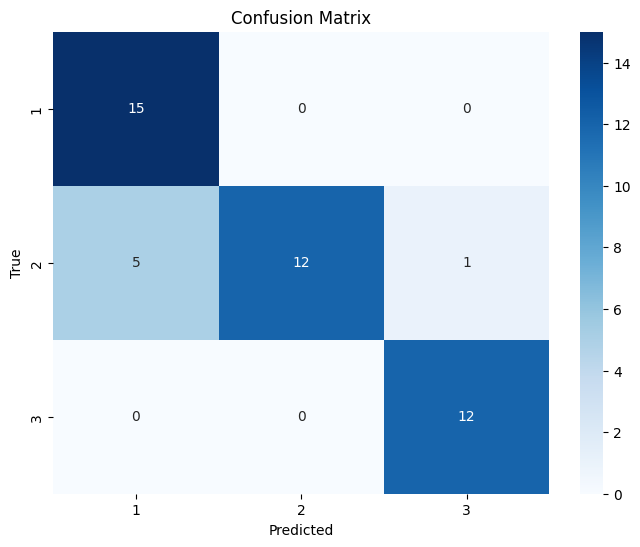

accuracy for class 1: 1.000
accuracy for class 2: 0.667
accuracy for class 3: 1.000

Evaluating the model on the train set...
accuracy on train set:  0.8345864661654135
precision on train set:  0.871827775983119
recall on train set:  0.8345864661654135
f1 score on train set:  0.8234692271506379
balanced accuracy on train set:  0.8616352201257862
logistic loss on train set:  0.12234477035107254
mse on train set:  0.16541353383458646

Scorecard table:
                Feature  Weight
0      featAlcohol-bin1     0.0
1      featAlcohol-bin2     0.0
2      featAlcohol-bin3     0.0
3      featAlcohol-bin4     0.0
4      featAlcohol-bin5     0.0
..                  ...     ...
97    featAlcohol-bin98     0.0
98    featAlcohol-bin99     0.0
99   featAlcohol-bin100     0.0
100  featAlcohol-bin101     0.0
101  featAlcohol-bin102     0.0

[102 rows x 2 columns]
                  Feature  Weight
102    featMalicacid-bin1     0.0
103    featMalicacid-bin2     0.0
104    featMalicacid-bin3     0.0
10

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_ml_model, wine_infbins_diffcod_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7647748117727584
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7694954983414942
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7713433370189017
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

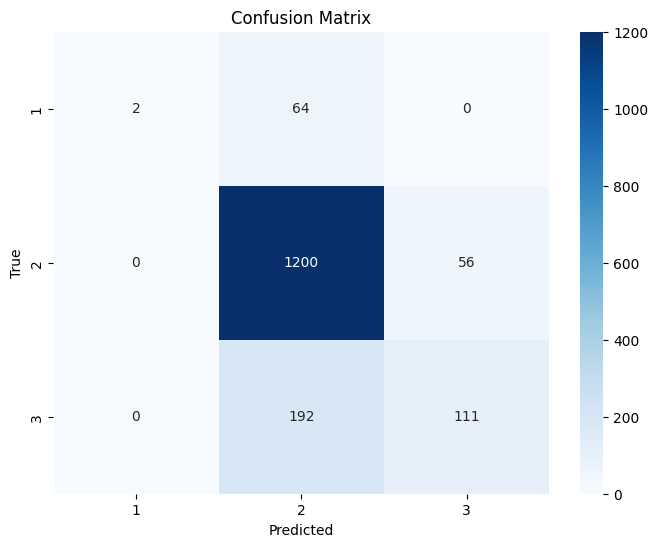

accuracy for class 1: 0.030
accuracy for class 2: 0.955
accuracy for class 3: 0.366

Evaluating the model on the train set...
accuracy on train set:  0.833743842364532
precision on train set:  0.831994336904911
recall on train set:  0.833743842364532
f1 score on train set:  0.8057445316645108
balanced accuracy on train set:  0.49342963880161794
logistic loss on train set:  0.01805110638465445
mse on train set:  0.16625615763546797

Scorecard table:
            Feature                          Bin        Points
0     fixed_acidity   [3.8499999999999996, 4.05[  4.163336e-16
1     fixed_acidity    [4.05, 4.300000000000001[ -1.145710e-02
2     fixed_acidity    [4.300000000000001, 4.45[ -1.145710e-02
3     fixed_acidity                 [4.45, 4.55[ -1.145710e-02
4     fixed_acidity                 [4.55, 4.65[ -1.145710e-02
...             ...                          ...           ...
2467        alcohol  [13.75, 13.850000000000001[ -3.866458e-02
2468        alcohol  [13.850000000000001, 1

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_mm_model, wine_infbins_diffcod_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 2.4276301860809326 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              3           2
1              2           2
2              3           2
3              2           2
4              2           2
...          ...         ...
1620           2           2
1621           3           2
1622           3           2
1623           1           2
1624           2           2

[1625 rows x 2 columns]
accuracy:  0.7729230769230769
precision:  0.5974100828402368
recall:  0.7729230769230769
f1 score:  0.6739266814407392
balanced accuracy:  0.3333333333333333
logistic loss:  0.020088561028637097
mse:  0.22707692307692307
number of far off predictions:  0
number of features:  2475
number of non-zero weights:  6
model size (non-zero weights / all weights):  0.0024242424242424242


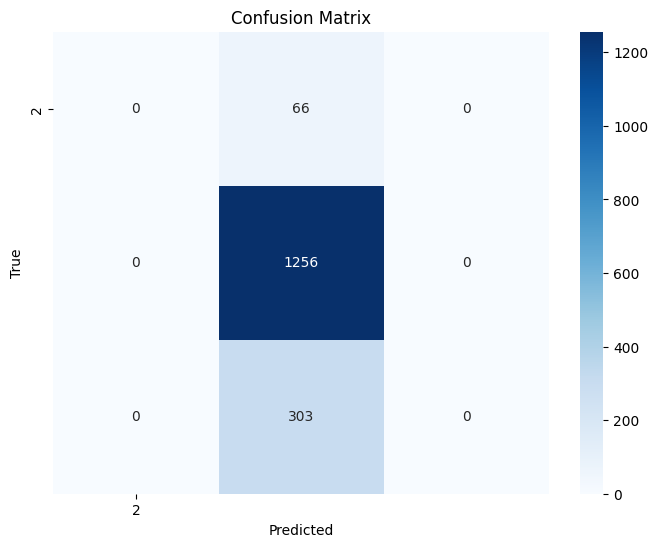

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.763136288998358
precision on train set:  0.5823769955861853
recall on train set:  0.763136288998358
f1 score on train set:  0.6606148364367626
balanced accuracy on train set:  0.3333333333333333
logistic loss on train set:  0.019486284664797838
mse on train set:  0.23686371100164202

Scorecard table:
               Feature                           Bin    Points
0     volatile_acidity              [0.2425, 0.2475[ -0.059788
1  free_sulfur_dioxide                  [22.5, 23.5[  0.061403
2            sulphates                [0.575, 0.585[  0.051020
3              alcohol  [10.583333334999999, 10.625[  0.089490
4              alcohol              [11.775, 11.825[  0.138892

SBC columns weights:
              Feature    Weight
2474  featsbcol1-bin1 -0.763259


In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_beyondl1_model, wine_infbins_diffcod_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_adaptivelasso_model, wine_infbins_diffcod_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1


TypeError: '<' not supported between instances of 'float' and 'str'

## car evaluation dataset
evaluate car acceptability

https://archive.ics.uci.edu/dataset/19/car+evaluation

#### load dataset

In [ ]:
# fetch dataset 
car_evaluation_data = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
car_evaluation_X = car_evaluation_data.data.features 
car_evaluation_y = car_evaluation_data.data.targets 
  
# metadata 
print(car_evaluation_data.metadata) 
  
# variable information 
print(car_evaluation_data.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [ ]:
car_evaluation_y = pd.Series(car_evaluation_y['class'], name='class')

In [ ]:
car_evaluation_y.value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Class')

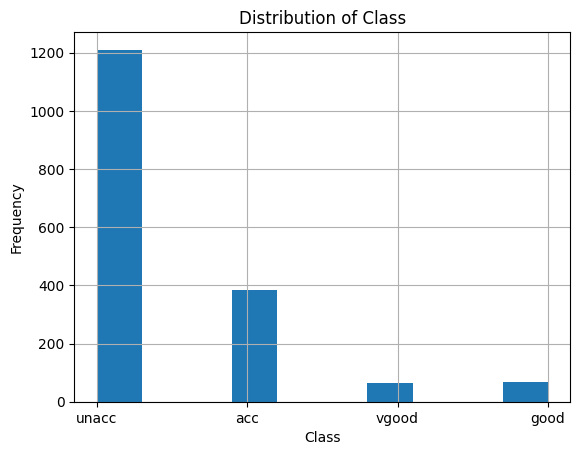

In [ ]:
car_evaluation_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
# get type of each column
print("types: ", car_evaluation_X.dtypes)

# show categorical columns
print("\nobject columns: ", car_evaluation_X.select_dtypes(include=['object']).columns)
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", car_evaluation_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", car_evaluation_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

types:  buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

object columns:  Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

number of unique values in each categorical column:  buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
dtype: int64

values of all categorical columns:  buying      [vhigh, high, med, low]
maint       [vhigh, high, med, low]
doors              [2, 3, 4, 5more]
persons                [2, 4, more]
lug_boot          [small, med, big]
safety             [low, med, high]
dtype: object


In [ ]:
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    car_evaluation_X.loc[:, col] = car_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {car_evaluation_X[col].unique()}")

categorical columns:  ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
Column buying encoded as: [3 0 2 1]
Column maint encoded as: [3 0 2 1]
Column doors encoded as: [0 1 2 3]
Column persons encoded as: [0 1 2]
Column lug_boot encoded as: [2 1 0]
Column safety encoded as: [1 2 0]


In [ ]:
mapping = {1: 'unacc', 2: 'acc', 3: 'good', 4: 'vgood'}
K=4

#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing 

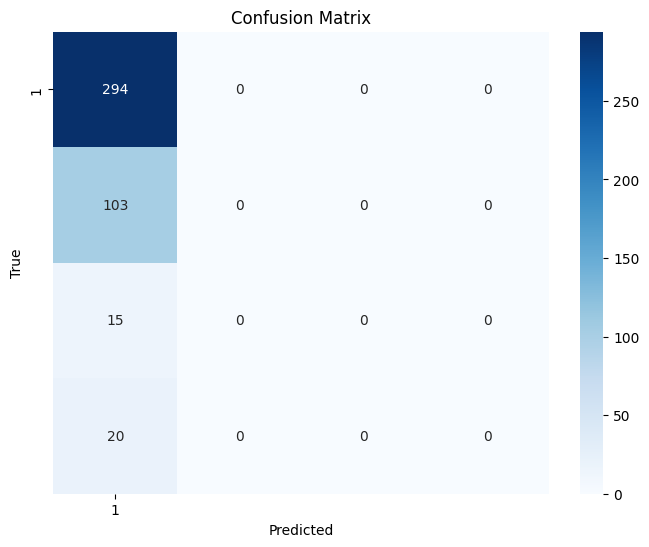

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
   Feature Bin    Points
0   buying   0 -1.418047
1    maint   0  0.203263
2    doors   0 -0.230898
3  persons   0  0.084380
4   safety   0  0.219568

SBC columns weights:
            Feature    Weight
21  featsbcol1-bin1 -1.611906
22  featsbcol2-bin1 -2.444284


In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.1782001782001782
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
 

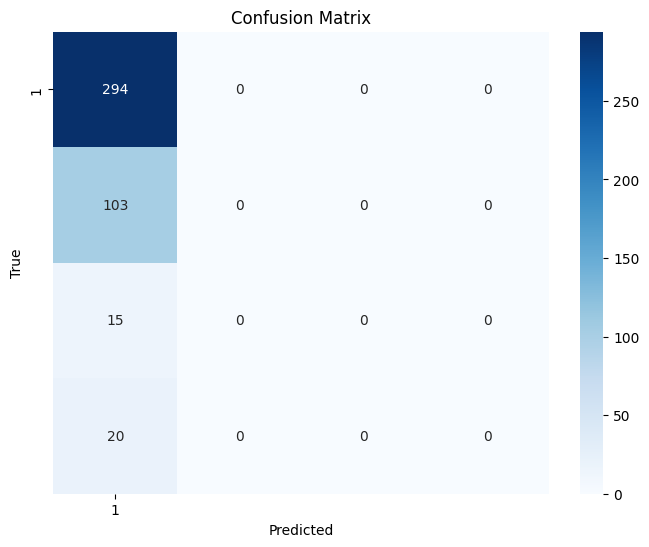

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []

SBC columns weights:
            Feature    Weight
21  featsbcol1-bin1 -0.000977
22  featsbcol2-bin1 -0.000977


In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_mm_model, car_caim_1ook_mm_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 3.277499198913574 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             1           1
1             2           1
2             1           1
3             2           1
4             1           1
..          ...         ...
427           1           1
428           2           1
429           1           1
430           3           1
431           1           1

[432 rows x 2 columns]
accuracy:  0.6805555555555556
precision:  0.4631558641975309
recall:  0.6805555555555556
f1 score:  0.5511937557392103
balanced accuracy:  0.25
logistic loss:  0.2842004719211655
mse:  0.7939814814814815
number of far off predictions:  0
number of features:  23
number of non-zero weights:  4
model size (non-zero weights / all weights):  0.17391304347826086


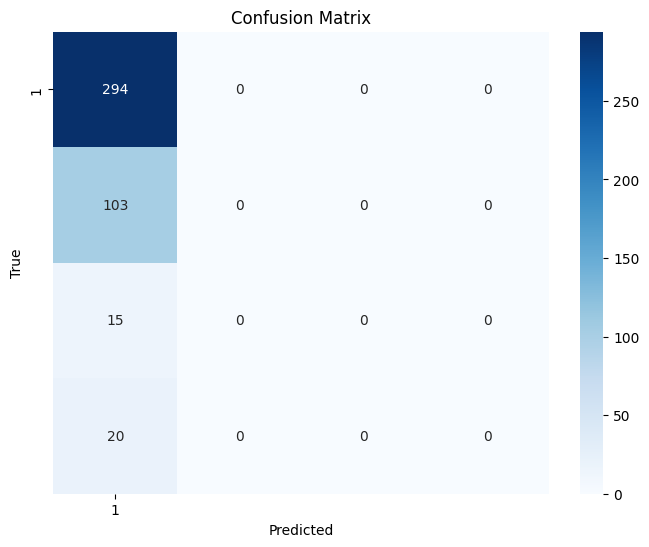

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
    Feature Bin    Points
0    buying   0  0.064590
1  lug_boot   0  0.220936

SBC columns weights:
            Feature    Weight
21  featsbcol1-bin1 -0.216821
22  featsbcol2-bin1 -0.258488


In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_beyondl1_model, car_caim_1ook_beyondl1_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.003593813663804626}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.04641588833612782}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.5994842503189421}
  fold  1
  fo

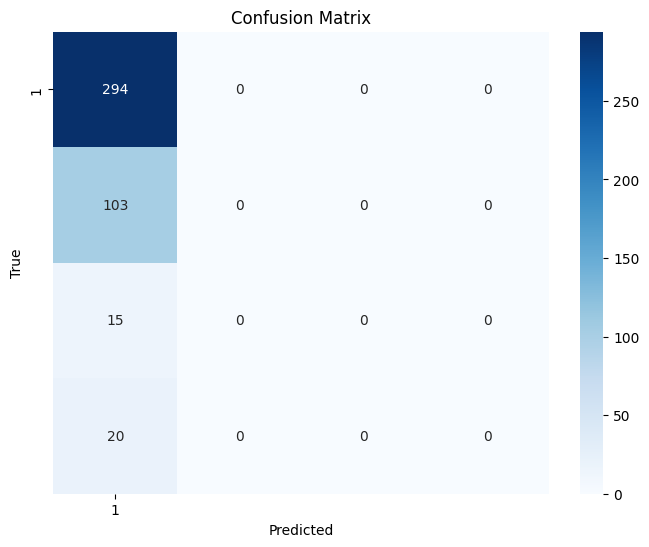

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
     Feature Bin        Points
0     buying   0  4.886831e-02
1     buying   1 -2.364677e-20
2     buying   2 -2.364677e-20
3     buying   3 -2.364677e-20
4      maint   0  4.886831e-02
5      maint   1 -2.364677e-20
6      maint   2 -2.364677e-20
7      maint   3 -2.364677e-20
8      doors   0  4.886831e-02
9      doors   1 -2.364677e-20
10     doors   2 -2.364677e-20
11     doors   3 -2.364677e-20
12   persons   0  4.886831e-02
13   persons   1 -2.364677e-20
14   persons   2 -2.364677e-20
15  lug_boot   0  4.886831e-02
16  lu

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_adaptivelasso_model, car_caim_1ook_adaptivelasso_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing 

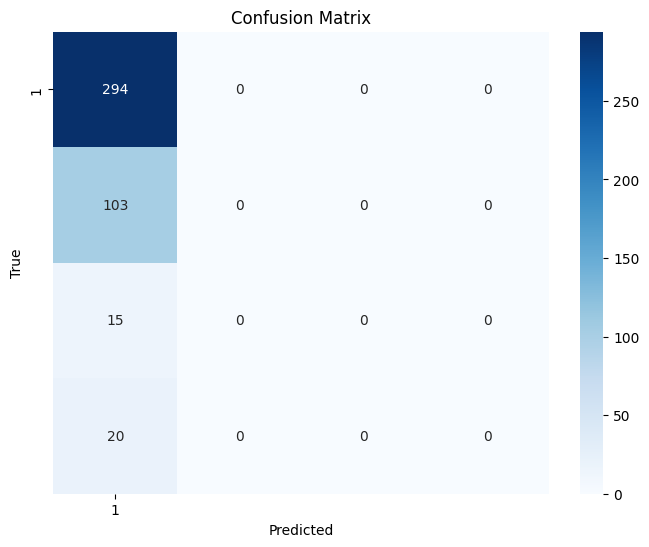

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:


IndexError: single positional indexer is out-of-bounds

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_diffcod_ml_model, car_caim_diffcod_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.1782001782001782
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
 

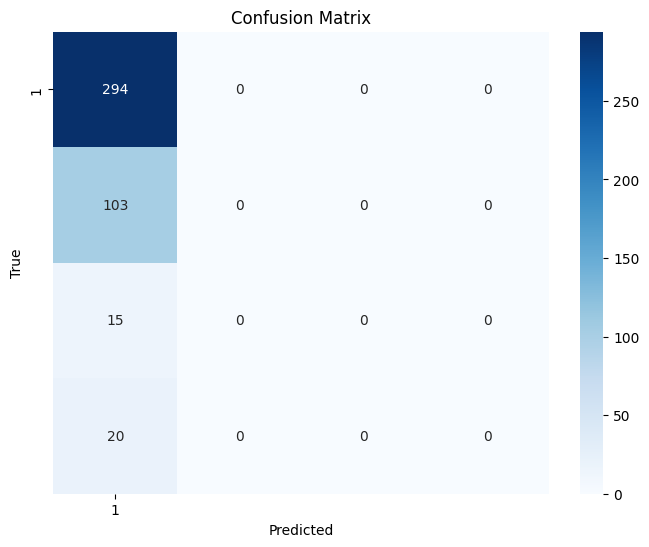

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:


IndexError: single positional indexer is out-of-bounds

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_diffcod_mm_model, car_caim_diffcod_mm_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.08572793006896973 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             1           1
1             2           1
2             1           1
3             2           1
4             1           1
..          ...         ...
427           1           1
428           2           1
429           1           1
430           3           1
431           1           1

[432 rows x 2 columns]
accuracy:  0.6805555555555556
precision:  0.4631558641975309
recall:  0.6805555555555556
f1 score:  0.5511937557392103
balanced accuracy:  0.25
logistic loss:  0.2842004719211655
mse:  0.7939814814814815
number of far off predictions:  0
number of features:  17
number of non-zero weights:  2
model size (non-zero weights / all weights):  0.11764705882352941


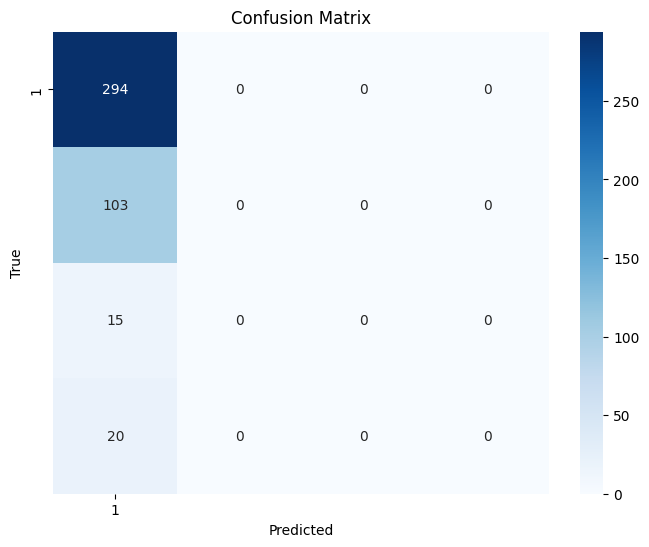

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:


IndexError: single positional indexer is out-of-bounds

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_diffcod_beyondl1_model, car_caim_diffcod_beyondl1_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.003593813663804626}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.04641588833612782}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.5994842503189421}
  fold  1
  fo

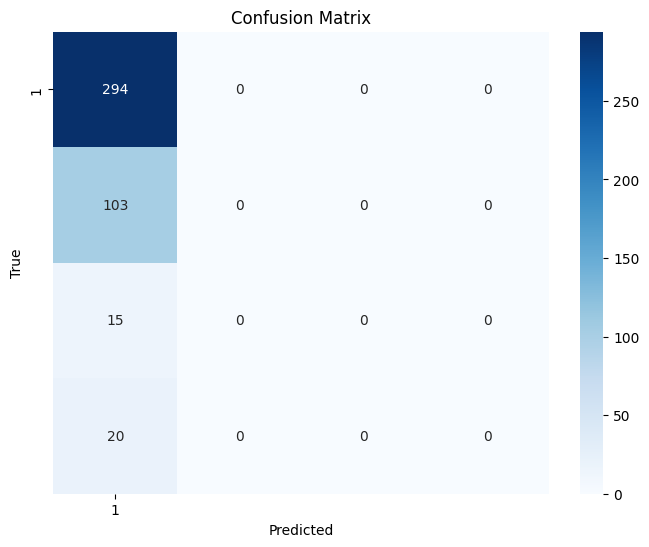

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:


IndexError: single positional indexer is out-of-bounds

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing 

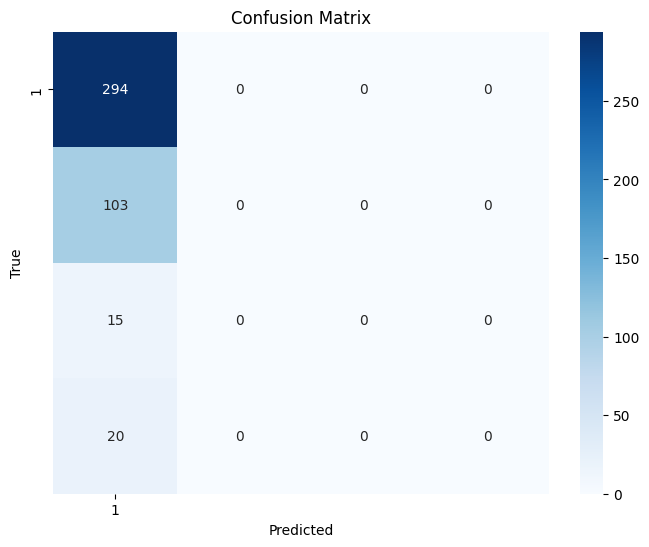

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876
Execution time: 14.725142002105713 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.1782001782001782
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
 

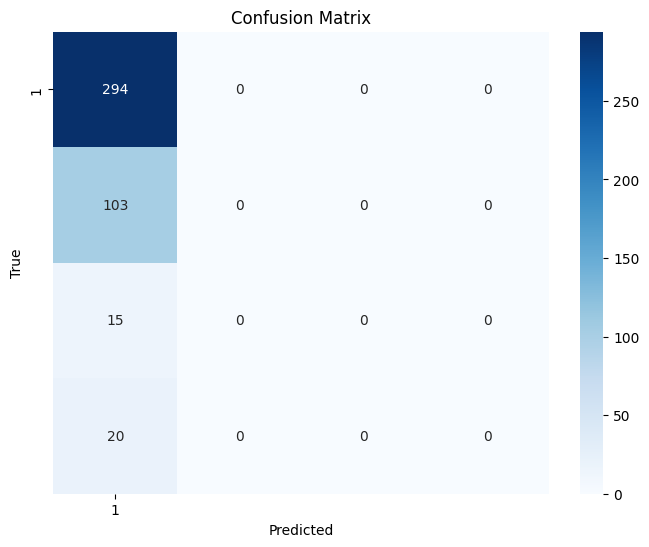

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []

SBC columns weights:
            Feature    Weight
21  featsbcol1-bin1 -0.000977
22  featsbcol2-bin1 -0.000977


In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_mm_model, car_infbins_1ook_mm_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.0888667106628418 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             1           1
1             2           1
2             1           1
3             2           1
4             1           1
..          ...         ...
427           1           1
428           2           1
429           1           1
430           3           1
431           1           1

[432 rows x 2 columns]
accuracy:  0.6805555555555556
precision:  0.4631558641975309
recall:  0.6805555555555556
f1 score:  0.5511937557392103
balanced accuracy:  0.25
logistic loss:  0.2842004719211655
mse:  0.7939814814814815
number of far off predictions:  0
number of features:  23
number of non-zero weights:  4
model size (non-zero weights / all weights):  0.17391304347826086


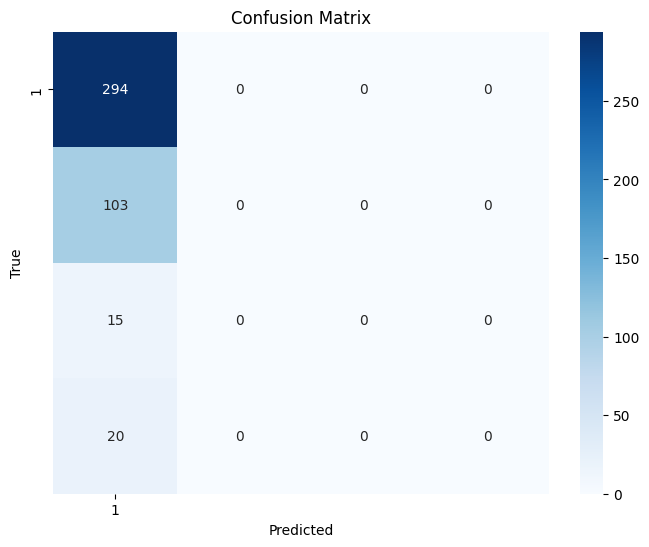

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
    Feature Bin    Points
0    buying   0  0.064590
1  lug_boot   0  0.220936

SBC columns weights:
            Feature    Weight
21  featsbcol1-bin1 -0.216821
22  featsbcol2-bin1 -0.258488


In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_beyondl1_model, car_infbins_1ook_beyondl1_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.003593813663804626}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.04641588833612782}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.5994842503189421}
  fold  1
  fo

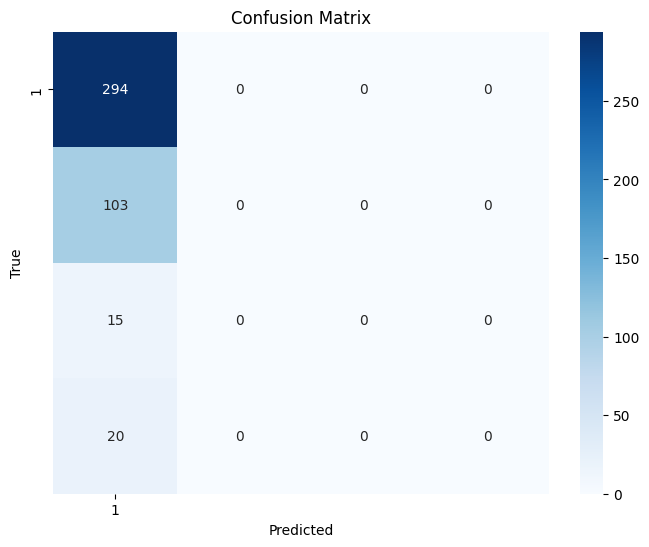

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
     Feature Bin        Points
0     buying   0  4.886831e-02
1     buying   1 -2.364677e-20
2     buying   2 -2.364677e-20
3     buying   3 -2.364677e-20
4      maint   0  4.886831e-02
5      maint   1 -2.364677e-20
6      maint   2 -2.364677e-20
7      maint   3 -2.364677e-20
8      doors   0  4.886831e-02
9      doors   1 -2.364677e-20
10     doors   2 -2.364677e-20
11     doors   3 -2.364677e-20
12   persons   0  4.886831e-02
13   persons   1 -2.364677e-20
14   persons   2 -2.364677e-20
15  lug_boot   0  4.886831e-02
16  lu

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_adaptivelasso_model, car_infbins_1ook_adaptivelasso_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## abalone

#### load dataset

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Rings')

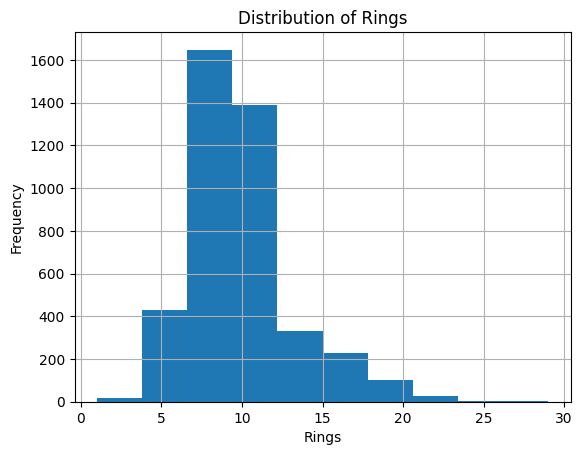

In [ ]:
# fetch dataset 
abalone_data = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
abalone_X = abalone_data.data.features 
abalone_y = abalone_data.data.targets 
  
# metadata 
# print(abalone_data.metadata) 
  
# variable information 
# print(abalone_data.variables) 

abalone_y  = pd.Series(abalone_y ['Rings'], name='Rings')
print(abalone_y .value_counts())
abalone_y.hist()
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.title('Distribution of Rings')

In [ ]:
print("number of observations: ", len(abalone_X))

print("number of features: ", len(abalone_X.columns))

number of observations:  4177
number of features:  8


In [ ]:
abalone_y = abalone_y.map(lambda x: 1 if x <= 5 else
                          (2 if x <= 10 else
                           (3 if x <= 15 else
                            (4 if x <= 20 else 5))))

print(abalone_y.value_counts())

K=5

Rings
2    2541
3    1186
4     225
1     189
5      36
Name: count, dtype: int64


In [ ]:
categorical_columns = abalone_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    abalone_X.loc[:, col] = abalone_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {abalone_X[col].unique()}")

categorical columns:  ['Sex']
Column Sex encoded as: [2 0 1]


#### CAIM & 1ook

Execution time: 3.9594287872314453 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 ... 0 0 0]
      True Value  Prediction
0              2           3
1              2           2
2              4           3
3              2           3
4              3           3
...          ...         ...
1040           3           2
1041           2           2
1042           2           3
1043           2           3
1044           2           2

[1045 rows x 2 columns]
accuracy:  0.6775119617224881
precision:  0.6361450133414186
recall:  0.6775119617224881
f1 score:  0.6548232729479305
balanced accuracy:  0.3855300683047131
logistic loss:  0.023961898281870696
mse:  0.3990430622009569
number of far off predictions:  25
number of features:  48
number of non-zero weights:  46
model size (non-zero weights / all weights):  0.9583333333333334


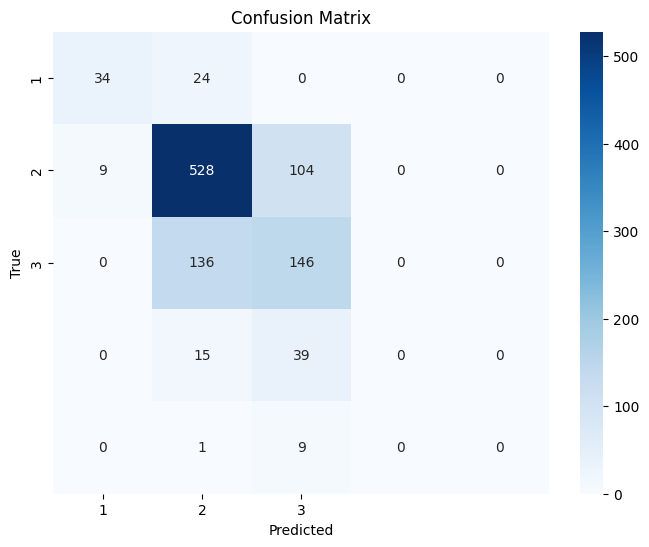

accuracy for class 1: 0.586
accuracy for class 2: 0.824
accuracy for class 3: 0.518
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6845466155810983
precision on train set:  0.6725931451846819
recall on train set:  0.6845466155810983
f1 score on train set:  0.658411167284777
balanced accuracy on train set:  0.39133931283883105
logistic loss on train set:  0.0205627507070307
mse on train set:  0.3949553001277139

Scorecard table:
         Feature    Weight
0  featSex-bin-1  0.194481
1   featSex-bin1  0.000000
2   featSex-bin2  0.000000
           Feature    Weight
3  featLength-bin1  1.252664
4  featLength-bin2 -0.596466
5  featLength-bin3  1.157538
6  featLength-bin4  0.583322
7  featLength-bin5  0.362770
8  featLength-bin6  1.086425
              Feature    Weight
9   featDiameter-bin1 -0.787385
10  featDiameter-bin2  0.196777
11  featDiameter-bin3  0.711343
12  featDiameter-bin4  0.982643
13  featDiameter-bin

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_ml_model, abalone_caim_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.2886237522356574
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  mean score: 0.2886237522356574
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.30841881060478676
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  mean score: 0.30841881060478676
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  

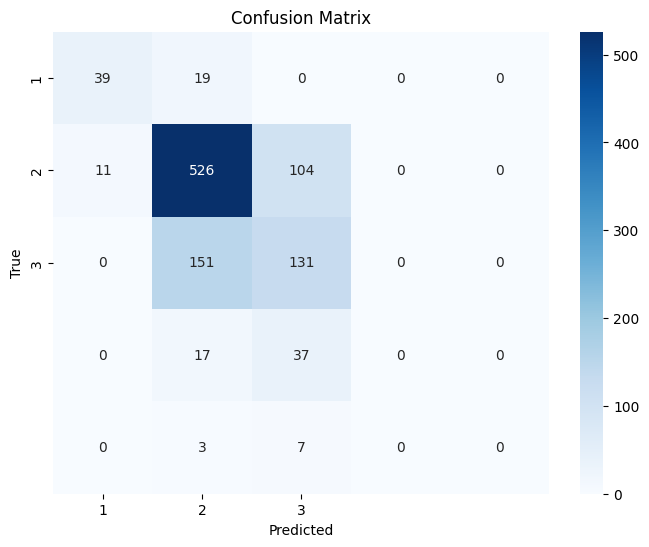

accuracy for class 1: 0.672
accuracy for class 2: 0.821
accuracy for class 3: 0.465
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.677522349936143
precision on train set:  0.6276325787224829
recall on train set:  0.677522349936143
f1 score on train set:  0.6501101946942855
balanced accuracy on train set:  0.39023142535119126
logistic loss on train set:  0.021190637196851773
mse on train set:  0.41794380587484037

Scorecard table:
         Feature        Weight
0  featSex-bin-1 -3.511774e-14
1   featSex-bin1  0.000000e+00
2   featSex-bin2  0.000000e+00
           Feature    Weight
3  featLength-bin1 -0.200815
4  featLength-bin2 -0.021492
5  featLength-bin3  0.053661
6  featLength-bin4  0.053716
7  featLength-bin5  0.053589
8  featLength-bin6  0.061341
              Feature    Weight
9   featDiameter-bin1 -0.263315
10  featDiameter-bin2 -0.006342
11  featDiameter-bin3  0.069398
12  featDiameter-bin4  0.069447
13

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_mm_model, abalone_caim_1ook_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                    K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 8.332942008972168 seconds

Evaluating the model on the test set...
test predictions:  [1.07528336 0.46864223 0.17991829 ... 0.362869   0.07414505 0.01961728]
      True Value  Prediction
0              2           2
1              2           2
2              4           2
3              2           2
4              3           2
...          ...         ...
1040           3           2
1041           2           2
1042           2           2
1043           2           2
1044           2           2

[1045 rows x 2 columns]
accuracy:  0.6133971291866028
precision:  0.376256038094366
recall:  0.6133971291866028
f1 score:  0.46641466169467666
balanced accuracy:  0.2
logistic loss:  0.018863768017011458
mse:  0.6181818181818182
number of far off predictions:  64
number of features:  48
number of non-zero weights:  7
model size (non-zero weights / all weights):  0.14583333333333334
test predictions:  [1.07528336 0.46864223 0.17991829 ... 0.362869   0.07414505 0.01961728]
 

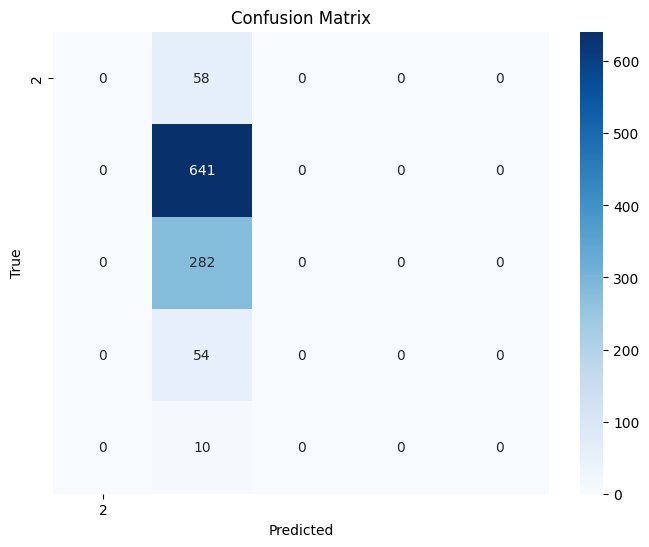

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6066411238825032
precision on train set:  0.3680134531854266
recall on train set:  0.6066411238825032
f1 score on train set:  0.4581153161274865
balanced accuracy on train set:  0.2
logistic loss on train set:  0.0170526777509965
mse on train set:  0.6235632183908046

Scorecard table:
         Feature    Weight
0  featSex-bin-1  0.485708
1   featSex-bin1  0.000000
2   featSex-bin2  0.000000
           Feature  Weight
3  featLength-bin1     0.0
4  featLength-bin2     0.0
5  featLength-bin3     0.0
6  featLength-bin4     0.0
7  featLength-bin5     0.0
8  featLength-bin6     0.0
              Feature  Weight
9   featDiameter-bin1     0.0
10  featDiameter-bin2     0.0
11  featDiameter-bin3     0.0
12  featDiameter-bin4     0.0
13  featDiameter-bin5     0.0
14  featDiameter-bin6     0.0

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_beyondl1_model, abalone_caim_1ook_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                    K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6171774920892122
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  mean score: 0.6171774920892122
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6171774920892122
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  mean score: 0.6171774920892122
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6171774920892122
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  mean score: 0.6171774920892122
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
AdaptiveLasso infeasible: minimize 4.99001996007984e-05 @ quad_over_lin([[1.00 0.00 ... 0.00 0.00]
 [1.00 0.00 ... 0.00 0.00]
 ...


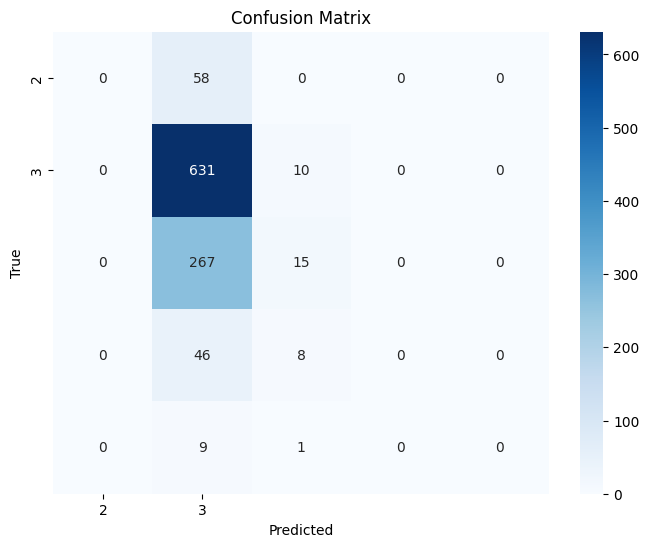

accuracy for class 1: 0.000
accuracy for class 2: 0.984
accuracy for class 3: 0.053
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6149425287356322
precision on train set:  0.5108652185671654
recall on train set:  0.6149425287356322
f1 score on train set:  0.49024826253172105
balanced accuracy on train set:  0.2084196553330228
logistic loss on train set:  0.01689793767563327
mse on train set:  0.5791826309067688

Scorecard table:
         Feature    Weight
0  featSex-bin-1  0.479704
1   featSex-bin1  0.000000
2   featSex-bin2  0.000000
           Feature    Weight
3  featLength-bin1  0.108115
4  featLength-bin2  0.042569
5  featLength-bin3  0.098600
6  featLength-bin4  0.069271
7  featLength-bin5  0.052122
8  featLength-bin6  0.093707
              Feature    Weight
9   featDiameter-bin1  0.022742
10  featDiameter-bin2  0.062812
11  featDiameter-bin3  0.087913
12  featDiameter-bin4  0.106199
13  featDiameter-b

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_adaptivelasso_model, abalone_caim_1ook_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                    K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6503829279850804
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  mean score: 0.6503829279850804
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6803929661504909
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  mean score: 0.6803929661504909
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6503829279850804
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  mean score: 0.6503829279850804
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean

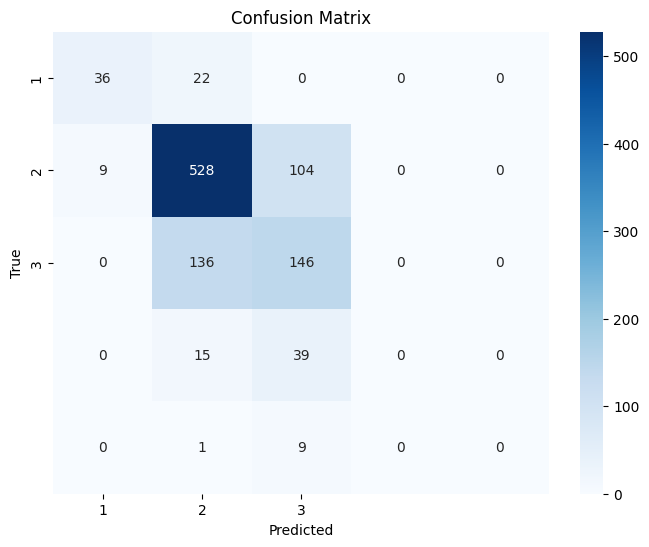

accuracy for class 1: 0.621
accuracy for class 2: 0.824
accuracy for class 3: 0.518
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6839080459770115
precision on train set:  0.6357061093236883
recall on train set:  0.6839080459770115
f1 score on train set:  0.6570405982690622
balanced accuracy on train set:  0.3904215859516385
logistic loss on train set:  0.020656979258409064
mse on train set:  0.3955938697318008

Scorecard table:
        Feature  Weight
0  featSex-bin1     0.0
1  featSex-bin2     0.0
           Feature    Weight
2  featLength-bin1 -0.201750
3  featLength-bin2 -0.081126
4  featLength-bin3  1.722504
5  featLength-bin4 -0.499133
6  featLength-bin5 -0.210000
7  featLength-bin6  0.000000
              Feature    Weight
8   featDiameter-bin1 -0.069230
9   featDiameter-bin2  0.569057
10  featDiameter-bin3  0.529723
11  featDiameter-bin4  0.240065
12  featDiameter-bin5 -0.200812
13  featDiameter-bin6 

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_ml_model, abalone_caim_diffcod_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.31384604409659056
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  mean score: 0.31384604409659056
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.3106531941238516
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  mean score: 0.3106531941238516
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  

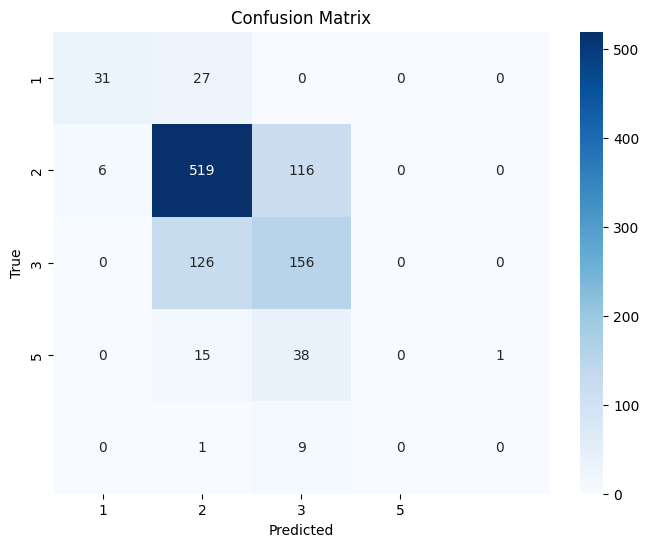

accuracy for class 1: 0.534
accuracy for class 2: 0.810
accuracy for class 3: 0.553
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6871008939974457
precision on train set:  0.6450560541219323
recall on train set:  0.6871008939974457
f1 score on train set:  0.6635670627933878
balanced accuracy on train set:  0.38970183142108467
logistic loss on train set:  0.01993064467631096
mse on train set:  0.3975095785440613

Scorecard table:
        Feature  Weight
0  featSex-bin1     0.0
1  featSex-bin2     0.0
           Feature        Weight
2  featLength-bin1  7.935341e-11
3  featLength-bin2 -1.997755e+00
4  featLength-bin3  1.998185e+00
5  featLength-bin4 -1.607194e-04
6  featLength-bin5 -1.224027e-04
7  featLength-bin6  0.000000e+00
              Feature        Weight
8   featDiameter-bin1  7.935341e-11
9   featDiameter-bin2  1.997848e+00
10  featDiameter-bin3  9.768958e-04
11  featDiameter-bin4  1.125263e-04
12  fe

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_mm_model, abalone_caim_diffcod_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 3.9433388710021973 seconds

Evaluating the model on the test set...
test predictions:  [ 1.07664895  0.47000625  0.18132461 ...  0.33735728  0.04867563
 -0.00587764]
      True Value  Prediction
0              2           2
1              2           2
2              4           2
3              2           2
4              3           2
...          ...         ...
1040           3           2
1041           2           2
1042           2           2
1043           2           2
1044           2           2

[1045 rows x 2 columns]
accuracy:  0.6133971291866028
precision:  0.376256038094366
recall:  0.6133971291866028
f1 score:  0.46641466169467666
balanced accuracy:  0.2
logistic loss:  0.018863768017011458
mse:  0.6181818181818182
number of far off predictions:  64
number of features:  47
number of non-zero weights:  7
model size (non-zero weights / all weights):  0.14893617021276595
test predictions:  [ 1.07664895  0.47000625  0.18132461 ...  0.33735728  0.04867563


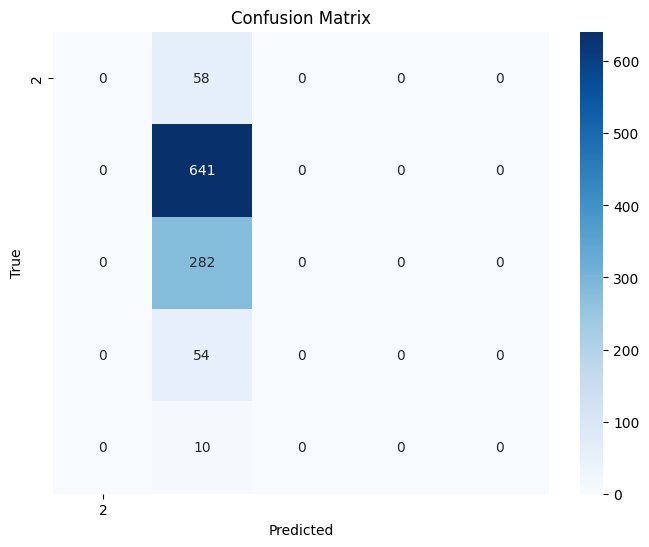

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6066411238825032
precision on train set:  0.3680134531854266
recall on train set:  0.6066411238825032
f1 score on train set:  0.4581153161274865
balanced accuracy on train set:  0.2
logistic loss on train set:  0.0170526777509965
mse on train set:  0.6235632183908046

Scorecard table:
        Feature  Weight
0  featSex-bin1     0.0
1  featSex-bin2     0.0
           Feature    Weight
2  featLength-bin1  0.000000
3  featLength-bin2  0.221989
4  featLength-bin3  0.000000
5  featLength-bin4  0.000000
6  featLength-bin5  0.000000
7  featLength-bin6  0.000000
              Feature  Weight
8   featDiameter-bin1     0.0
9   featDiameter-bin2     0.0
10  featDiameter-bin3     0.0
11  featDiameter-bin4     0.0
12  featDiameter-bin5     0.0
13  featDiameter-bin6     0.0
            Feature  

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_beyondl1_model, abalone_caim_diffcod_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.617816469724995
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  mean score: 0.617816469724995
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.617816469724995
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  mean score: 0.617816469724995
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.617816469724995
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  mean score: 0.617816469724995
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
AdaptiveLasso infeasible: minimize 4.988028731045491e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.0

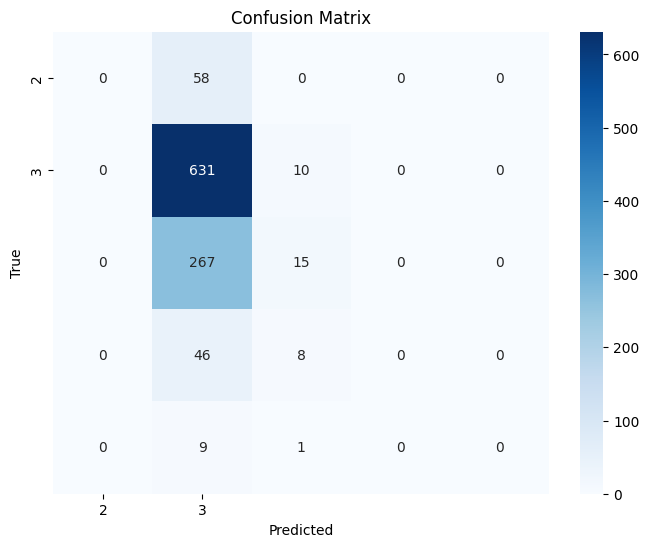

accuracy for class 1: 0.000
accuracy for class 2: 0.984
accuracy for class 3: 0.053
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6149425287356322
precision on train set:  0.5108652185671654
recall on train set:  0.6149425287356322
f1 score on train set:  0.49024826253172105
balanced accuracy on train set:  0.2084196553330228
logistic loss on train set:  0.01689793767563327
mse on train set:  0.5791826309067688

Scorecard table:
        Feature  Weight
0  featSex-bin1     0.0
1  featSex-bin2     0.0
           Feature    Weight
2  featLength-bin1  0.090147
3  featLength-bin2 -0.065546
4  featLength-bin3  0.056031
5  featLength-bin4 -0.029328
6  featLength-bin5 -0.017149
7  featLength-bin6  0.023194
              Feature    Weight
8   featDiameter-bin1  0.090147
9   featDiameter-bin2  0.040070
10  featDiameter-bin3  0.025102
11  featDiameter-bin4  0.018286
12  featDiameter-bin5 -0.017297
13  featDiameter-bin6 

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_adaptivelasso_model, abalone_caim_diffcod_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.5555609907720216
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  mean score: 0.5555609907720216
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.5488532542509337
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  mean score: 0.5488532542509337
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.5750406367356089
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  mean score: 0.5750406367356089
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean

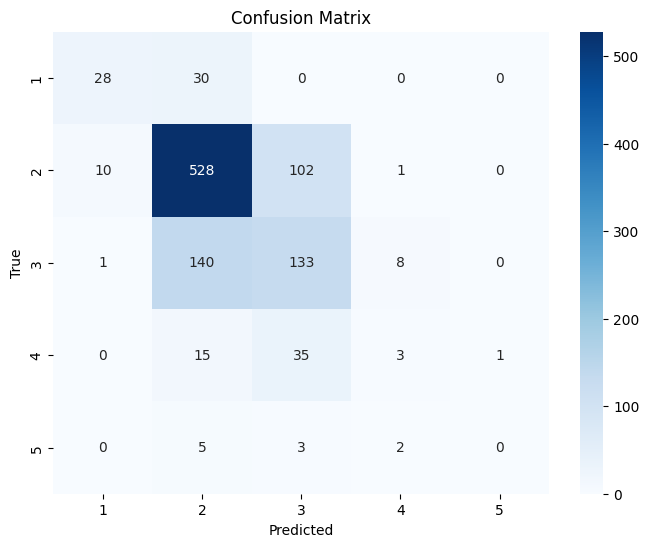

accuracy for class 1: 0.483
accuracy for class 2: 0.824
accuracy for class 3: 0.472
accuracy for class 4: 0.056
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7723499361430396
precision on train set:  0.7548114642969731
recall on train set:  0.7723499361430396
f1 score on train set:  0.7569125616172172
balanced accuracy on train set:  0.4761884101254961
logistic loss on train set:  0.021139165305094725
mse on train set:  0.22956577266922096

Scorecard table:
         Feature    Weight
0  featSex-bin-1  1.802444
1   featSex-bin1  0.000000
2   featSex-bin2  0.000000
               Feature    Weight
3      featLength-bin1  0.000000
4     featLength-bin10  0.000000
5    featLength-bin100  0.375385
6    featLength-bin101  0.193685
7    featLength-bin102  0.023057
..                 ...       ...
129   featLength-bin95  0.000000
130   featLength-bin96  0.090146
131   featLength-bin97 -0.391851
132   featLength-bin98  0.000000
133   featLength-

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_ml_model, abalone_infbins_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
 
scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_mm_model, abalone_infbins_1ook_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.2886237522356574
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  mean score: 0.2886237522356574
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.2886237522356574
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  mean score: 0.2886237522356574
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3


In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_beyondl1_model, abalone_infbins_1ook_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                    params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_adaptivelasso_model, abalone_infbins_1ook_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_ml_model, abalone_infbins_diffcod_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_mm_model, abalone_infbins_diffcod_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_beyondl1_model, abalone_infbins_diffcod_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_adaptivelasso_model, abalone_infbins_diffcod_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## balance scale
classify each example as having the balance scale tip to the right, tip to the left, or be balanced (from 1 to 5)

https://archive.ics.uci.edu/dataset/12/balance+scale

#### load dataset

In [ ]:
# fetch dataset 
balance_scale_data = fetch_ucirepo(id=12) 
  
# data (as pandas dataframes) 
balance_scale_X = balance_scale_data.data.features 
balance_scale_y = balance_scale_data.data.targets 
  
# metadata 
print(balance_scale_data.metadata) 
  
# variable information 
print(balance_scale_data.variables) 

balance_scale_y  = pd.Series(balance_scale_y['class'], name='class')
print(balance_scale_y.value_counts())
balance_scale_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = balance_scale_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    balance_scale_X.loc[:, col] = balance_scale_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {balance_scale_X[col].unique()}")
    
mapping = {1: 'L', 2: 'B', 3: 'R'}
K=3

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_ml_model, balance_caim_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_mm_model, balance_caim_1ook_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                    K=K,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_beyondl1_model, balance_caim_1ook_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_adaptivelasso_model, balance_caim_1ook_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                    K=K,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_ml_model, balance_caim_diffcod_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_mm_model, balance_caim_diffcod_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_beyondl1_model, balance_caim_diffcod_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_adaptivelasso_model, balance_caim_diffcod_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_ml_model, balance_infbins_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='ML',
                    params=None,
                    use_sbc=True,
                    K=K,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_mm_model, balance_infbins_1ook_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='MM',
                    params=None,
                    use_sbc=True,
                    K=K,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_beyondl1_model, balance_infbins_1ook_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='BEYOND_L1',
                    params=None,
                    use_sbc=True,
                    K=K,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_adaptivelasso_model, balance_infbins_1ook_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='ADAPTIVE_LASSO',
                    params=None,
                    use_sbc=True,
                    K=K,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_ml_model, balance_infbins_diffcod_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_mm_model, balance_infbins_diffcod_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_beyondl1_model, balance_infbins_diffcod_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_adaptivelasso_model, balance_infbins_diffcod_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## lenses

classes:
- 1 : the patient should be fitted with hard contact lenses,
- 2 : the patient should be fitted with soft contact lenses,
- 3 : the patient should not be fitted with contact lenses.


https://archive.ics.uci.edu/dataset/58/lenses

#### load dataset

In [ ]:
# fetch dataset 
lenses_data = fetch_ucirepo(id=58) 
  
# data (as pandas dataframes) 
lenses_X = lenses_data.data.features 
lenses_y = lenses_data.data.targets
  
# metadata 
print(lenses_data.metadata) 
  
# variable information 
print(lenses_data.variables) 

lenses_y  = pd.Series(lenses_y['class'], name='class')
print(lenses_y.value_counts())
lenses_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = lenses_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    lenses_X.loc[:, col] = lenses_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {lenses_X[col].unique()}")
    
K=3

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_ml_model, lenses_caim_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_mm_model, lenses_caim_1ook_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_beyondl1_model, lenses_caim_1ook_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K)
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_adaptivelasso_model, lenses_caim_1ook_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_ml_model, lenses_caim_diffcod_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_mm_model, lenses_caim_diffcod_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING',
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_beyondl1_model, lenses_caim_diffcod_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_adaptivelasso_model, lenses_caim_diffcod_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_ml_model, lenses_infbins_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_mm_model, lenses_infbins_1ook_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_beyondl1_model, lenses_infbins_1ook_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_adaptivelasso_model, lenses_infbins_1ook_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_ml_model, lenses_infbins_diffcod_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_mm_model, lenses_infbins_diffcod_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_beyondl1_model, lenses_infbins_diffcod_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_adaptivelasso_model, lenses_infbins_diffcod_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## student performance
predict student performance in secondary education (high school)

https://archive.ics.uci.edu/dataset/320/student+performance

#### load dataset

In [ ]:
# fetch dataset 
student_performance_data = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
student_performance_X = student_performance_data.data.features 
student_performance_y = student_performance_data.data.targets 
# delete targets 'G1' and 'G2'
student_performance_y = student_performance_y.drop(columns=['G1', 'G2'])

# make classes
student_performance_y = student_performance_y['G3'].apply(
    lambda x: 'low' if x < 10 else ('medium' if x < 14 else ('good' if x < 18 else 'very good'))
)

# metadata 
# print(student_performance_data.metadata) 
  
# variable information 
# print(student_performance_data.variables) 

student_performance_y = pd.Series(student_performance_y)
print(student_performance_y.value_counts())
student_performance_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')


# num of observations
num_observations = len(student_performance_X)
print(f'Number of observations: {num_observations}')

# num of features
num_features = len(student_performance_X.columns)
print(f'Number of features: {num_features}')

# number of target classes
num_classes = len(student_performance_y.unique())
print(f'Number of target classes: {num_classes}')

In [ ]:
categorical_columns = student_performance_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    student_performance_X.loc[:, col] = student_performance_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {student_performance_X[col].unique()}")

mapping = {'low': 1, 'medium': 2, 'good': 3, 'very good': 4}
K=4

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_ml_model, student_caim_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_mm_model, student_caim_1ook_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_beyondl1_model, student_caim_1ook_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_adaptivelasso_model, student_caim_1ook_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_ml_model, student_caim_diffcod_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_mm_model, student_caim_diffcod_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_beyondl1_model, student_caim_diffcod_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_adaptivelasso_model, student_caim_diffcod_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_ml_model, student_infbins_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_mm_model, student_infbins_1ook_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_beyondl1_model, student_infbins_1ook_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_adaptivelasso_model, student_infbins_1ook_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_ml_model, student_infbins_diffcod_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_mm_model, student_infbins_diffcod_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_beyondl1_model, student_infbins_diffcod_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_adaptivelasso_model, student_infbins_diffcod_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")